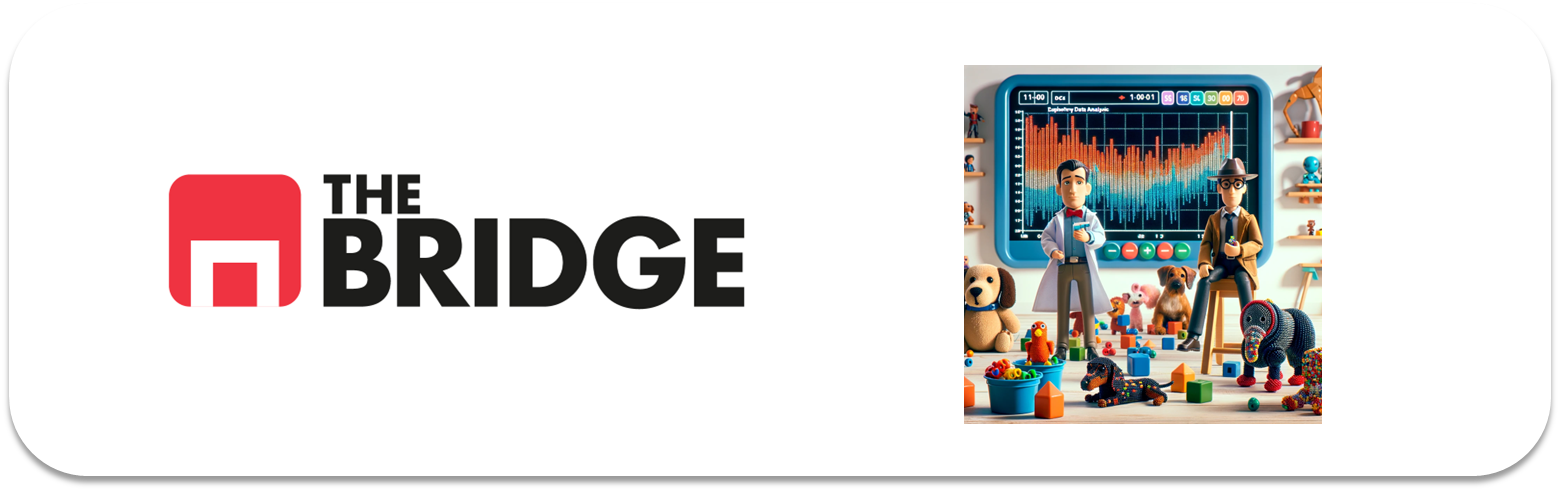

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [5]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [6]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [1]:
df_titanic["family_member"] = df_titanic["parch"] + df_titanic["sibsp"]

NameError: name 'df_titanic' is not defined

In [ ]:
df_titanic = df_titanic.drop(columns=["parch","sibsp"])

In [8]:
df_titanic

sex   age  sibsp  parch     fare   class    who  adult_male  \
0      male  22.0      1      0   7.2500   Third    man        True   
1    female  38.0      1      0  71.2833   First  woman       False   
2    female  26.0      0      0   7.9250   Third  woman       False   
3    female  35.0      1      0  53.1000   First  woman       False   
4      male  35.0      0      0   8.0500   Third    man        True   
..      ...   ...    ...    ...      ...     ...    ...         ...   
886    male  27.0      0      0  13.0000  Second    man        True   
887  female  19.0      0      0  30.0000   First  woman       False   
888  female   NaN      1      2  23.4500   Third  woman       False   
889    male  26.0      0      0  30.0000   First    man        True   
890    male  32.0      0      0   7.7500   Third    man        True   

     embark_town alive  alone  family_member  
0    Southampton    no  False              1  
1      Cherbourg   yes  False              1  
2    Southampton   yes   True              0  
3    Southampton   yes  False              1  
4    Southampton    no   True              0  
..           ...   ...    ...            ...  
886  Southampton    no   True              0  
887  Southampton   yes   True              0  
888  Southampton    no  False              3  
889    Cherbourg   yes   True              0  
890   Queenstown    no   True              0  

[891 rows x 12 columns]

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [9]:
df_titanic.loc[df_titanic["embark_town"].isna(), "embark_town"] = df_titanic["embark_town"].mode()[0]

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [10]:
df_titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [11]:
media_hombres = df_titanic.loc[df_titanic.who == "man"]["age"].mean()
media_mujeres = df_titanic.loc[df_titanic.who == "woman"]["age"].mean()
media_child = df_titanic.loc[df_titanic.who == "child"]["age"].mean()

df_titanic.loc[(df_titanic.age.isna()) & (df_titanic.who =="man") ,"age"] = media_hombres
df_titanic.loc[(df_titanic.age.isna()) & (df_titanic.who =="woman") ,"age"] = media_mujeres
df_titanic.loc[(df_titanic.age.isna()) & (df_titanic.who =="child") ,"age"] = media_child

In [12]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            891 non-null    object 
 1   age            891 non-null    float64
 2   sibsp          891 non-null    int64  
 3   parch          891 non-null    int64  
 4   fare           891 non-null    float64
 5   class          891 non-null    object 
 6   who            891 non-null    object 
 7   adult_male     891 non-null    bool   
 8   embark_town    891 non-null    object 
 9   alive          891 non-null    object 
 10  alone          891 non-null    bool   
 11  family_member  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


RESUMEN PASOS ANALISIS BIVARIANTE
Establece una lista de combinaciones que quieras analizar sí o sí: Básate en las preguntas e hipótesis de partida que tengas, en la prioridad de las variables y en los resultados y notas de tu análisis univariante.
Aplica a cada combinación lo que has visto en el workout. Ahora ya empezarán a salir mensajes y conclusiones que sí pueden aparecer en el informe y presentación finales. Puede que surjan otras hipótesis y tengas que volver atrás.
Si tienes muestras y quieres extrapolar resultados, acuerdate de aplicar el contraste de hipótesis.
Haz una lista de preguntas que puedas responder ya y busca esa respuesta (ya no va de analizar sistemáticamente sino de filtrar, operar, agrupar los dataframes hasta que encuentres ese respuesta). Por ejemplo: No hace falta esperar para ver con más detalle qué ocurre con las ofertas de tipo 2 las que tenían más exito que el resto de ofertas.
Lánzate a analizar varias variables a la vez (más de 2) siempre guiado por las preguntas e hipótesis.

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [13]:
df_tipificacion = pd.DataFrame([df_titanic.nunique(), df_titanic.nunique()/len(df_titanic)*100, df_titanic.dtypes]).T.rename(columns={0:"Card",1:"%_card",2:"tipo"})
df_tipificacion

Card     %_card     tipo
sex              2   0.224467   object
age             89   9.988777  float64
sibsp            7   0.785634    int64
parch            7   0.785634    int64
fare           248  27.833895  float64
class            3     0.3367   object
who              3     0.3367   object
adult_male       2   0.224467     bool
embark_town      3     0.3367   object
alive            2   0.224467   object
alone            2   0.224467     bool
family_member    9   1.010101    int64

In [14]:
df_tipificacion["Clasificada_como"] = "Categorica"
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion.Card > 10, "Clasificada_como"] = "Numerica Discreta"
df_tipificacion.loc[df_tipificacion.Card > 10, "Clasificada_como"] = "Numerica Continua"

In [15]:
categoricas_titanic = df_tipificacion.loc[(df_tipificacion["Clasificada_como"] == "Categorica") | (df_tipificacion["Clasificada_como"] == "Binaria")].index

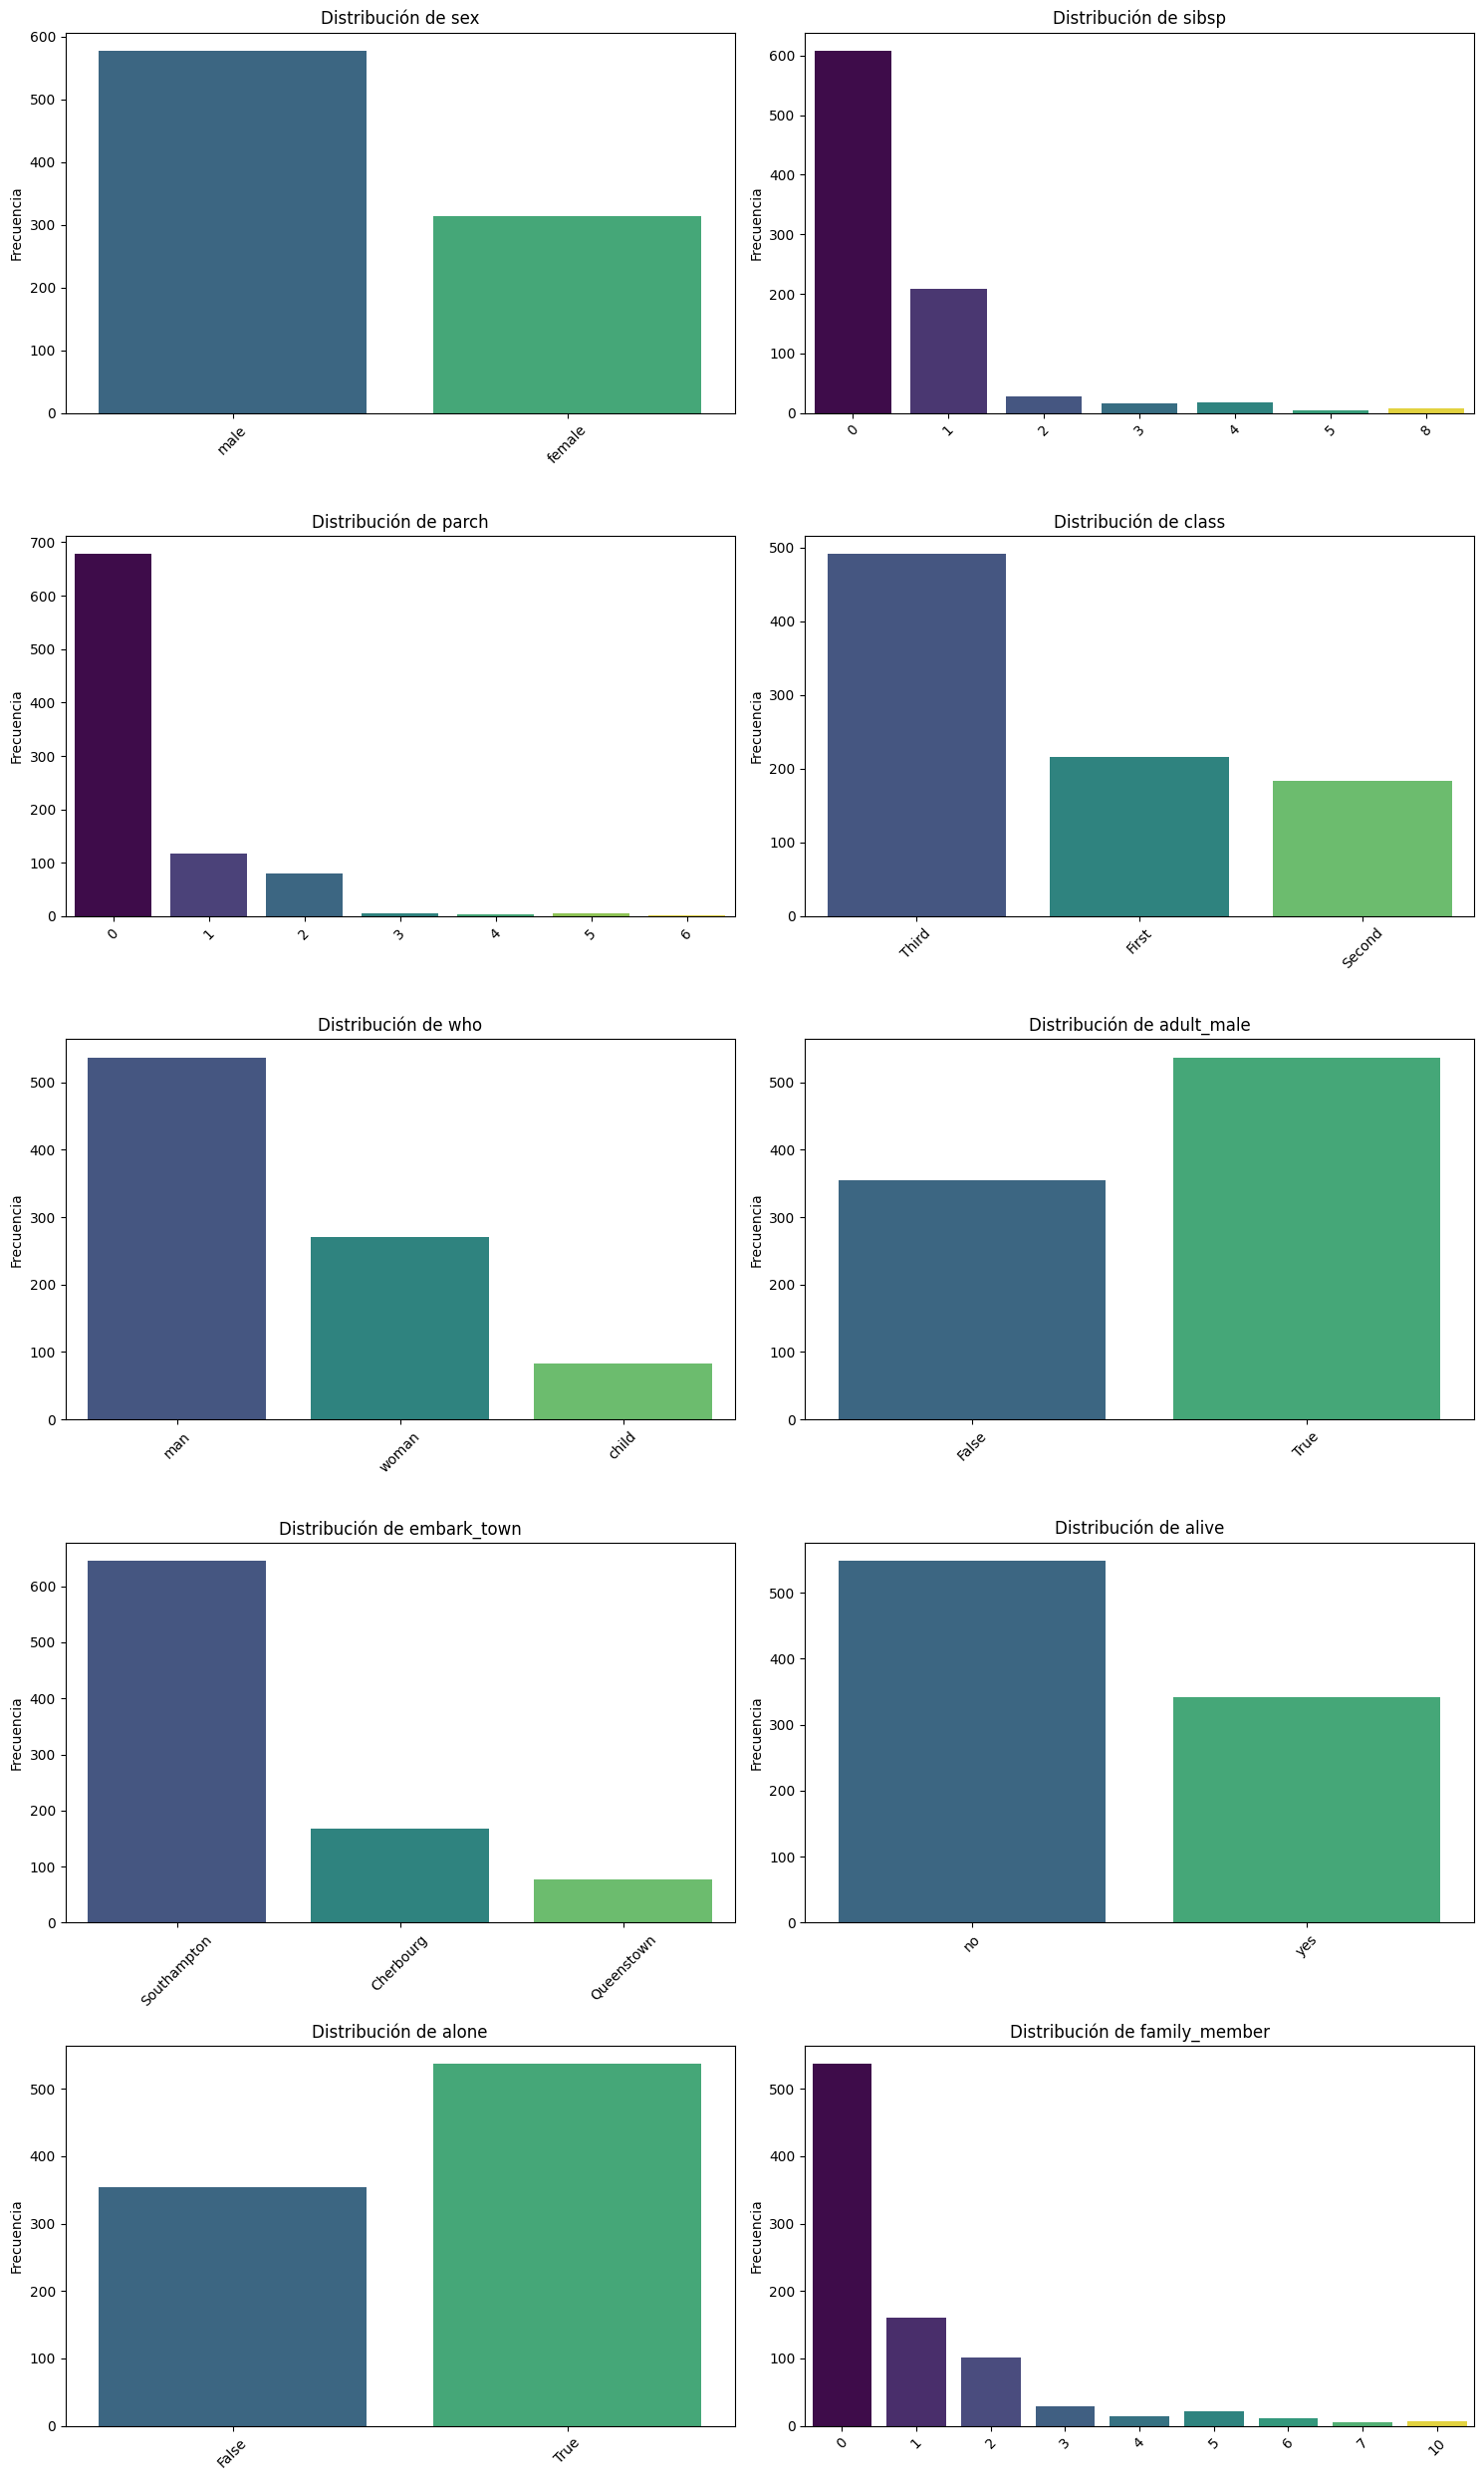

In [16]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic, categoricas_titanic)

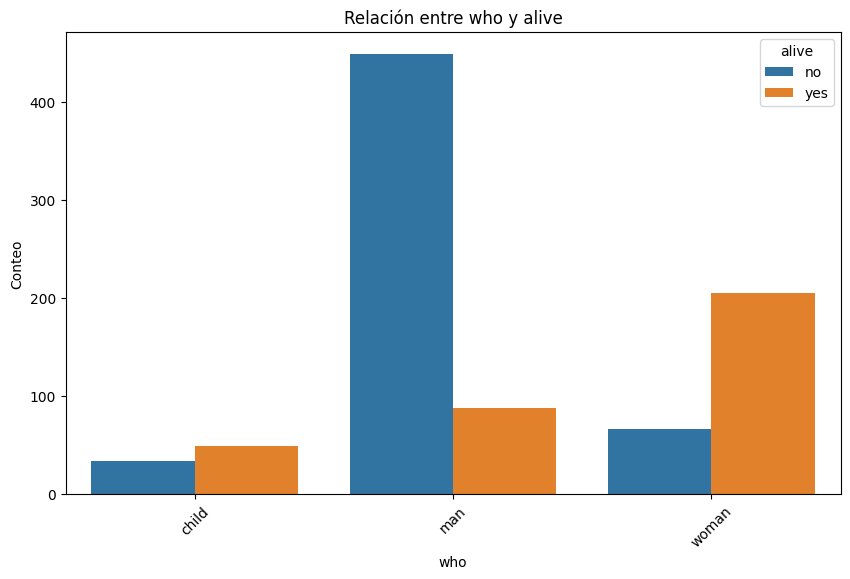

In [42]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"who","alive")

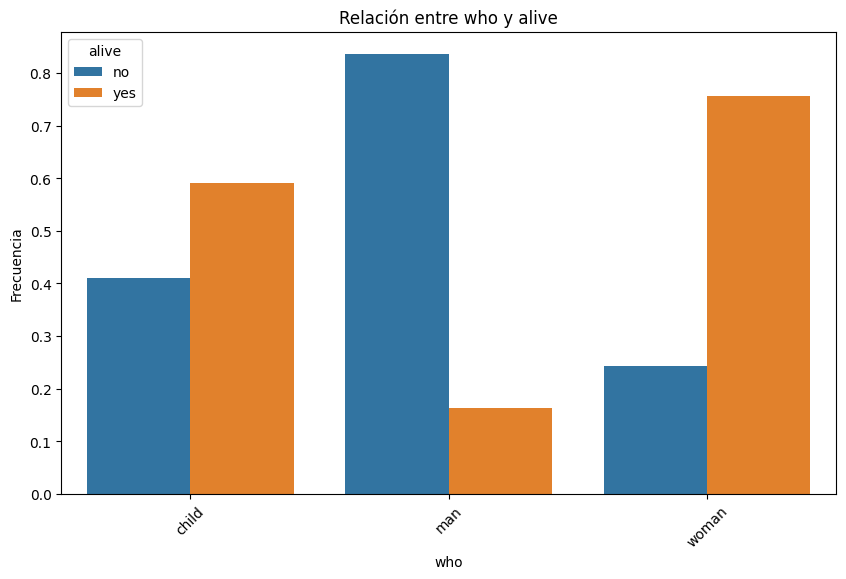

In [17]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"who","alive", relative_freq=True)

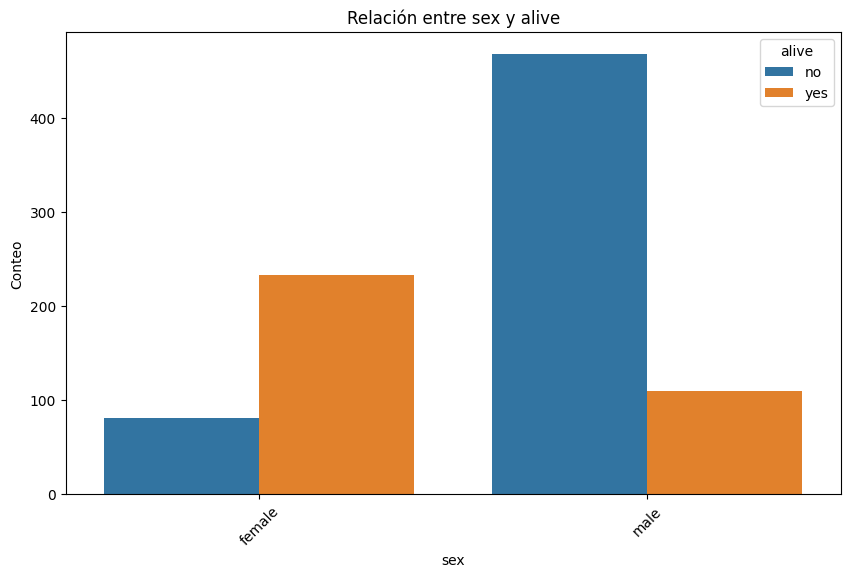

In [18]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"sex","alive", relative_freq=False)

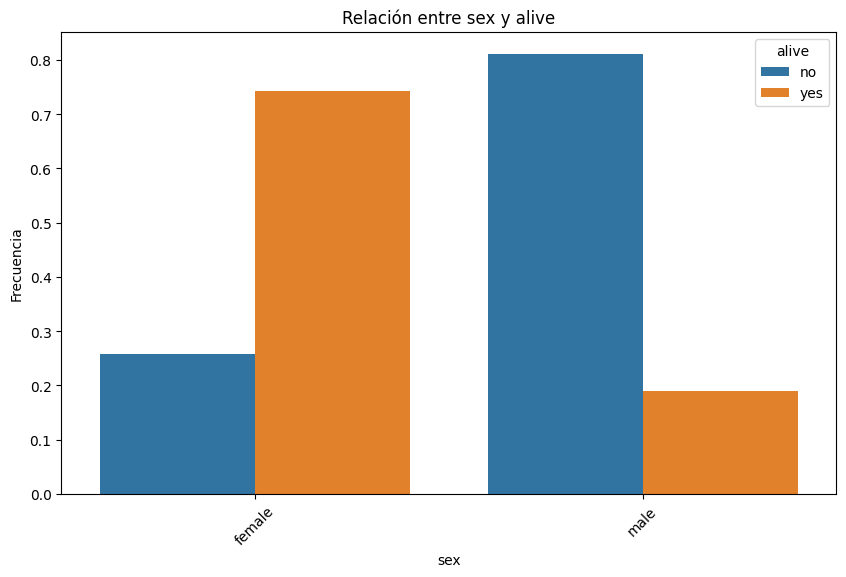

In [19]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"sex","alive", relative_freq=True)

In [20]:
#aplicamos el Test Chi-Cuadrado (χ²)
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['sex'])

tabla_contingencia

sex    female  male
alive              
no         81   468
yes       233   109

In [21]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.197357062775565e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [22]:
def niño_adulto(df):
    if df == "child":
        return "Niño"
    else:
        return "Adulto"

In [23]:
df_titanic["ninio"] = df_titanic["who"].transform(niño_adulto)

In [24]:
#aplicamos el Test Chi-Cuadrado (χ²)
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['ninio'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300109e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[497.85858586  51.14141414]
 [310.14141414  31.85858586]]


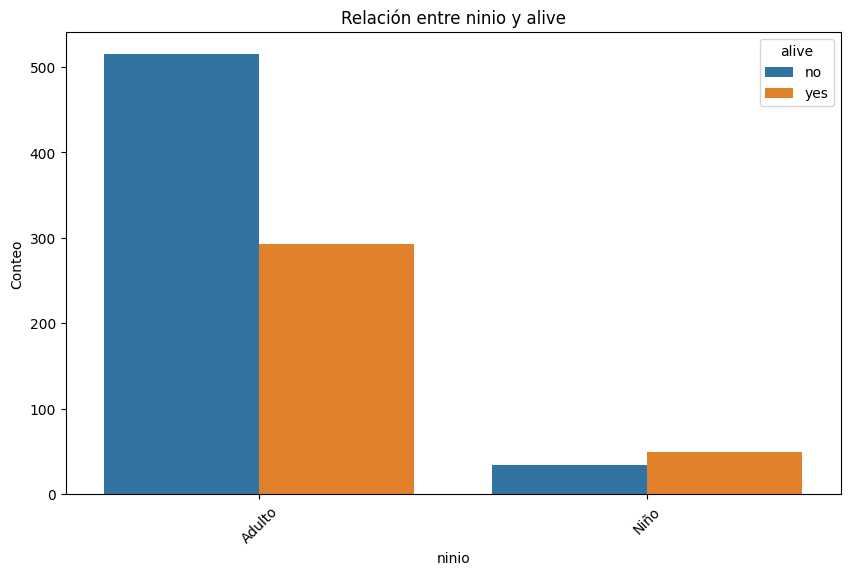

In [25]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"ninio","alive", relative_freq=False)

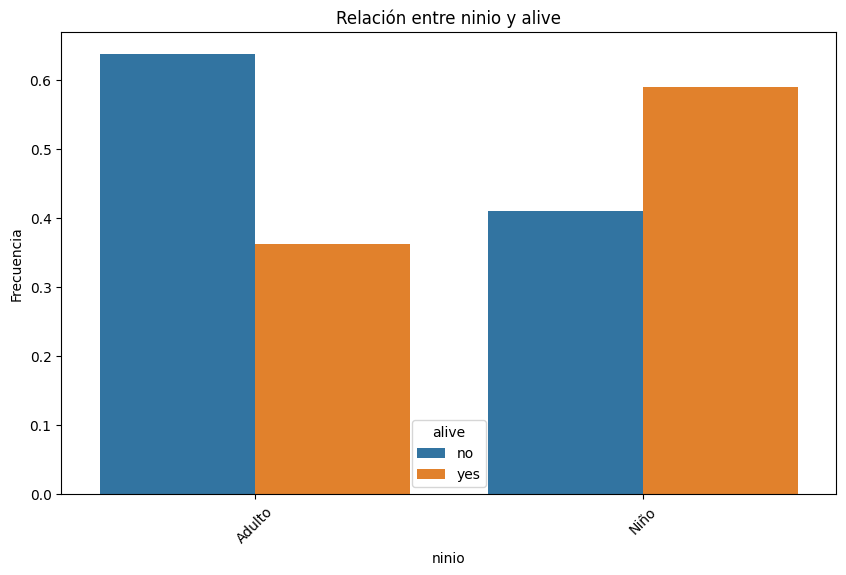

In [26]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"ninio","alive", relative_freq=True)

En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

1.  En terminos Absolutos y relativos, sobrevivieron mas Mujeres que hombres y niños auque en terminos relativos las mujeres y los niños se acercan
2.  Si nos fijamos en el sexo, sobrevivieron mas mujeres tanto en terminos relativos como en terminos absolutos. Aplicando el test de ChiCuadrado observamos que hay relacion estadistica entre las variables ya que el valor de P-Value: 1.197357062775565e-58 es menor que 0.05 ya que como hipotesis de partida la independencia de las variables, por lo que si que son dependientes
3.  Si nos fijamos entre ser niño o adulto, sobrevivieron mas niños que adultos en terminos relativos pero no en absoltuos ya que en este ultimo sovbrevivieron mas adultos en numero total. Aplicando el test de ChiCuadrado observamos que hay relacion estadistica entre las variables ya que el valor de P-Value: 8.005497211300109e-05 es menor que 0.05 ya que como hipotesis de partida la independencia de las variables, por lo que si que son dependientes


In [ ]:
#bootcampviztools.plot_categorical_relationship_fin(df_titanic,"class",["alive","Who"], relative_freq=False)

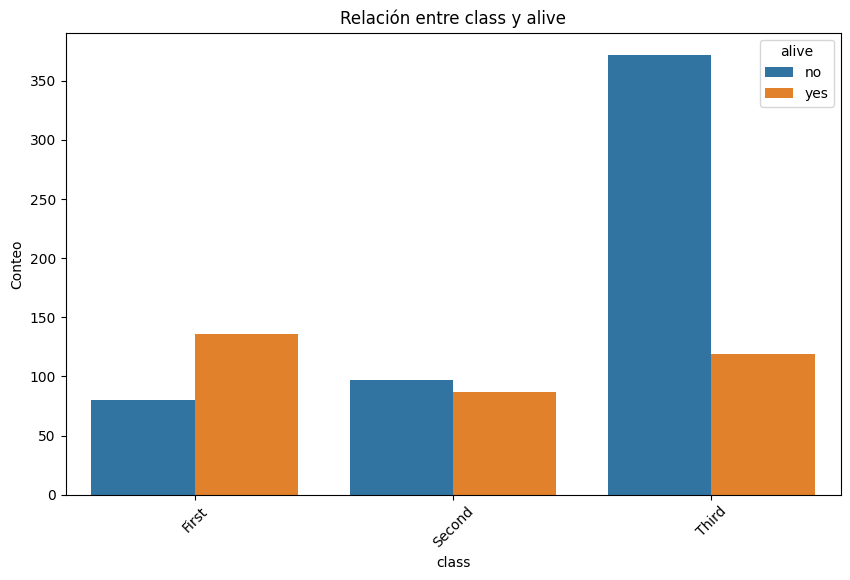

In [27]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"class","alive", relative_freq=False)

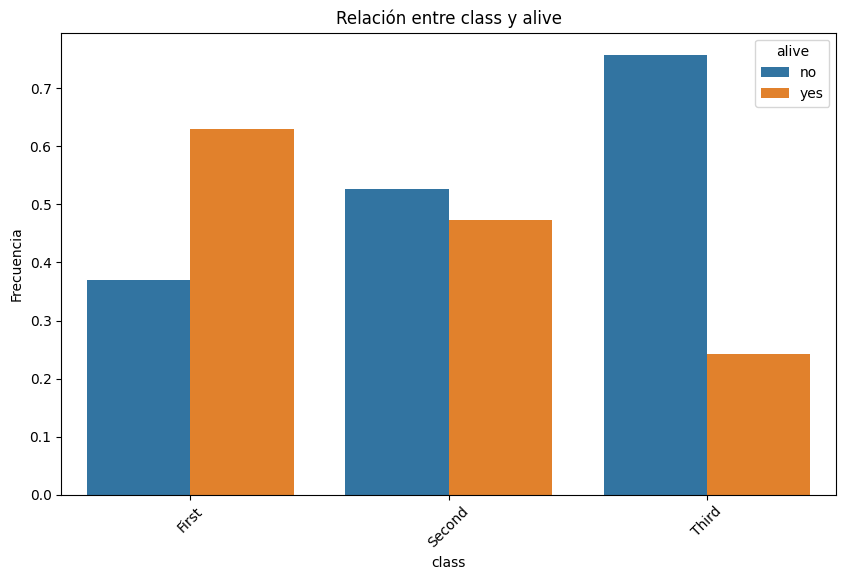

In [28]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"class","alive", relative_freq=True)

In [29]:
#aplicamos el Test Chi-Cuadrado (χ²)
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
1. En termino absolutos hay mas supervivientes que estuvieron en primera clase, pero los tres valores estan muy parejos. En terminos relativos si que se ve que hay mayor diferencia y hay mas supervivientes que compraron billete en primera clase. Aplicando el test de ChiCuadrado observamos que hay relacion estadistica entre las variables ya que el valor de P-Value: 4.549251711298793e-23 es menor que 0.05 ya que como hipotesis de partida la independencia de las variables, por lo que si que son dependientes

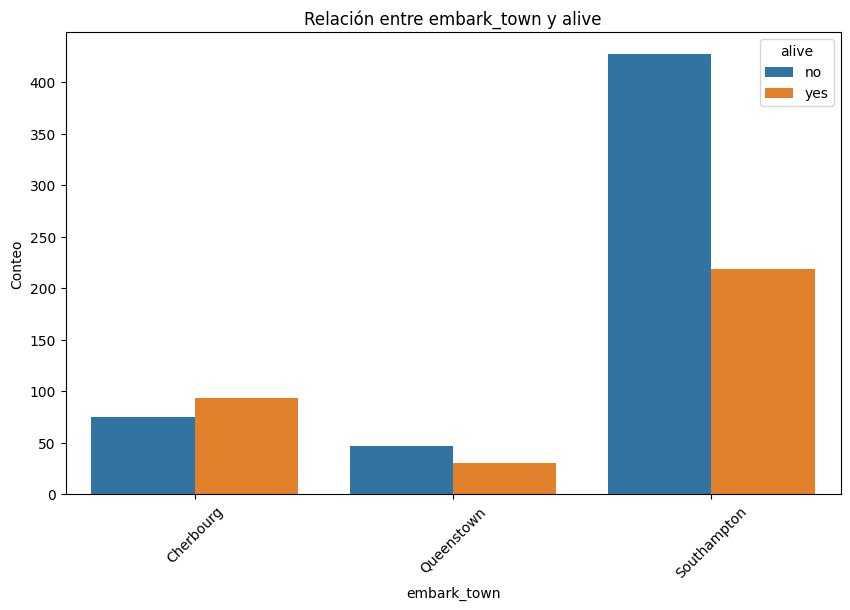

In [30]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq=False)

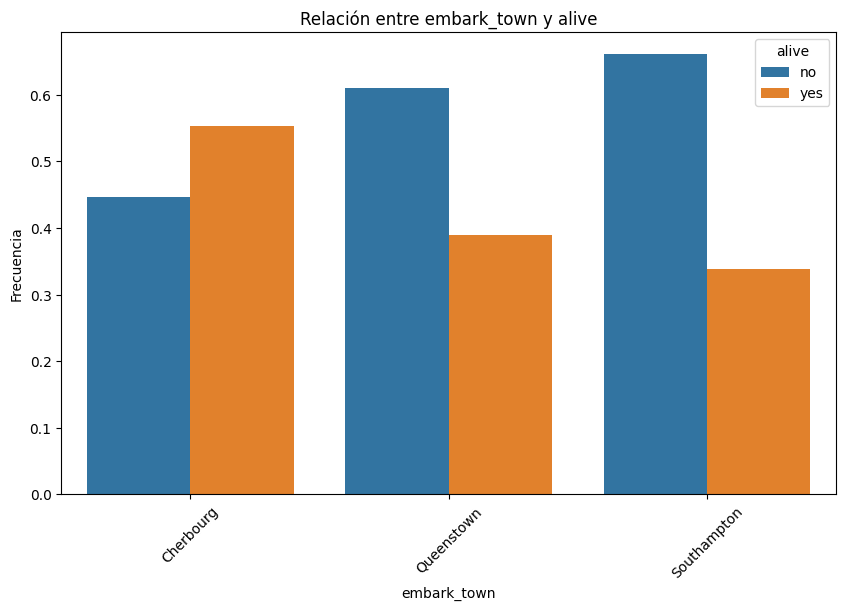

In [63]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq=True)

In [31]:
#aplicamos el Test Chi-Cuadrado (χ²)
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
1. En terminos absolutos sobrevivieron mas personas que embarcaron en Southamoton
2. En terminos relaticos sobrevivieron mas personas que embarcaron en Cherbourg
3. Aplicando el test de ChiCuadrado observamos que hay relacion estadistica entre las variables ya que el valor de P-Value: 2.3008626481449577e-06 es menor que 0.05 ya que como hipotesis de partida la independencia de las variables, por lo que si que son dependientes

In [32]:
Numericas_titanic = df_tipificacion.loc[df_tipificacion["Clasificada_como"] == "Numerica Continua"].index

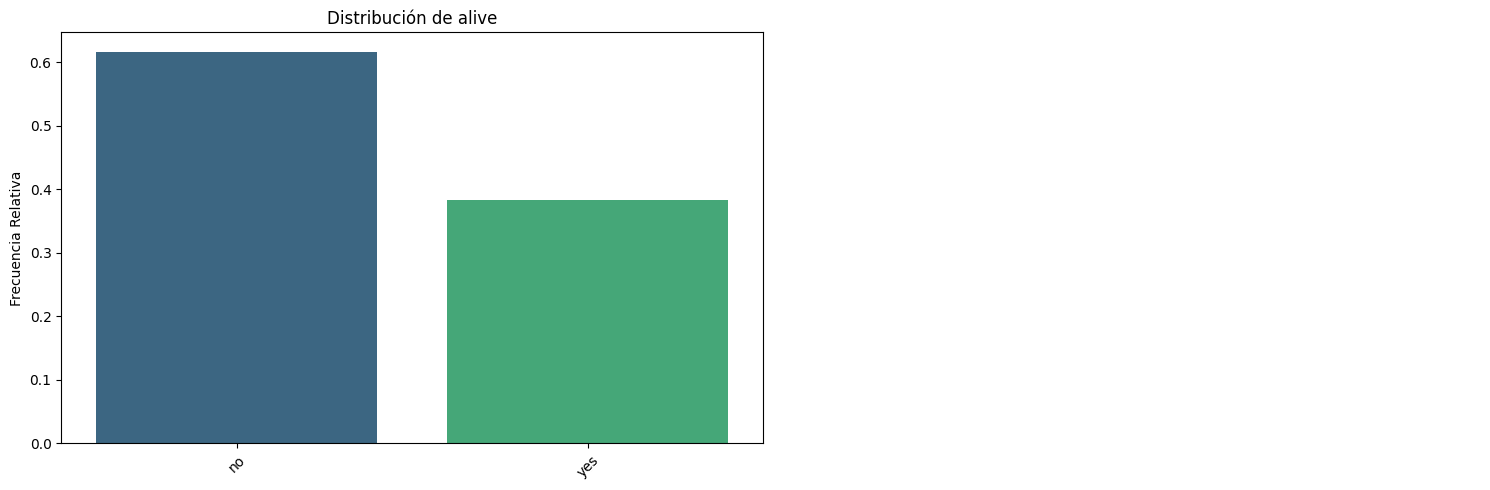

In [33]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic,["alive"], relativa=True)

(2,)


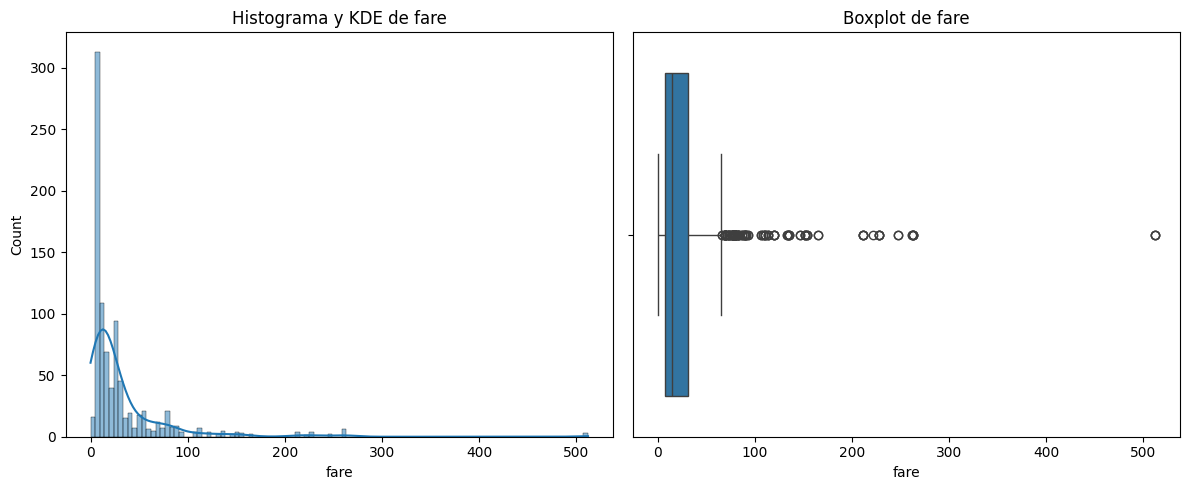

In [34]:
bootcampviztools.plot_combined_graphs(df_titanic, ["fare"])

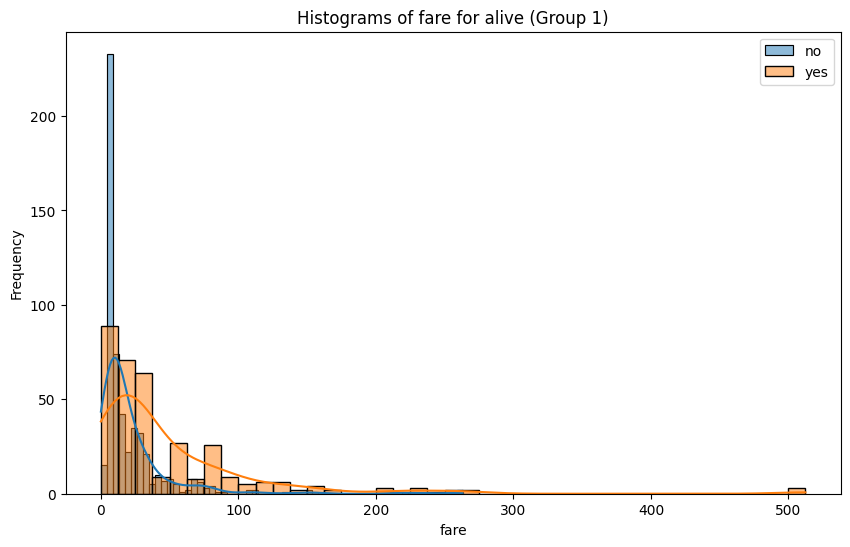

In [75]:
bootcampviztools.plot_grouped_histograms(df_titanic, cat_col="alive", num_col="fare", group_size=2)

In [35]:
#Como no hya una distribucion normal, aplicamos el test de Mann-Whitney
from scipy.stats import mannwhitneyu

#Separar los datos en dos grupos según la variable categórica
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

#Aplicar la prueba y mostrar los resultados
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250238e-22


¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
1. pirmero de todo, nuestra hipostesis de partida en el test es que no hay diferencia estadistica significativa entre las medianas de los dos valores, como hemos obtenido un Valor p: 4.553477179250238e-22 que es menor que 0.05 rechazamos la hipoteis y concluimos que hay una confianza estadistica en que las medianas de cada grupo son diferentes para cada valoir y que hay una relaciones entre los valores de la categorica y los valores de la variable numerica.

In [36]:
df_titanic.loc[df_titanic["fare"] == 0]

sex        age  sibsp  parch  fare   class  who  adult_male  \
179  male  36.000000      0      0   0.0   Third  man        True   
263  male  40.000000      0      0   0.0   First  man        True   
271  male  25.000000      0      0   0.0   Third  man        True   
277  male  33.173123      0      0   0.0  Second  man        True   
302  male  19.000000      0      0   0.0   Third  man        True   
413  male  33.173123      0      0   0.0  Second  man        True   
466  male  33.173123      0      0   0.0  Second  man        True   
481  male  33.173123      0      0   0.0  Second  man        True   
597  male  49.000000      0      0   0.0   Third  man        True   
633  male  33.173123      0      0   0.0   First  man        True   
674  male  33.173123      0      0   0.0  Second  man        True   
732  male  33.173123      0      0   0.0  Second  man        True   
806  male  39.000000      0      0   0.0   First  man        True   
815  male  33.173123      0      0   0.0   First  man        True   
822  male  38.000000      0      0   0.0   First  man        True   

     embark_town alive  alone  family_member   ninio  
179  Southampton    no   True              0  Adulto  
263  Southampton    no   True              0  Adulto  
271  Southampton   yes   True              0  Adulto  
277  Southampton    no   True              0  Adulto  
302  Southampton    no   True              0  Adulto  
413  Southampton    no   True              0  Adulto  
466  Southampton    no   True              0  Adulto  
481  Southampton    no   True              0  Adulto  
597  Southampton    no   True              0  Adulto  
633  Southampton    no   True              0  Adulto  
674  Southampton    no   True              0  Adulto  
732  Southampton    no   True              0  Adulto  
806  Southampton    no   True              0  Adulto  
815  Southampton    no   True              0  Adulto  
822  Southampton    no   True              0  Adulto

(2,)


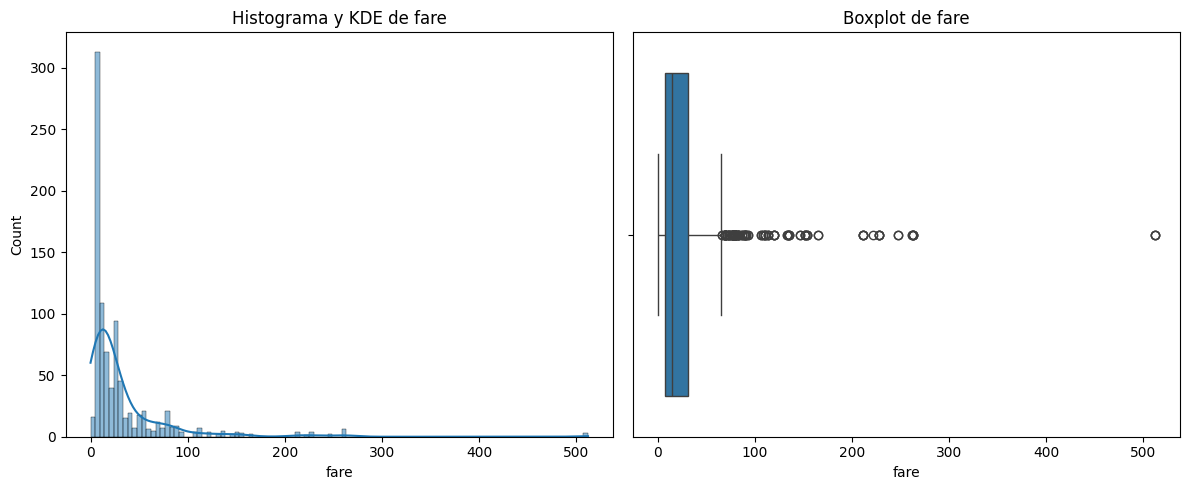

In [37]:
bootcampviztools.plot_combined_graphs(df_titanic, ["fare"])

In [38]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max()]

sex   age  sibsp  parch      fare  class    who  adult_male  \
258  female  35.0      0      0  512.3292  First  woman       False   
679    male  36.0      0      1  512.3292  First    man        True   
737    male  35.0      0      0  512.3292  First    man        True   

    embark_town alive  alone  family_member   ninio  
258   Cherbourg   yes   True              0  Adulto  
679   Cherbourg   yes  False              1  Adulto  
737   Cherbourg   yes   True              0  Adulto

Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
1. No se contabilizo correctamente
2. Fueron tres presonas con Id = 258, 679 y 737 y sobrevivieron los 3

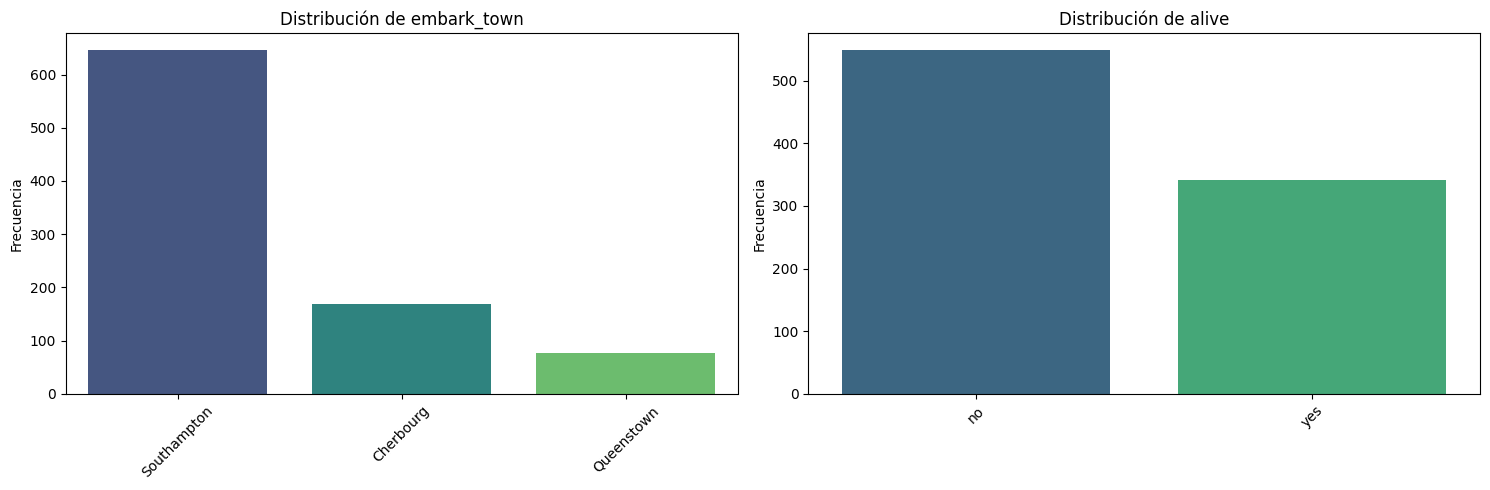

In [39]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic, ["embark_town", "alive"])

In [ ]:
#mi variable directora sera "alive", no se hacerlo con la trifa pero si con las clases


In [40]:
columnas = ["alive","embark_town","class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


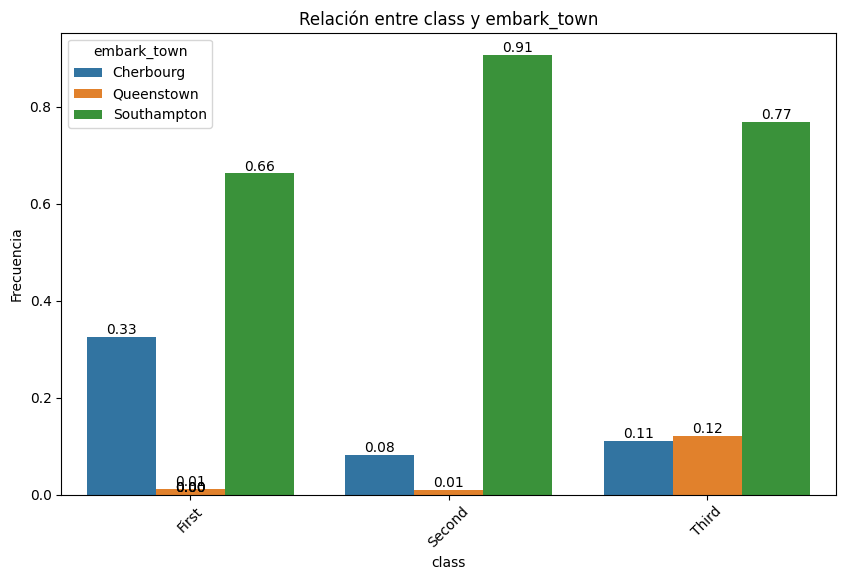

Respuesta yes:


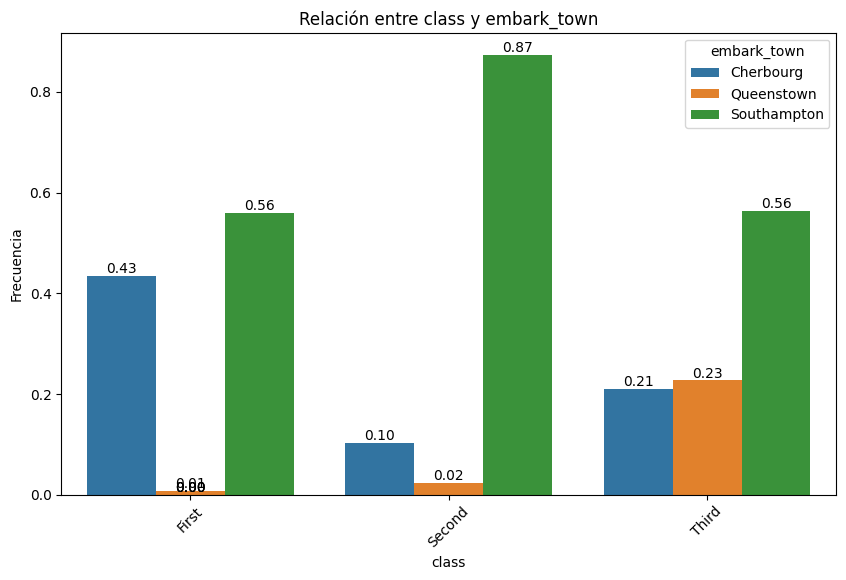

In [100]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bootcampviztools.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.
1. No hay relacion entre ellas, ya que los porcentajes entre el si y no por ciudad y tarifa son practicamente calcados.

In [48]:
columnas = ["class","age","alive"] 
col_directora = "class"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta Third:


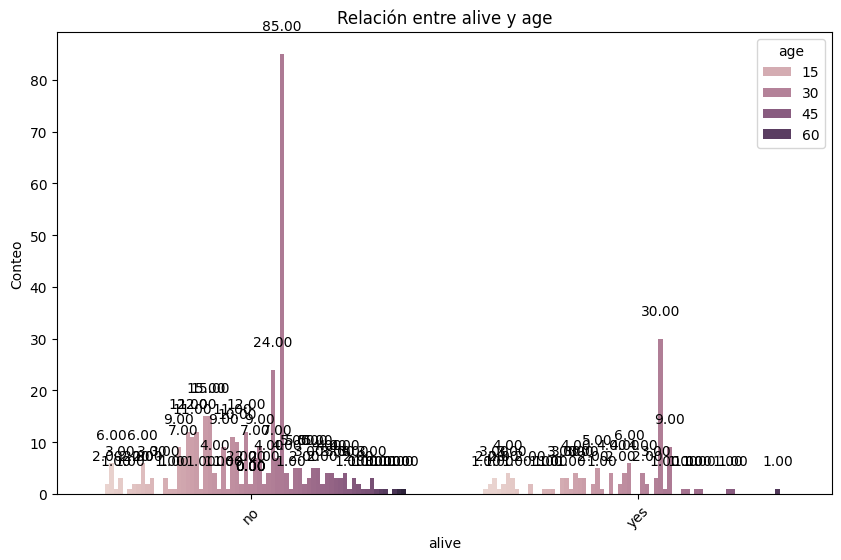

Respuesta First:


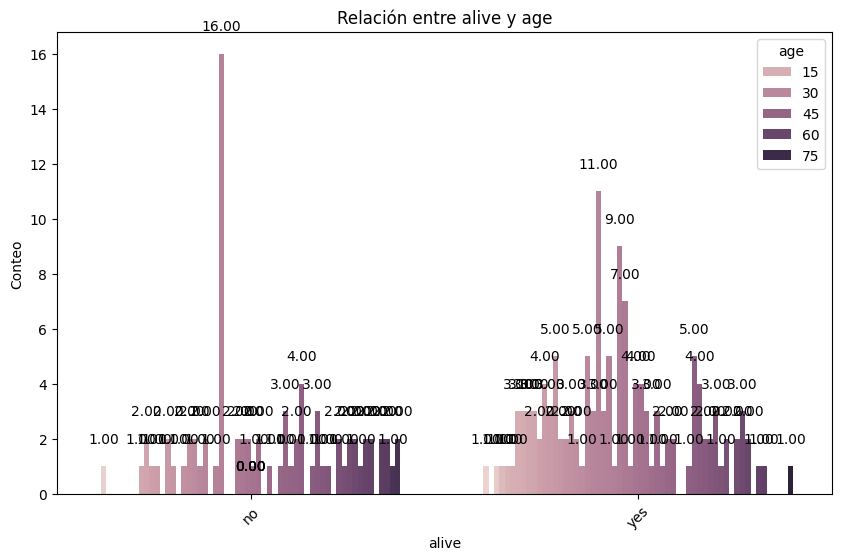

Respuesta Second:


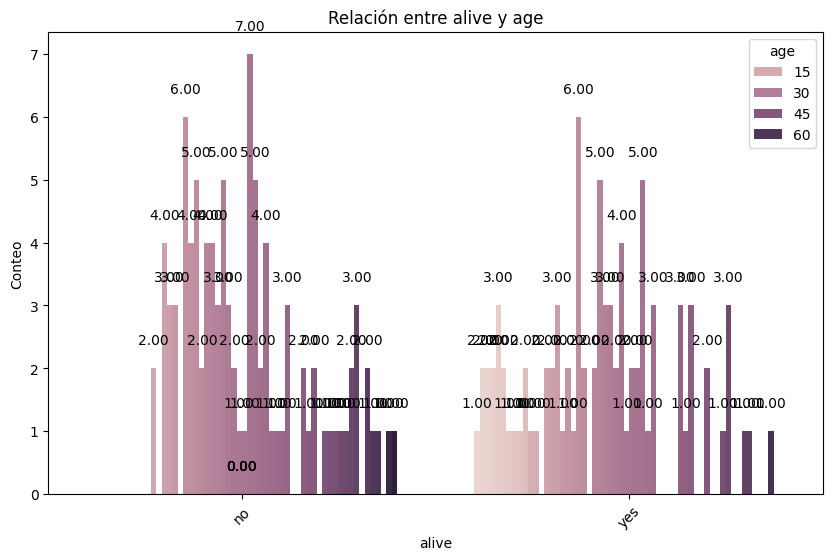

In [50]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bootcampviztools.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= False, show_values= True, size_group=20)

Respuesta Third:


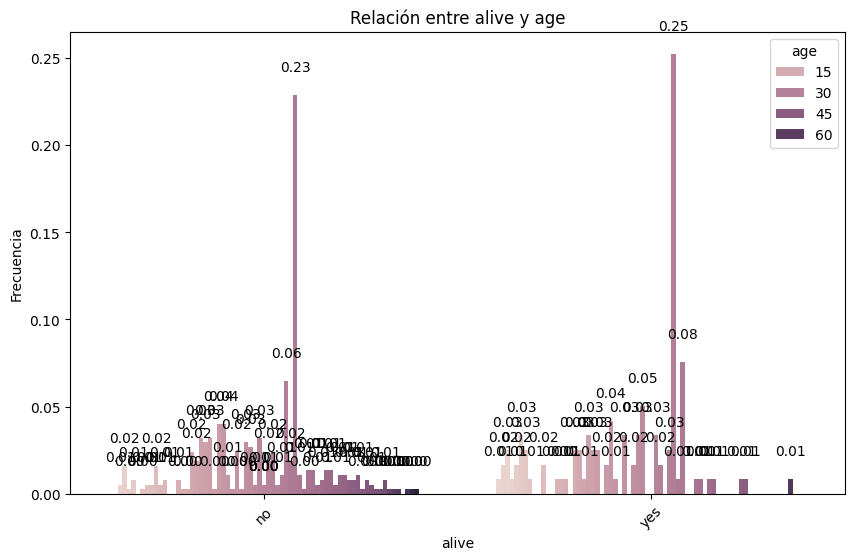

Respuesta First:


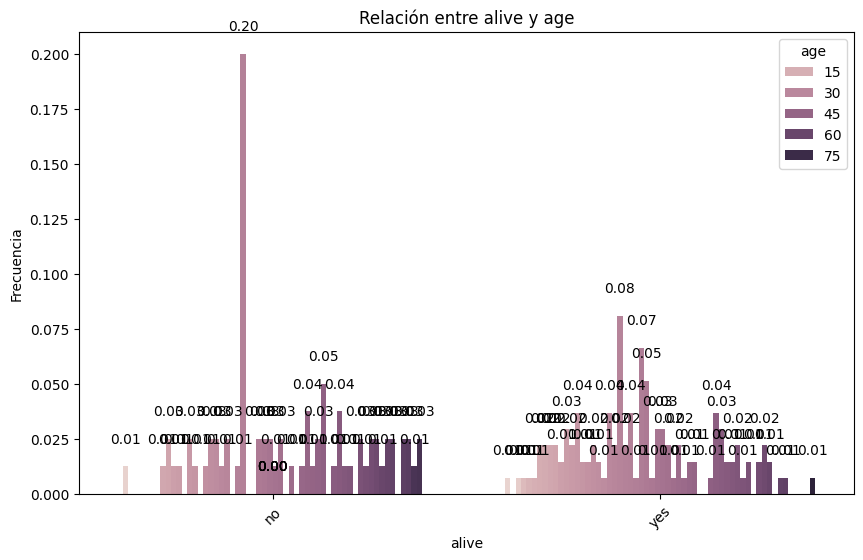

Respuesta Second:


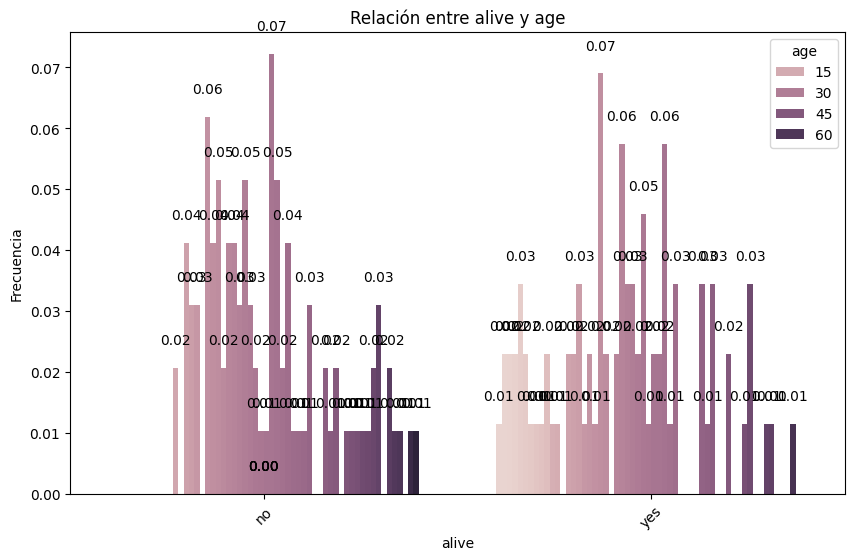

In [49]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bootcampviztools.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group=20)

Respuesta Third:


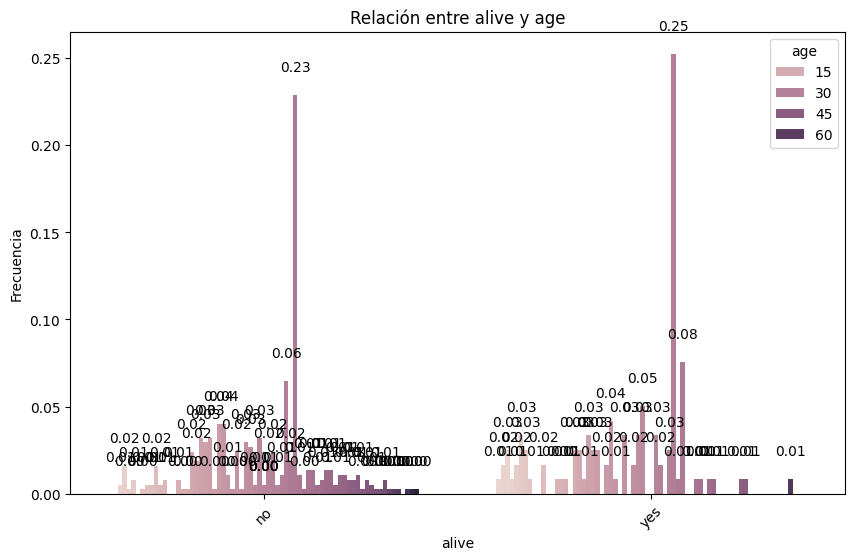

Respuesta First:


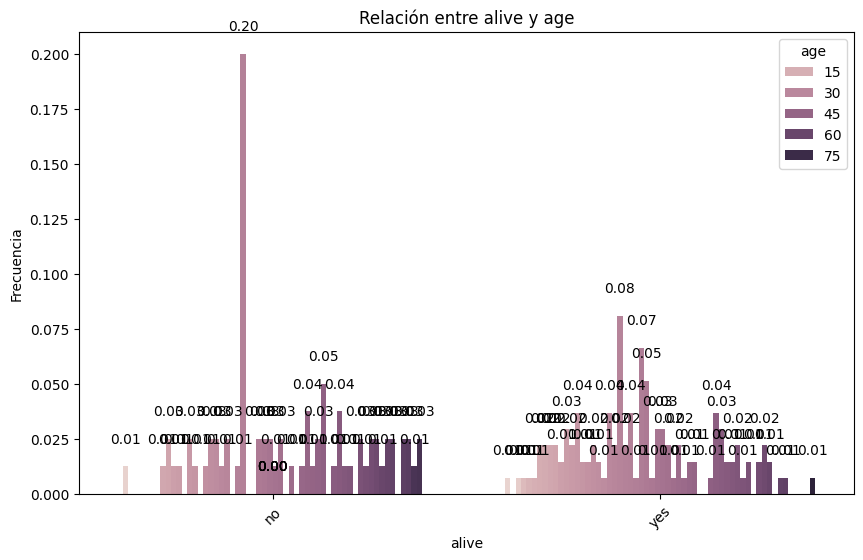

Respuesta Second:


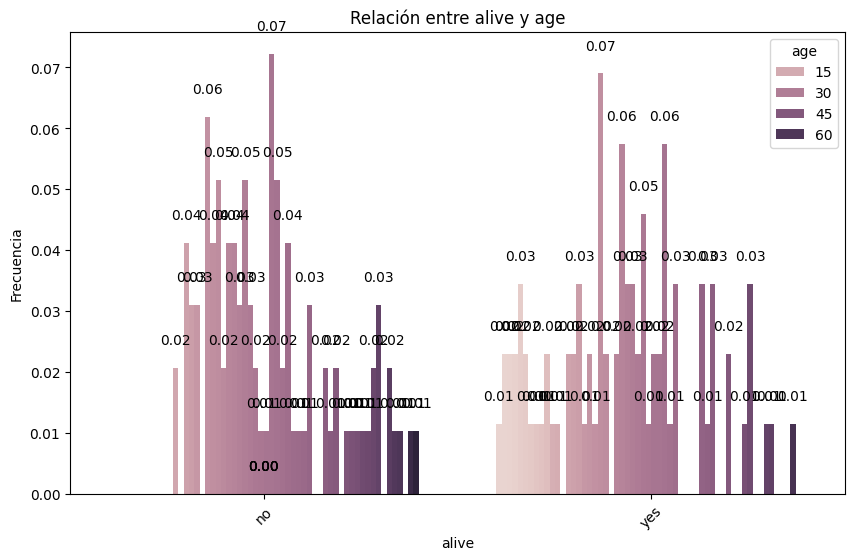

In [43]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bootcampviztools.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group=20)

Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?
1. Tanto en terminos absolutos como relativos, sobrevivio mas gente en tercera clase con una edad en torno a 45 años

In [55]:
columnas = ["fare","age","alive"] 
col_directora = "age"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta 22.0:


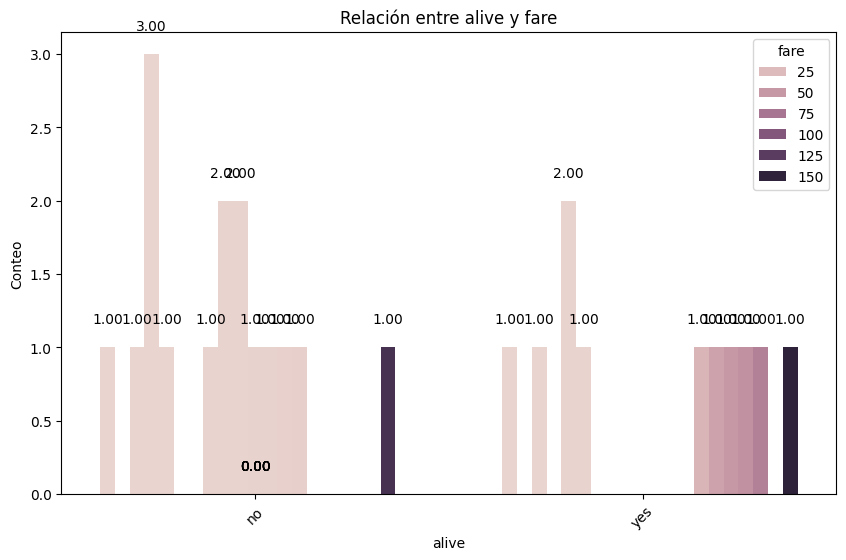

Respuesta 38.0:


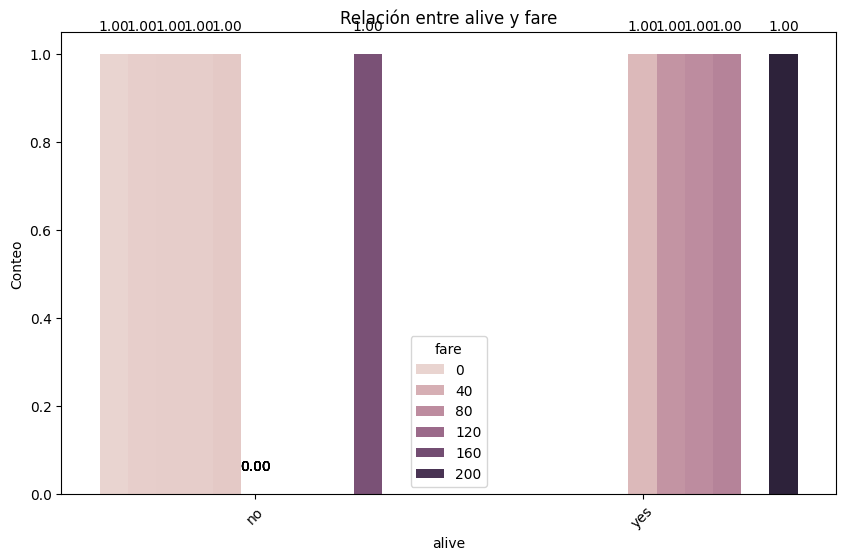

Respuesta 26.0:


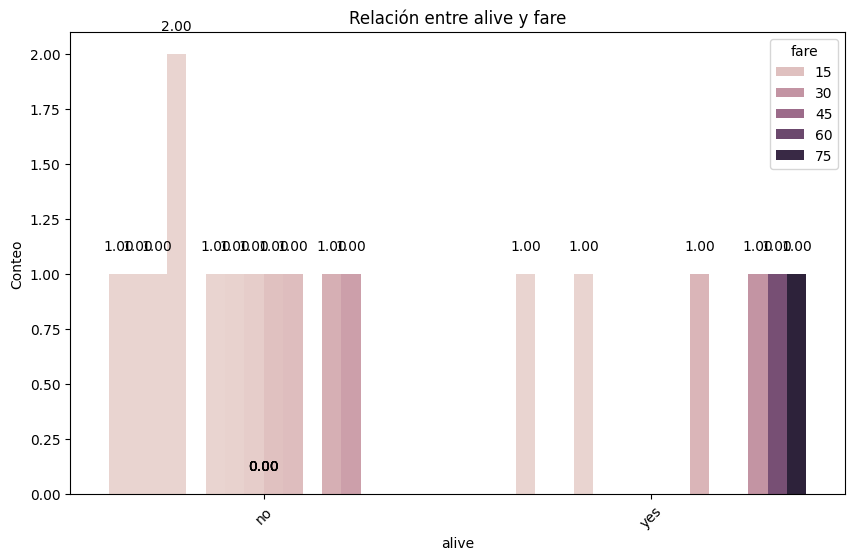

Respuesta 35.0:


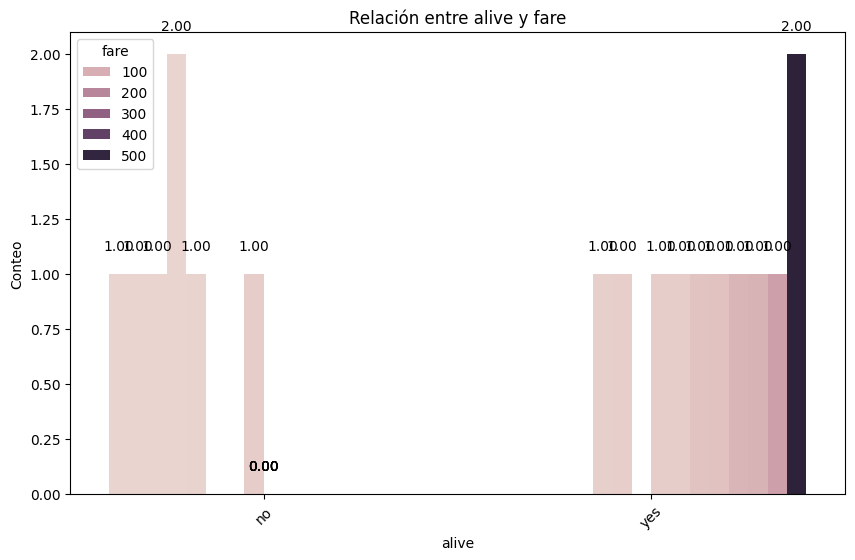

Respuesta 33.17312348668281:


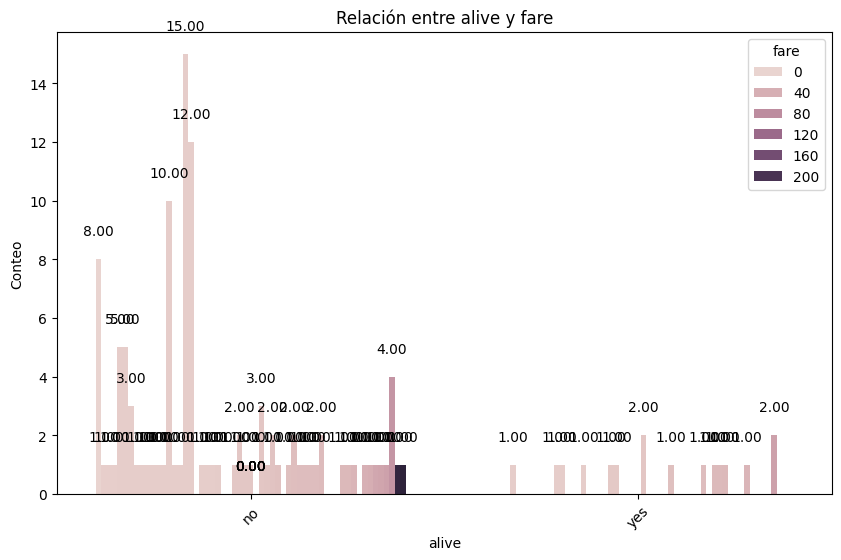

Respuesta 54.0:


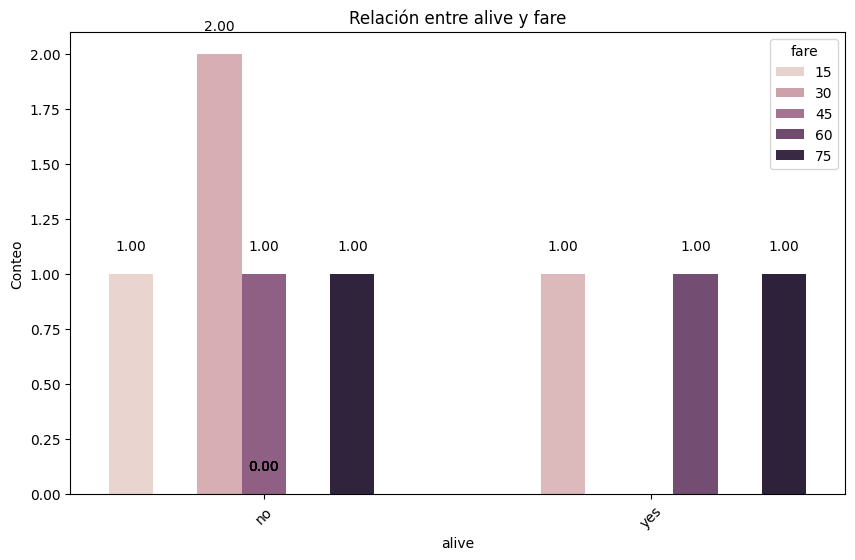

Respuesta 2.0:


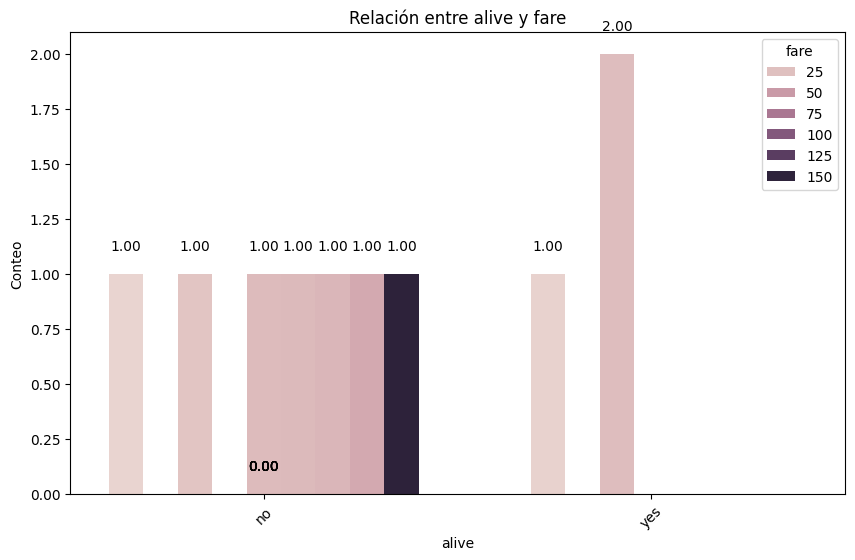

Respuesta 27.0:


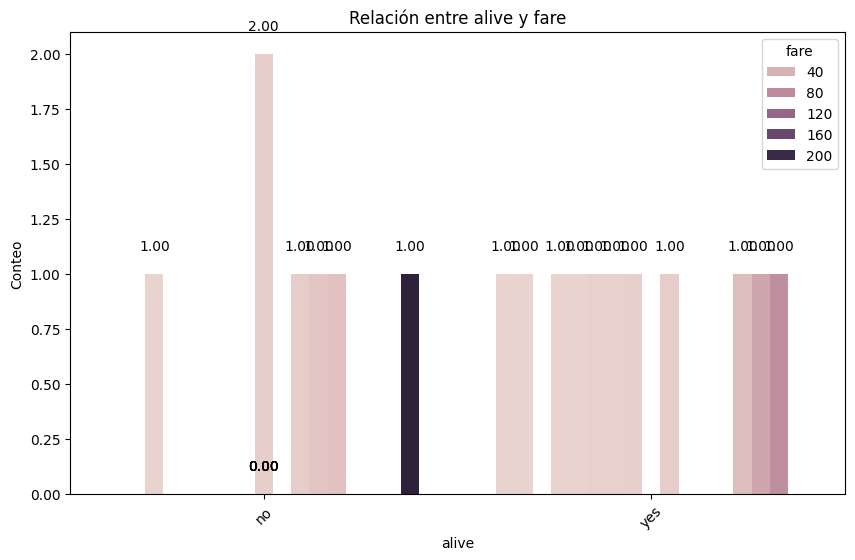

Respuesta 14.0:


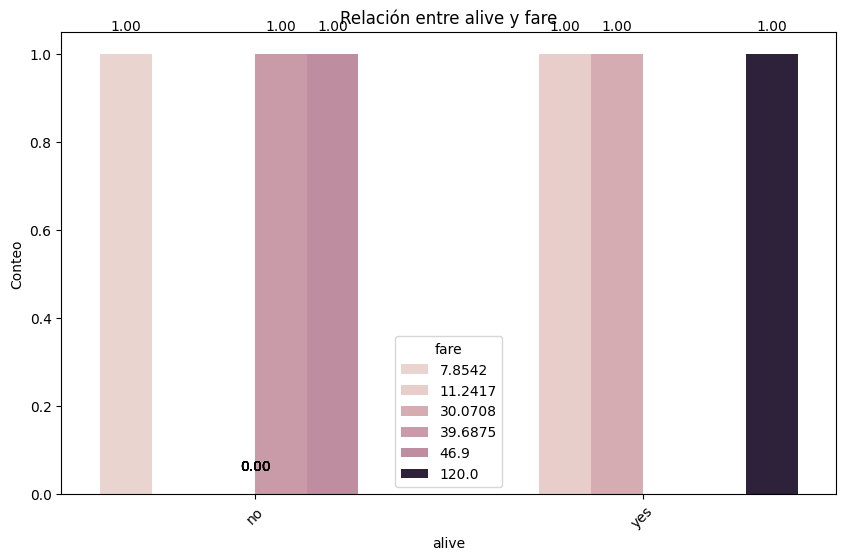

Respuesta 4.0:


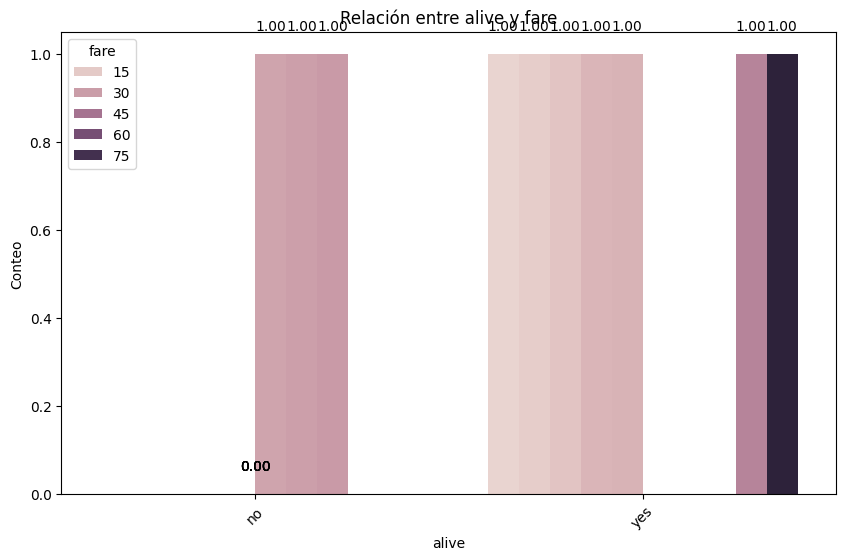

Respuesta 58.0:


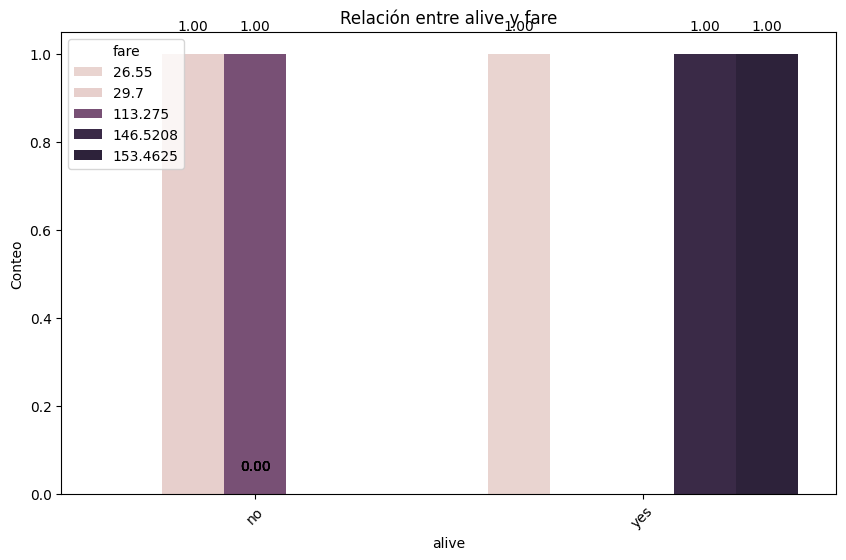

Respuesta 20.0:


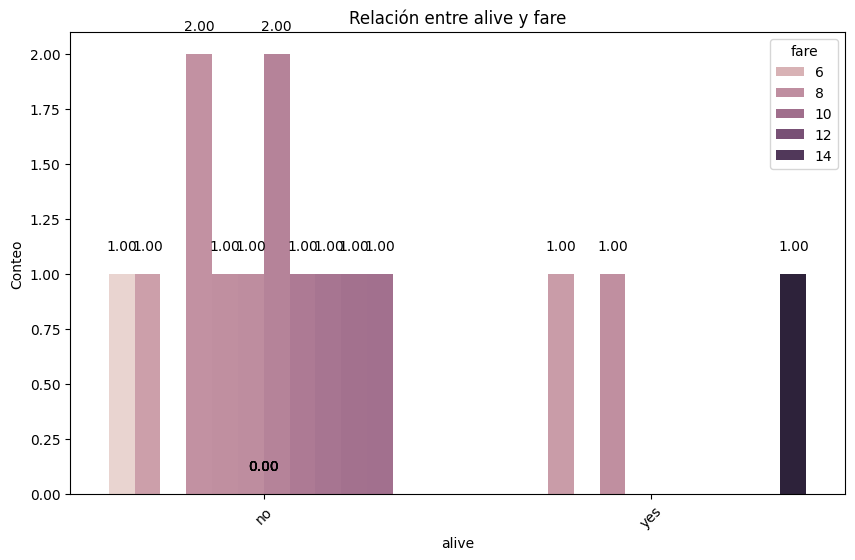

Respuesta 39.0:


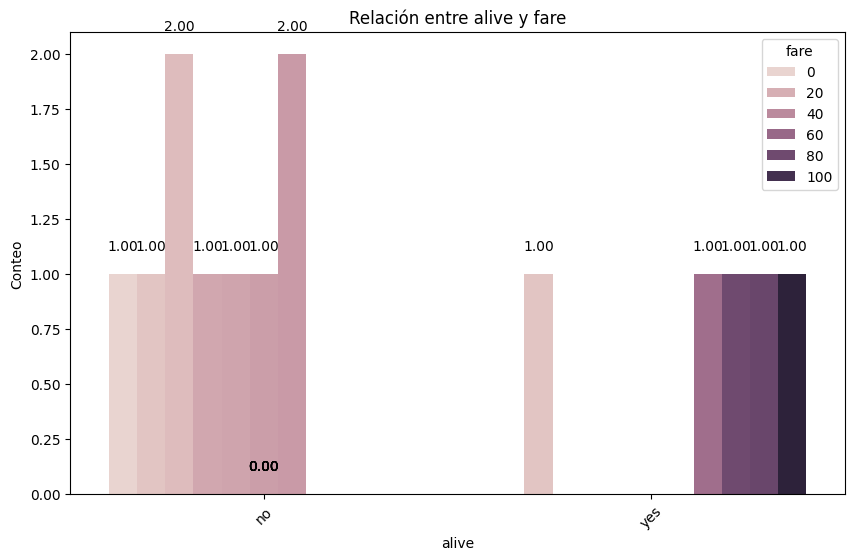

Respuesta 55.0:


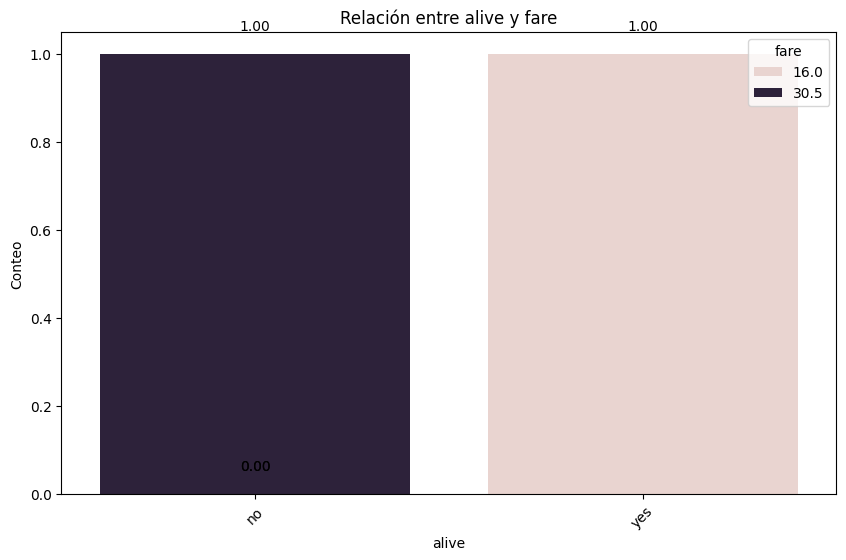

Respuesta 31.0:


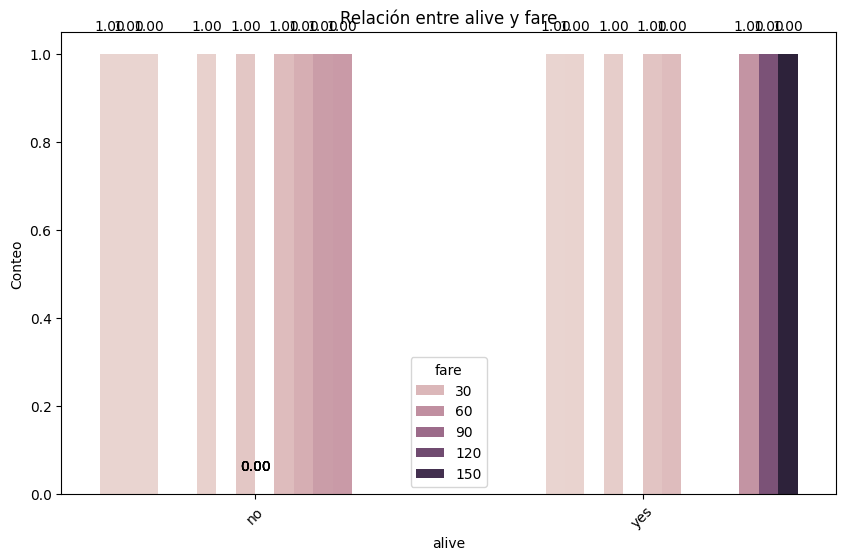

Respuesta 32.0:


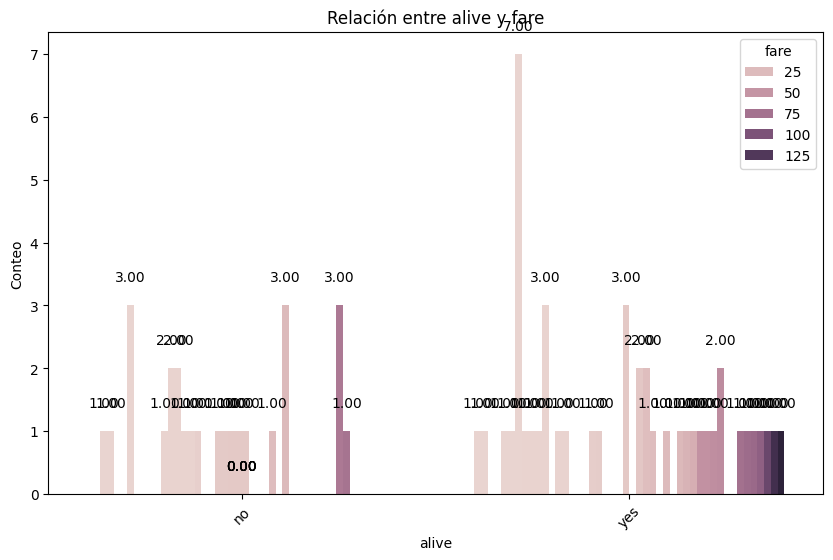

Respuesta 34.0:


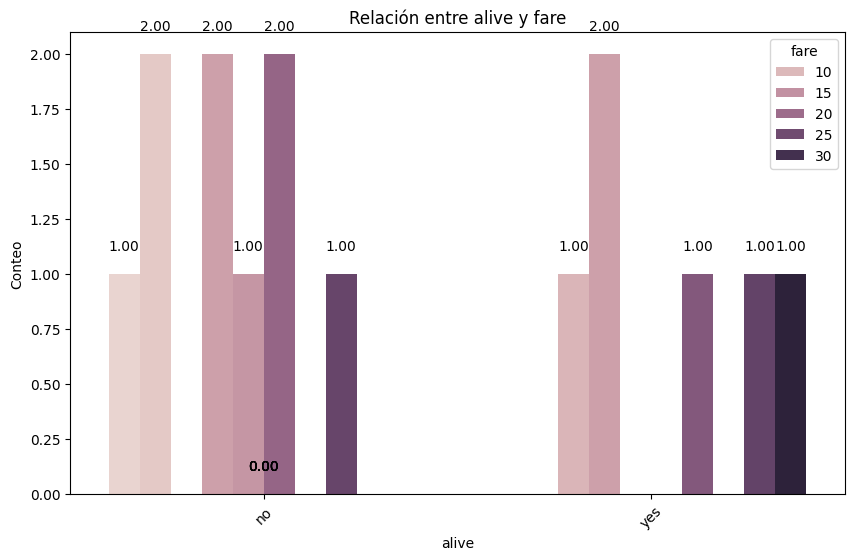

Respuesta 15.0:


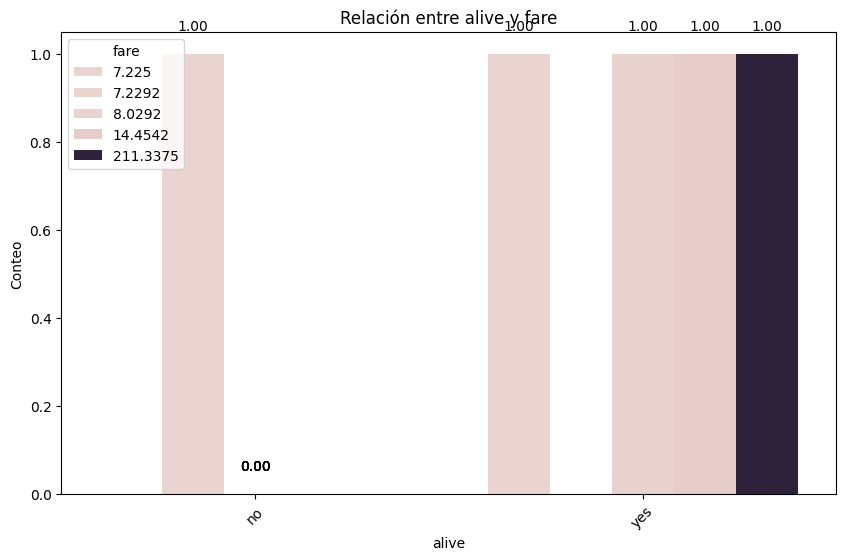

Respuesta 28.0:


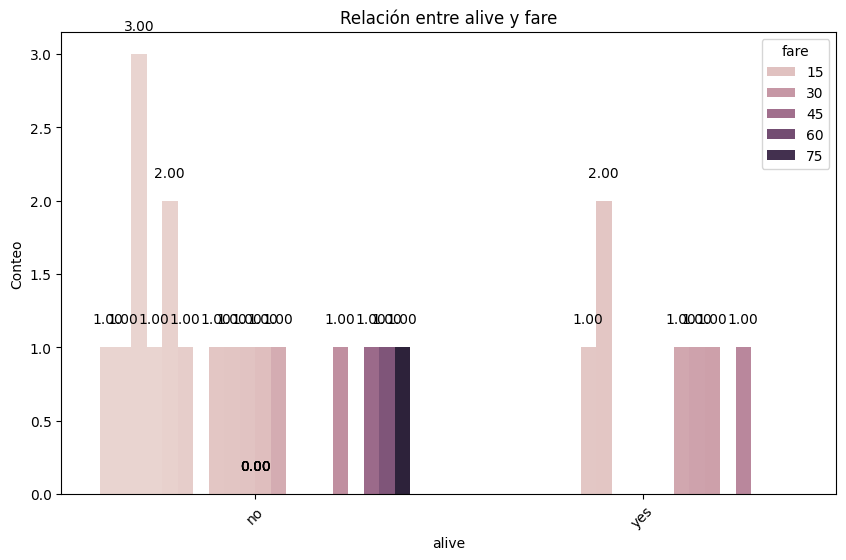

Respuesta 8.0:


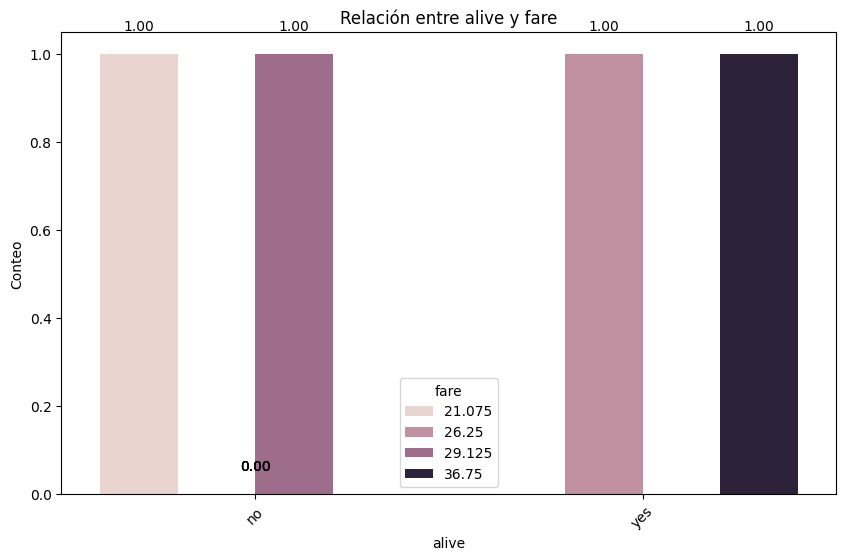

Respuesta 19.0:


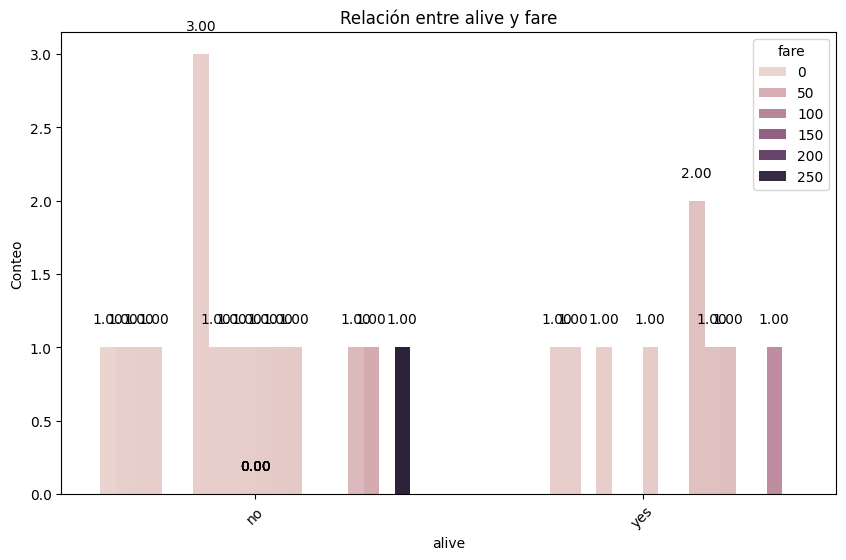

Respuesta 40.0:


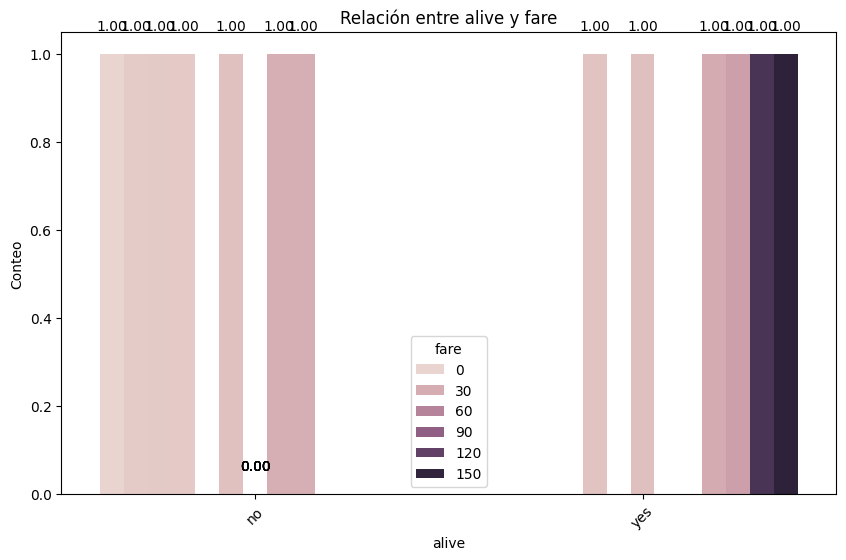

Respuesta 66.0:


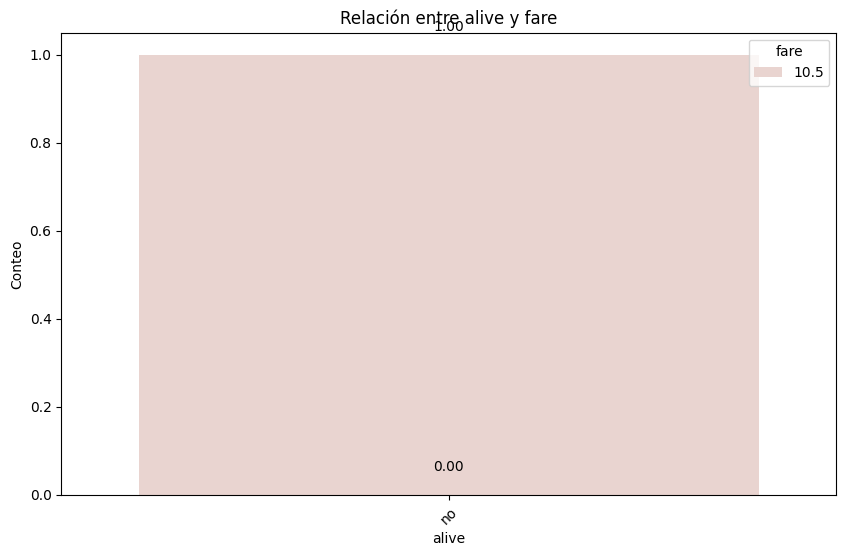

Respuesta 42.0:


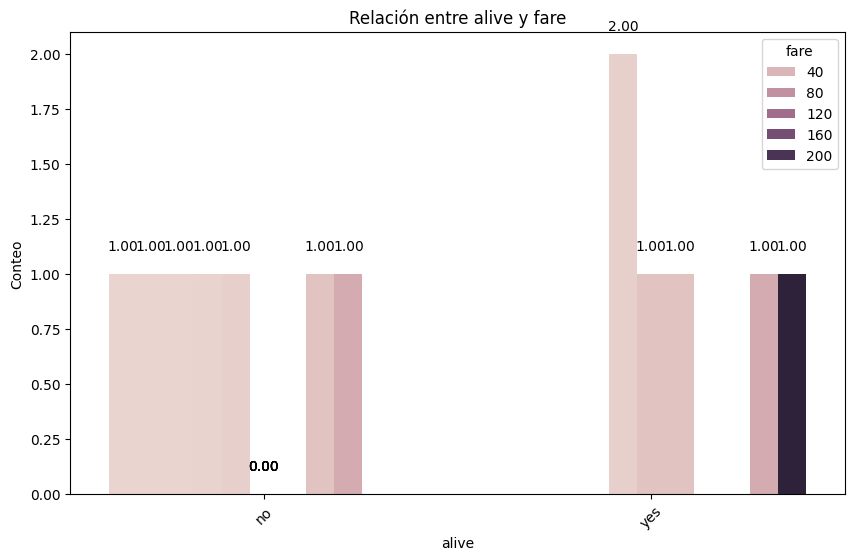

Respuesta 21.0:


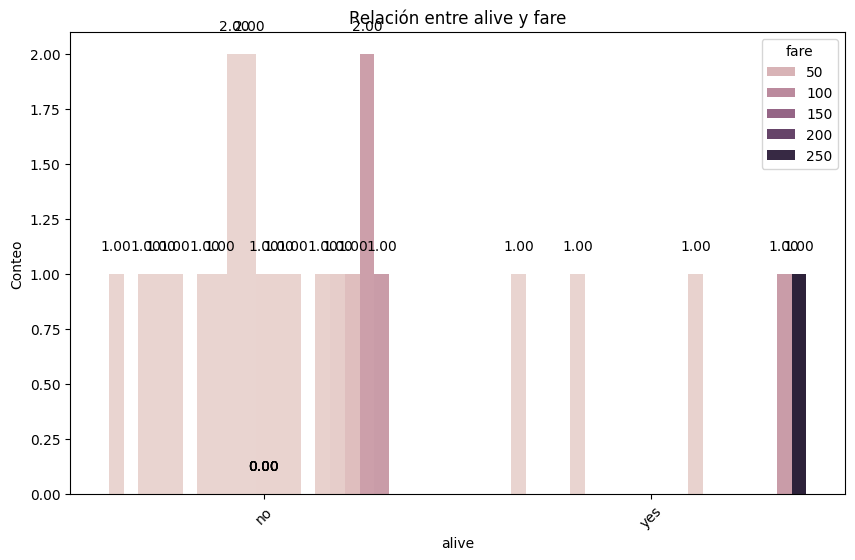

Respuesta 18.0:


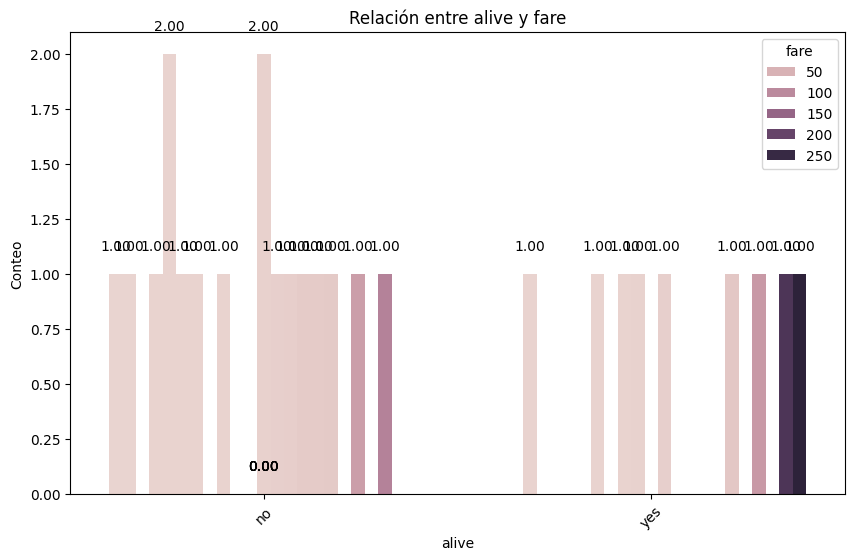

Respuesta 3.0:


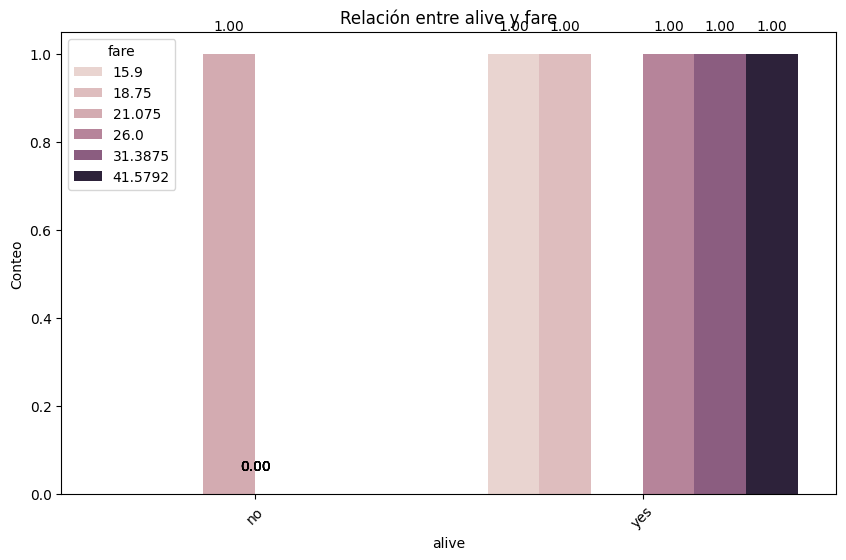

Respuesta 7.0:


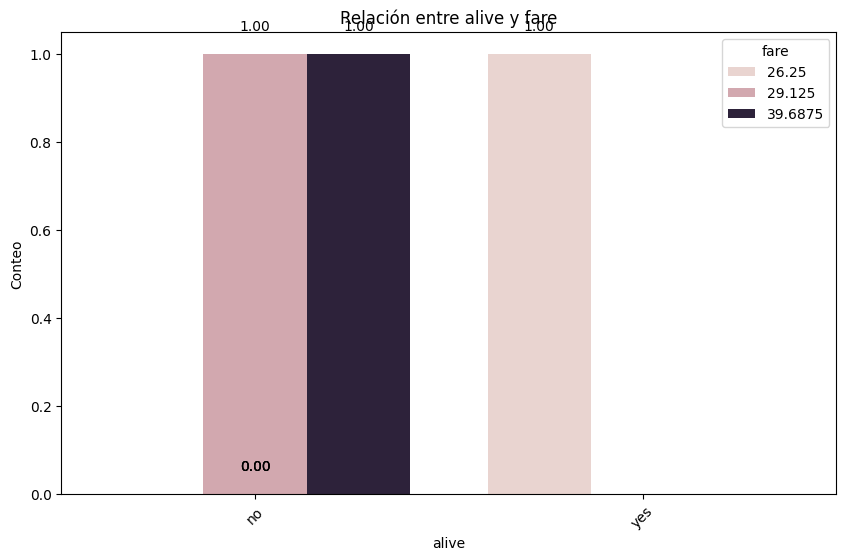

Respuesta 49.0:


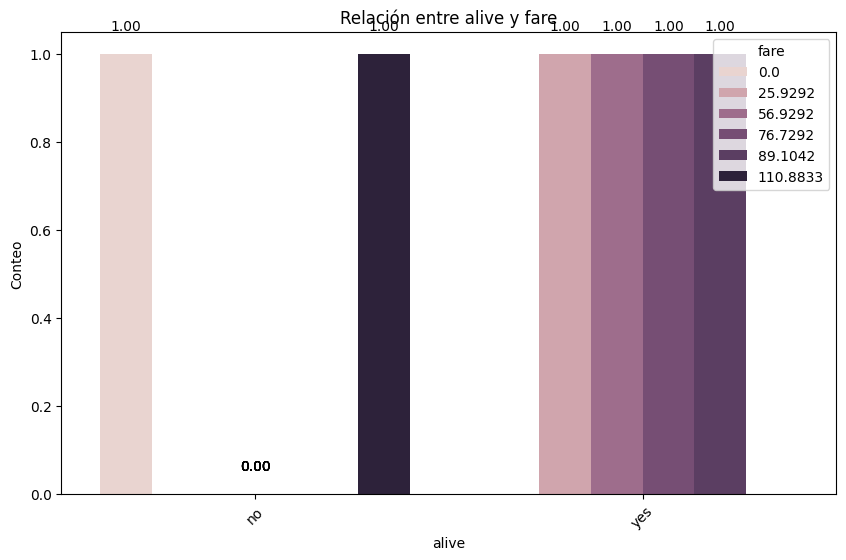

Respuesta 29.0:


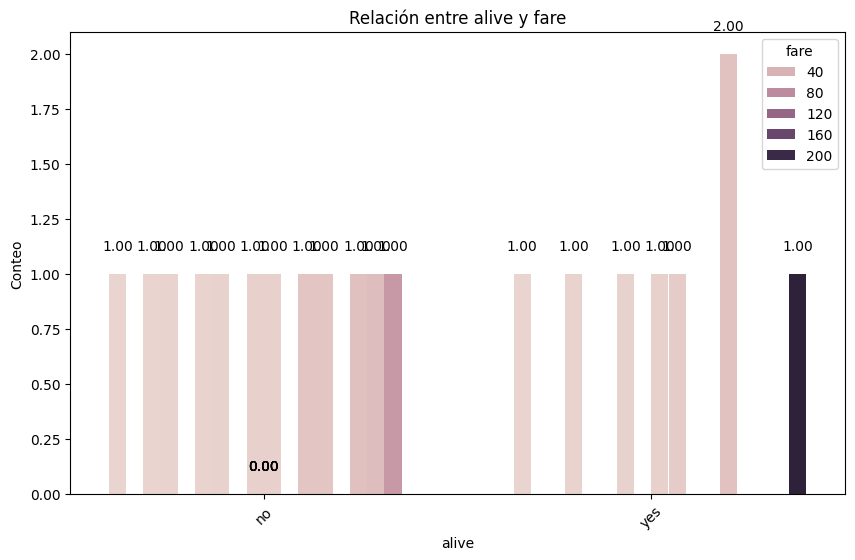

Respuesta 65.0:


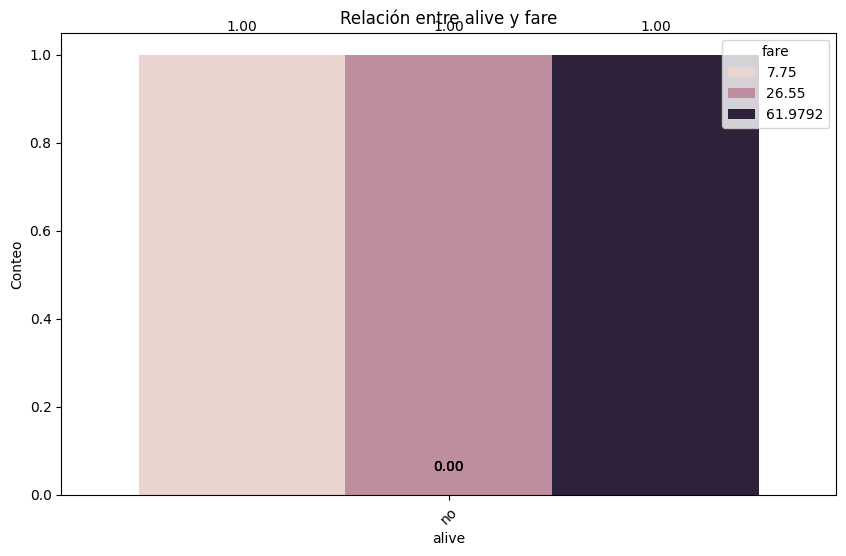

Respuesta 28.5:


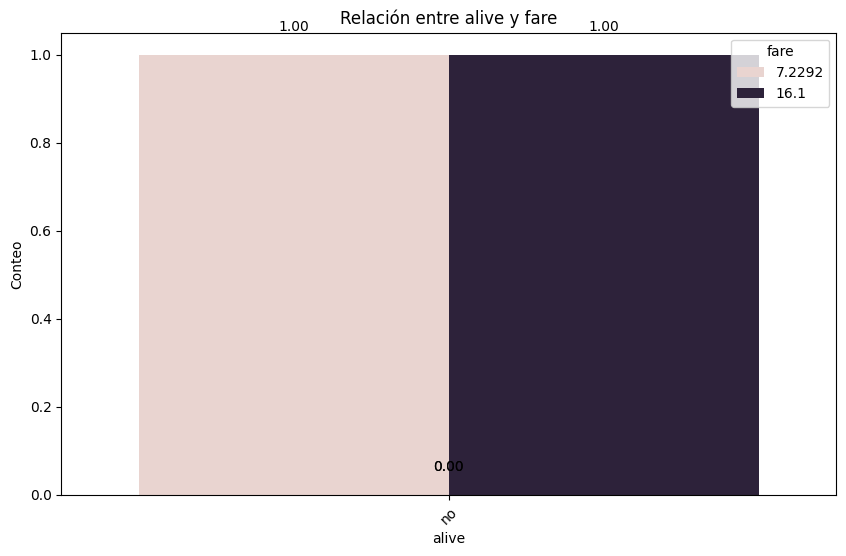

Respuesta 5.0:


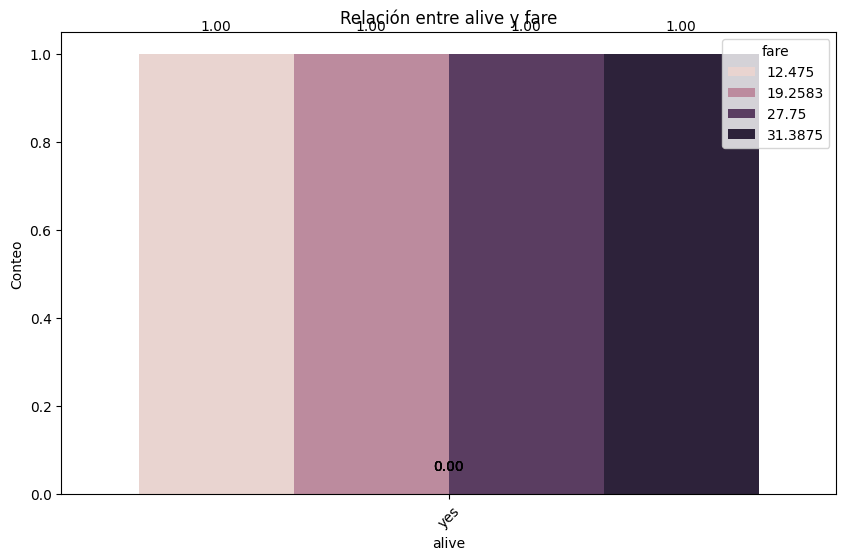

Respuesta 11.0:


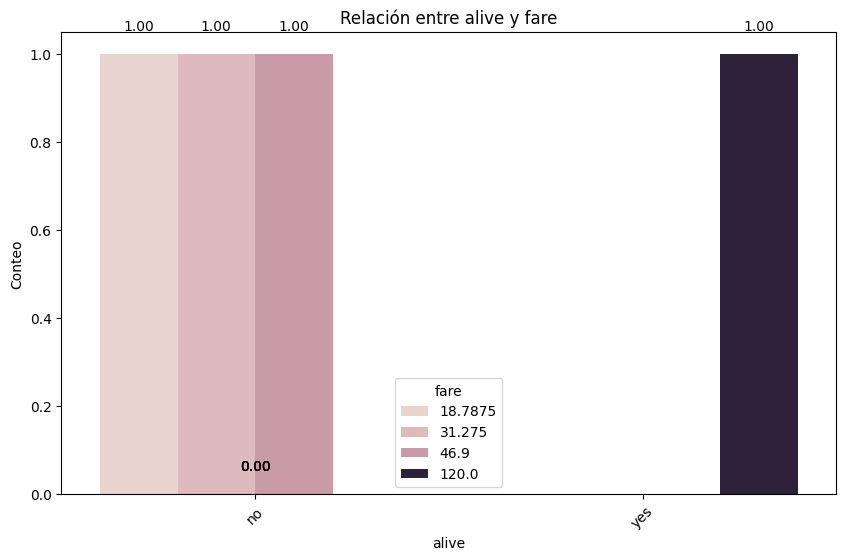

Respuesta 45.0:


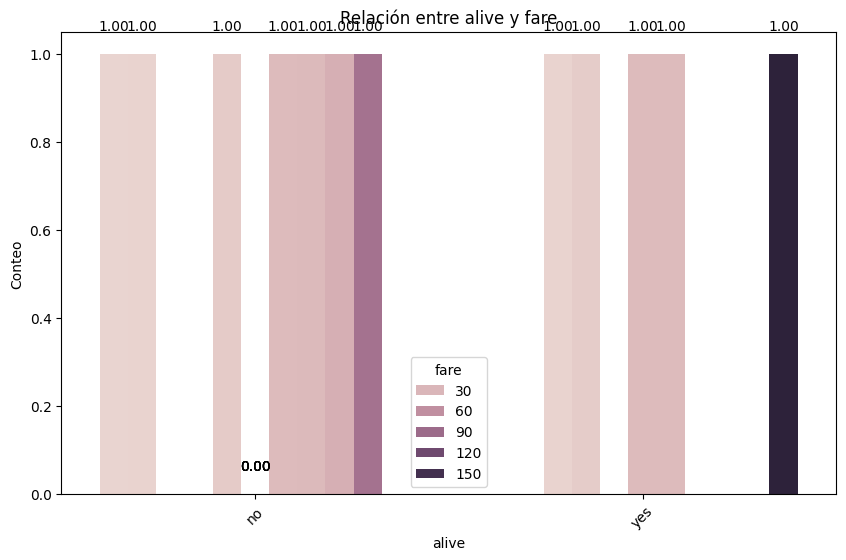

Respuesta 17.0:


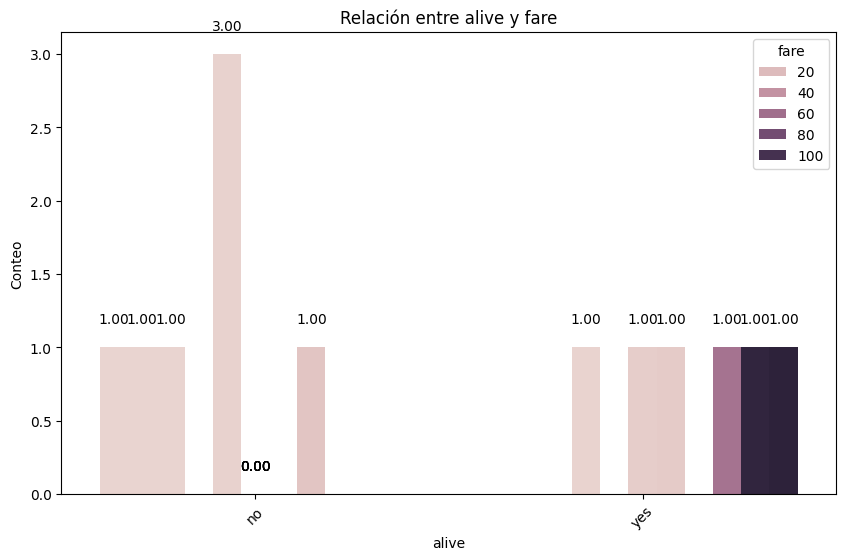

Respuesta 16.0:


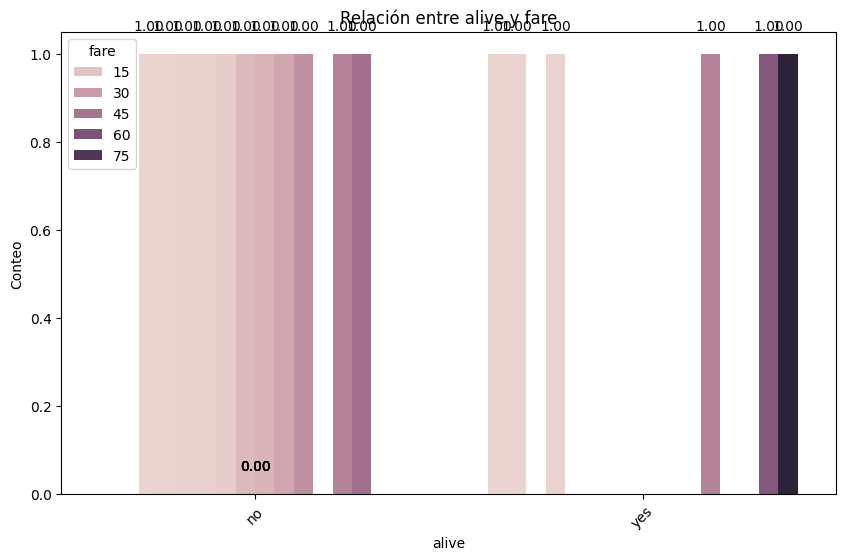

Respuesta 25.0:


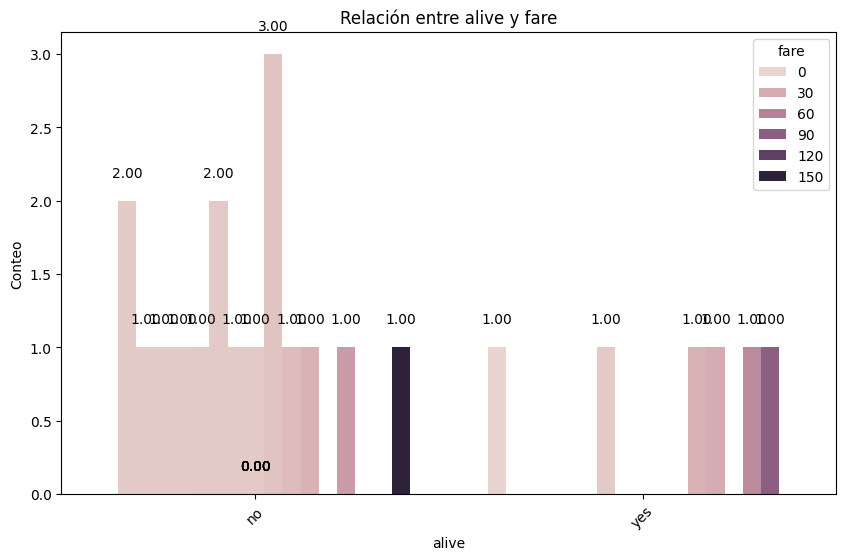

Respuesta 0.83:


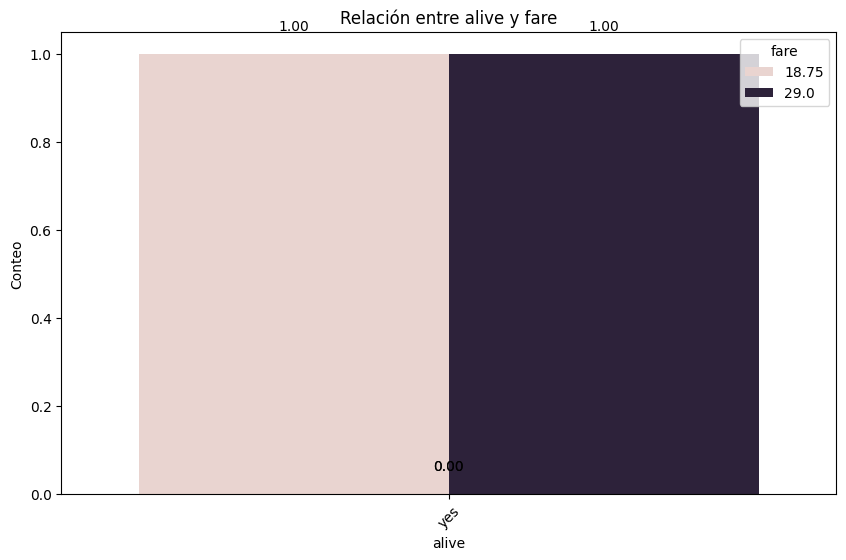

Respuesta 30.0:


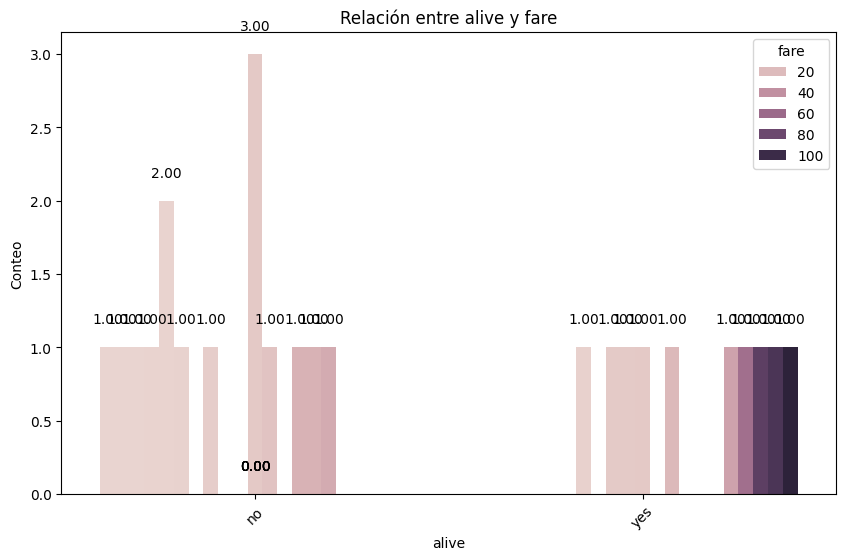

Respuesta 33.0:


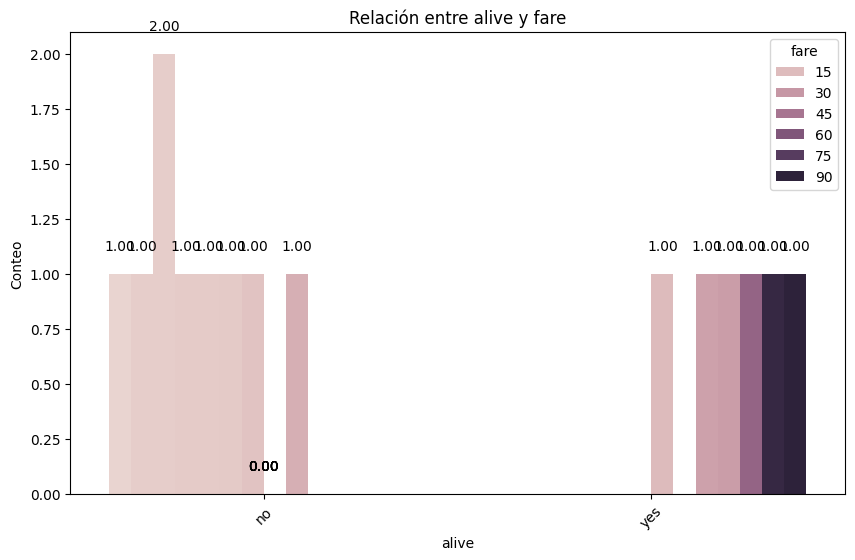

Respuesta 23.0:


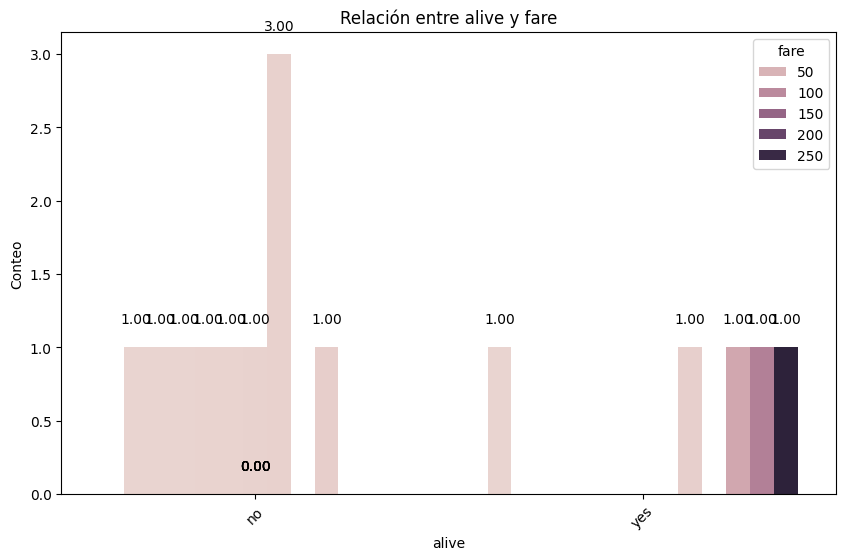

Respuesta 24.0:


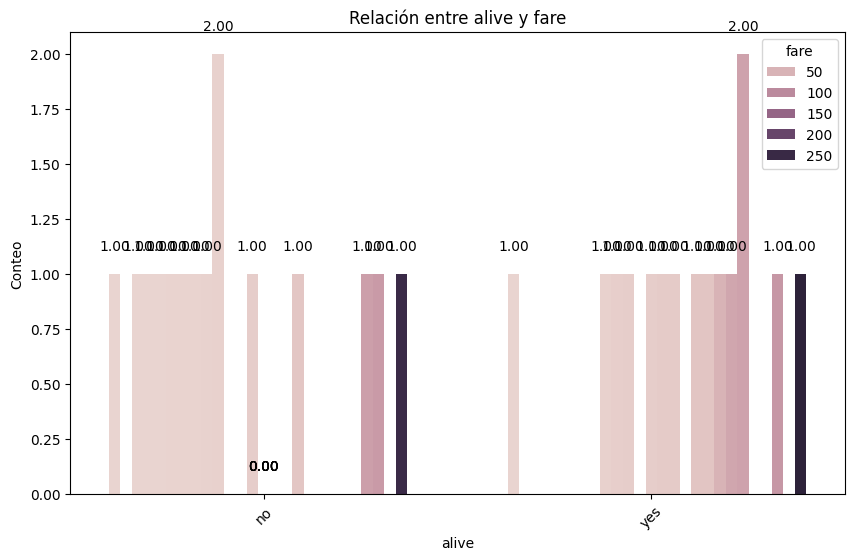

Respuesta 46.0:


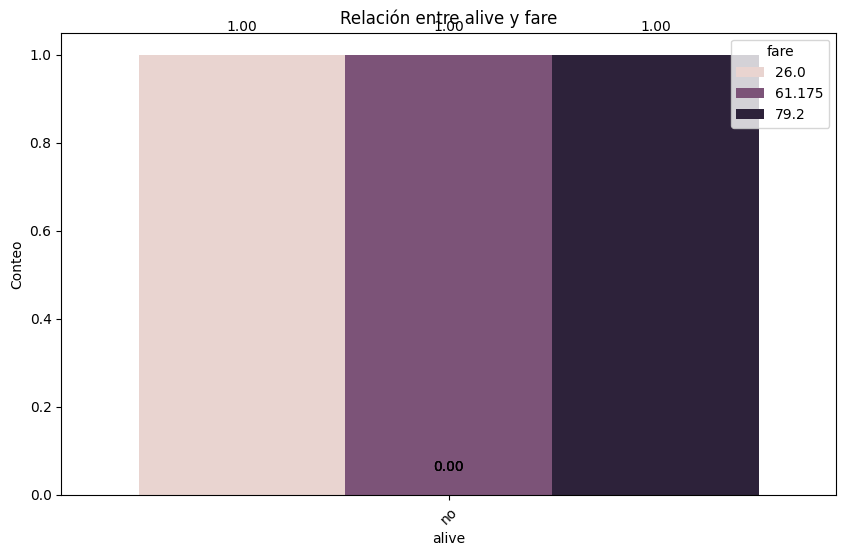

Respuesta 59.0:


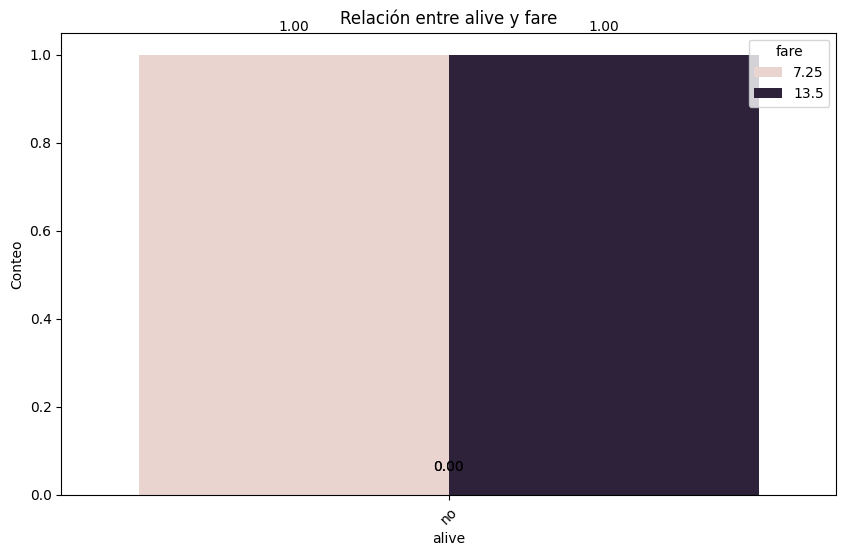

Respuesta 71.0:


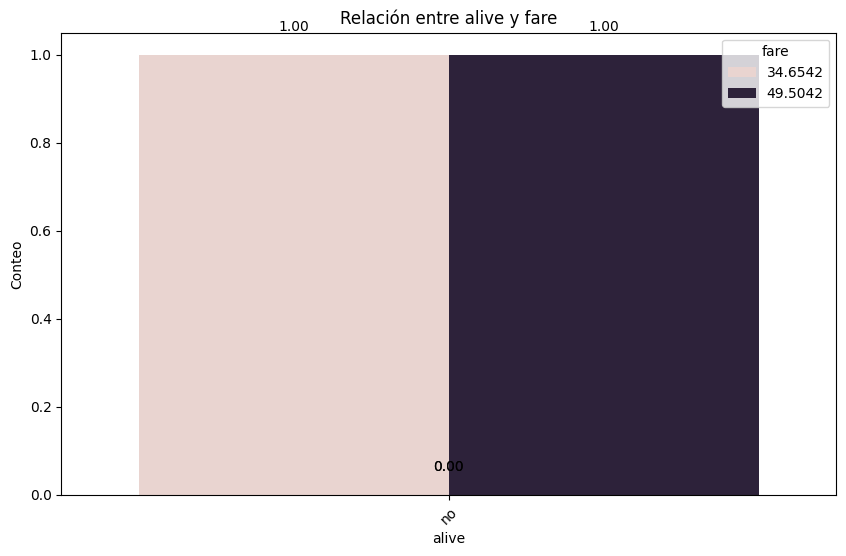

Respuesta 37.0:


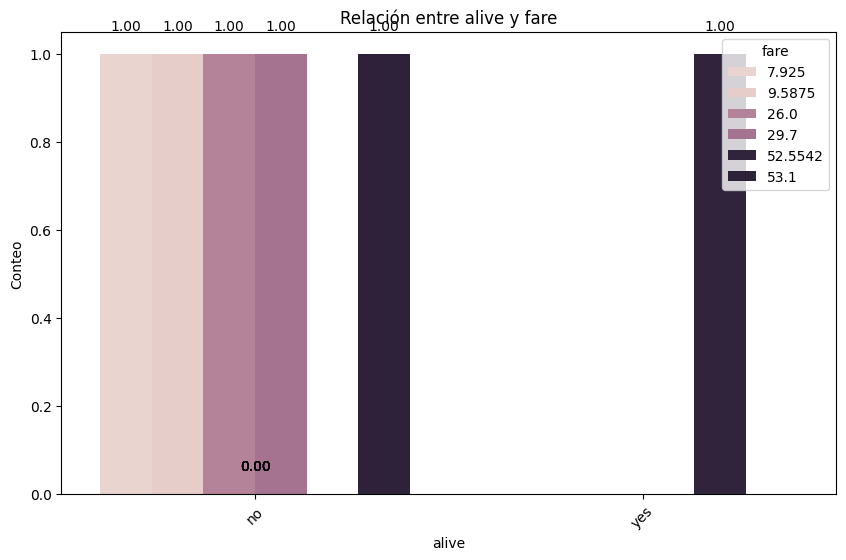

Respuesta 47.0:


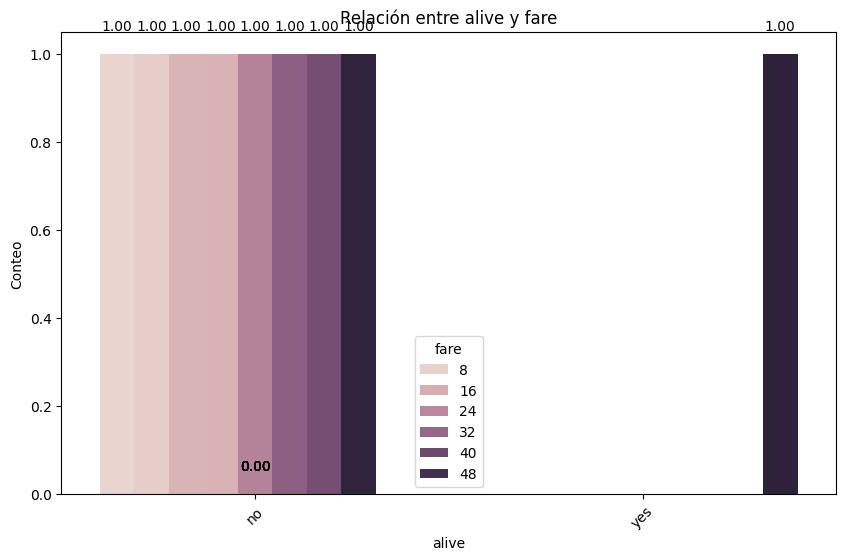

Respuesta 14.5:


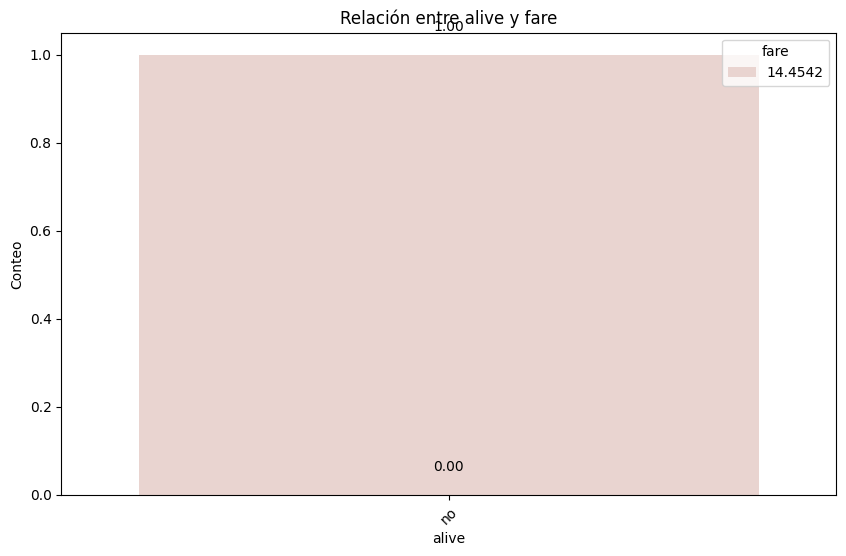

Respuesta 70.5:


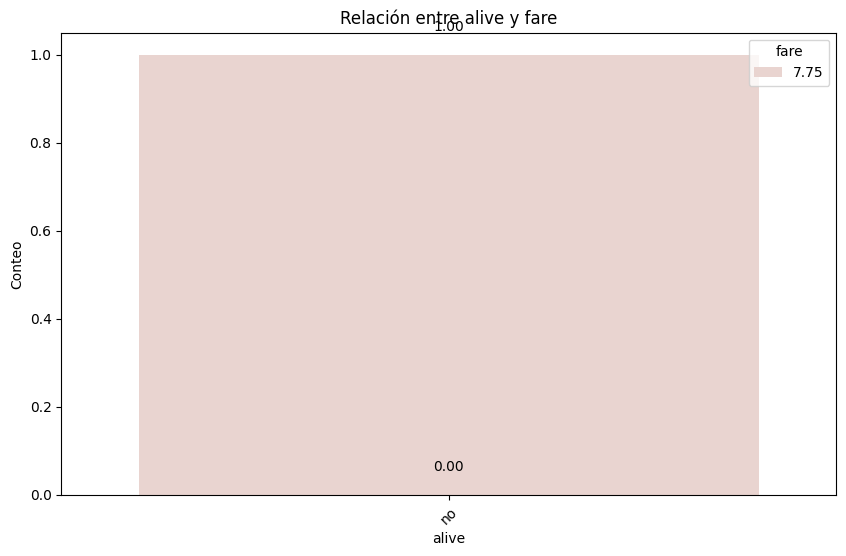

Respuesta 32.5:


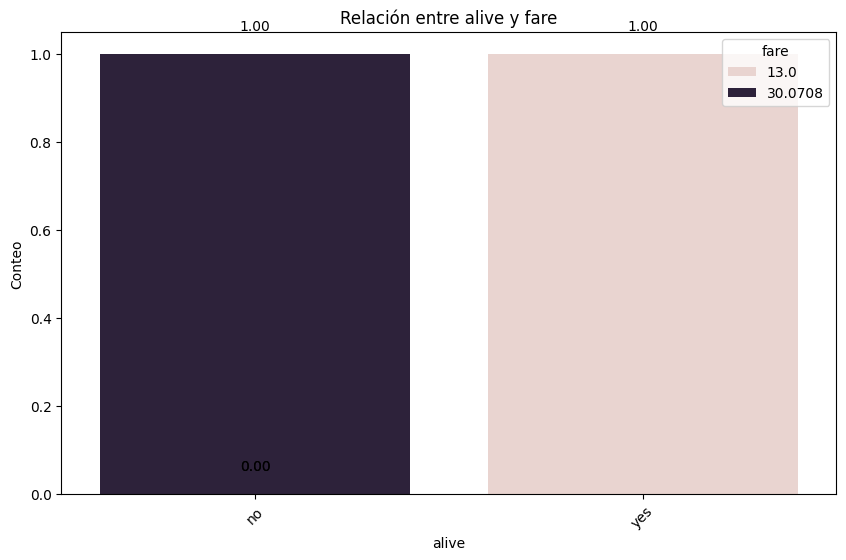

Respuesta 12.0:


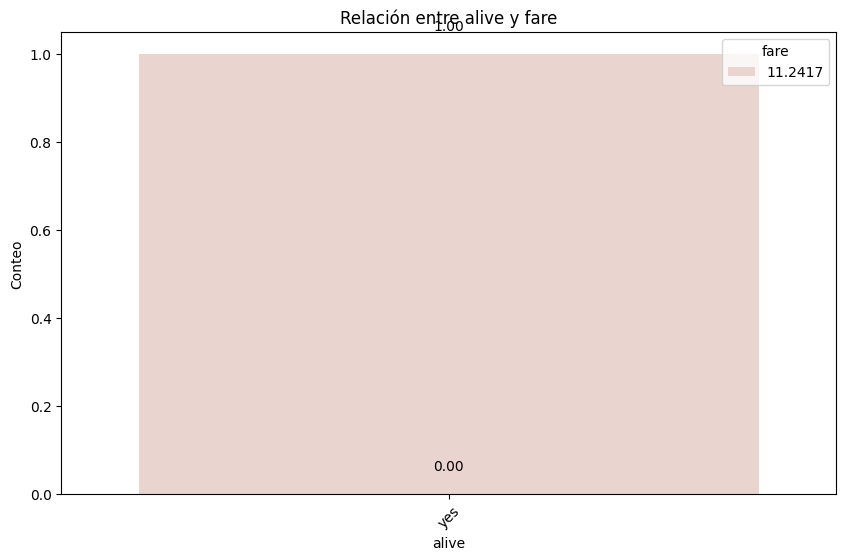

Respuesta 9.0:


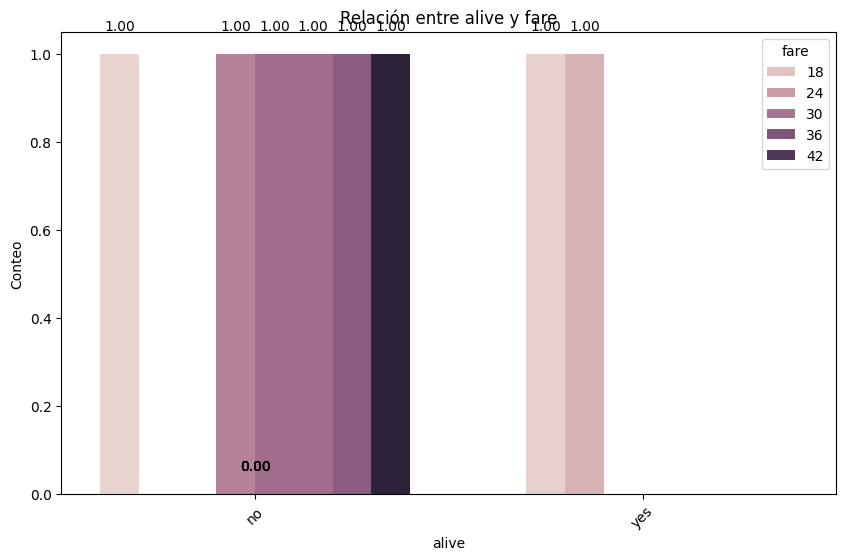

Respuesta 36.5:


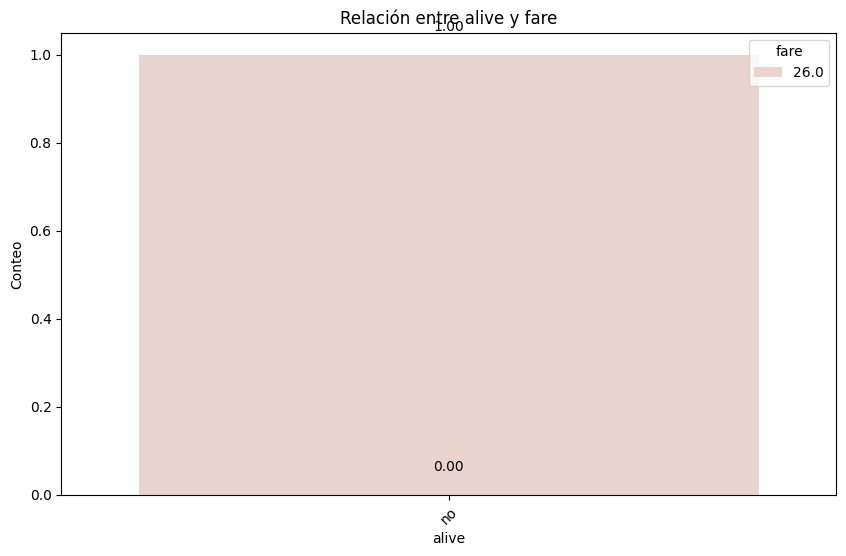

Respuesta 51.0:


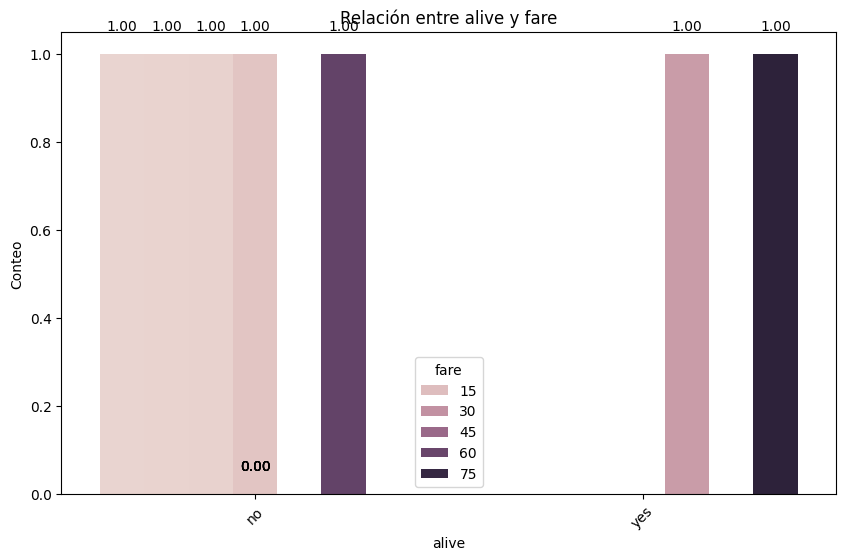

Respuesta 55.5:


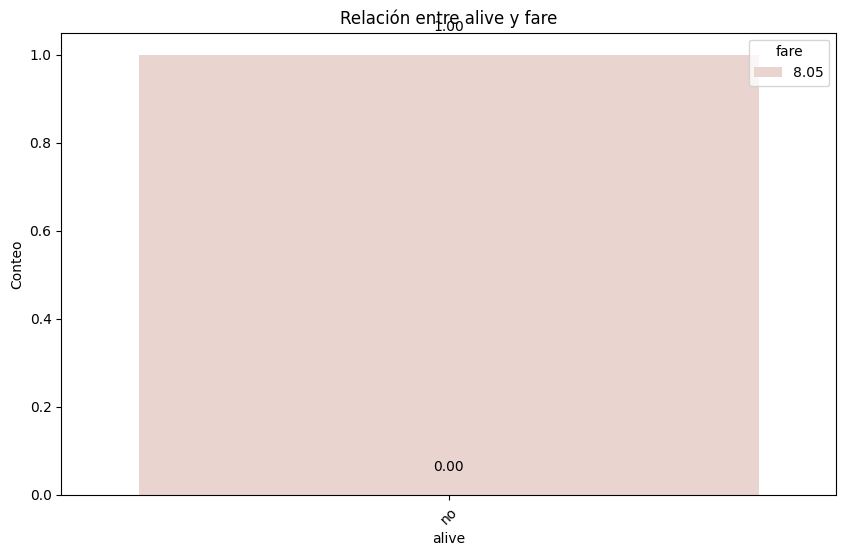

Respuesta 40.5:


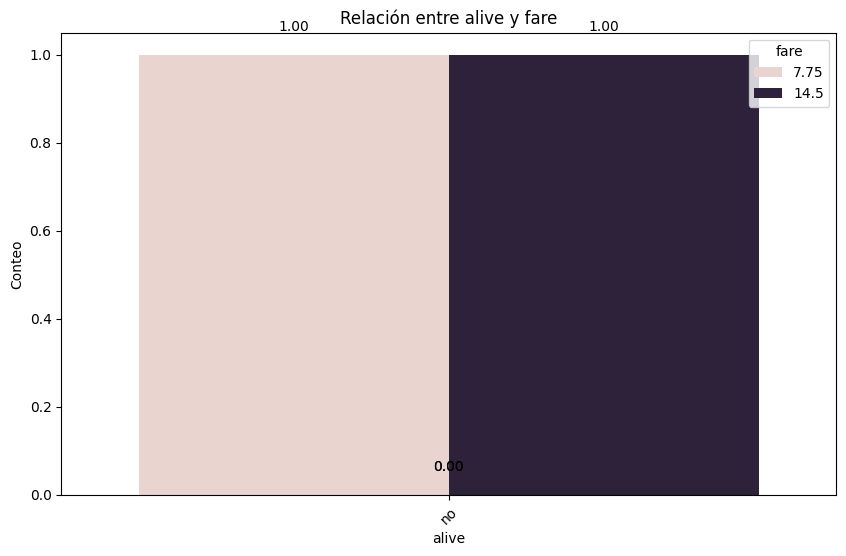

Respuesta 44.0:


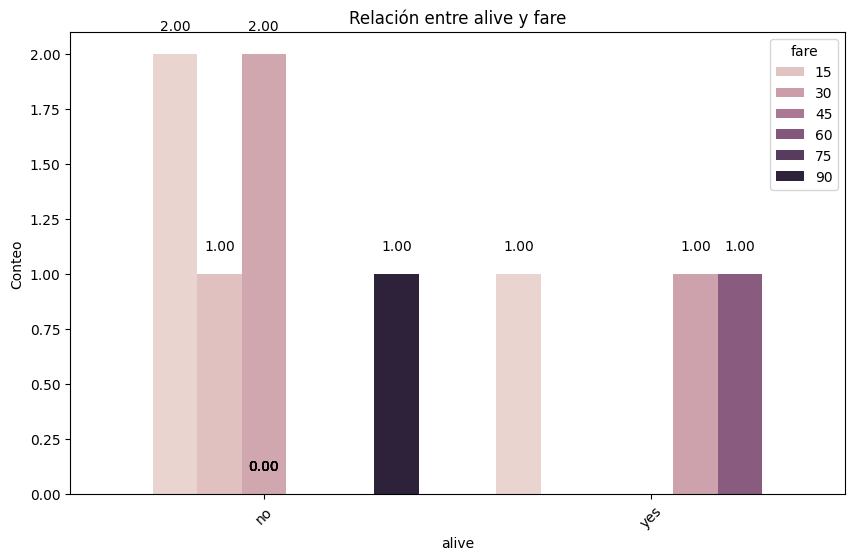

Respuesta 1.0:


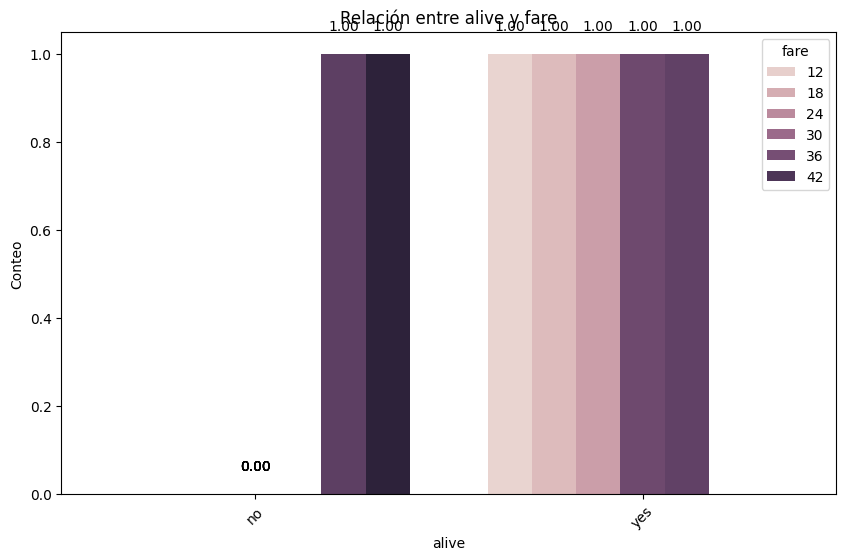

Respuesta 61.0:


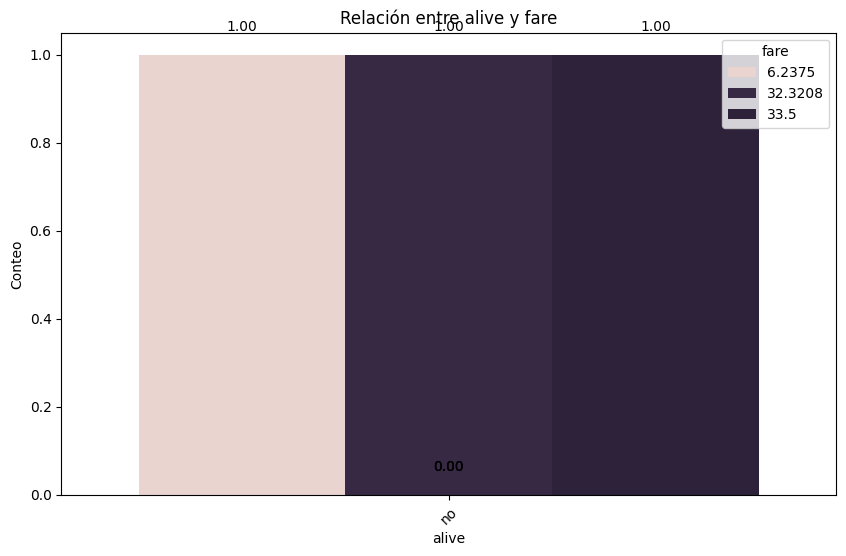

Respuesta 56.0:


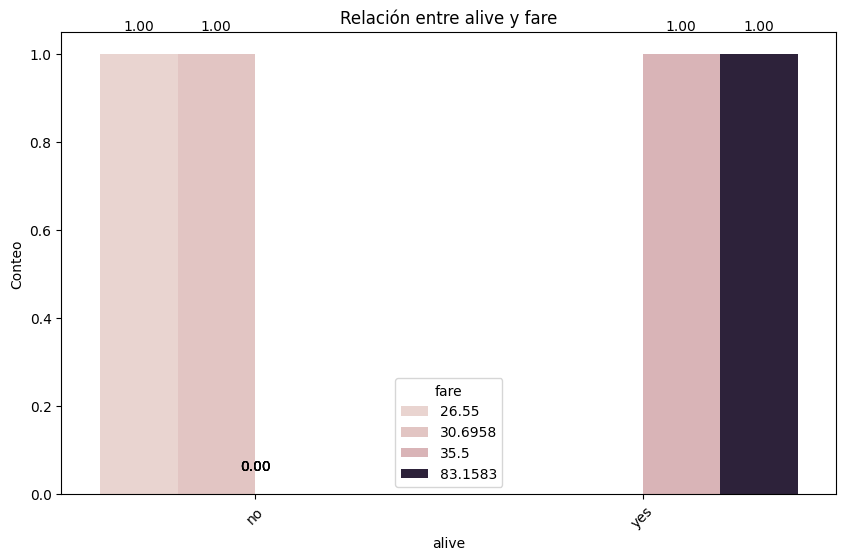

Respuesta 50.0:


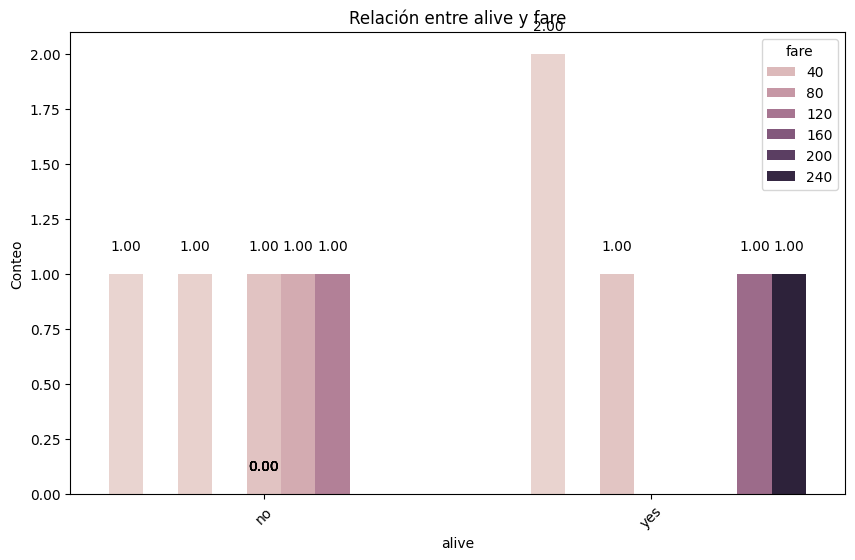

Respuesta 36.0:


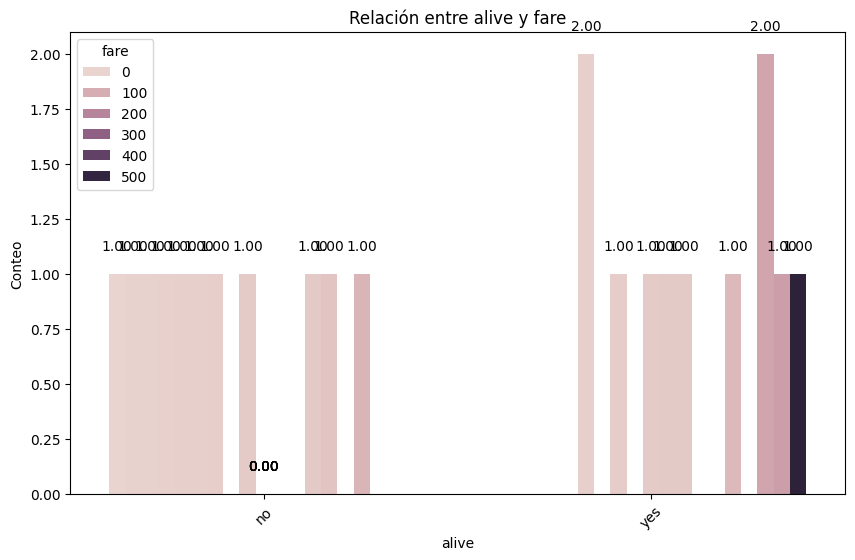

Respuesta 45.5:


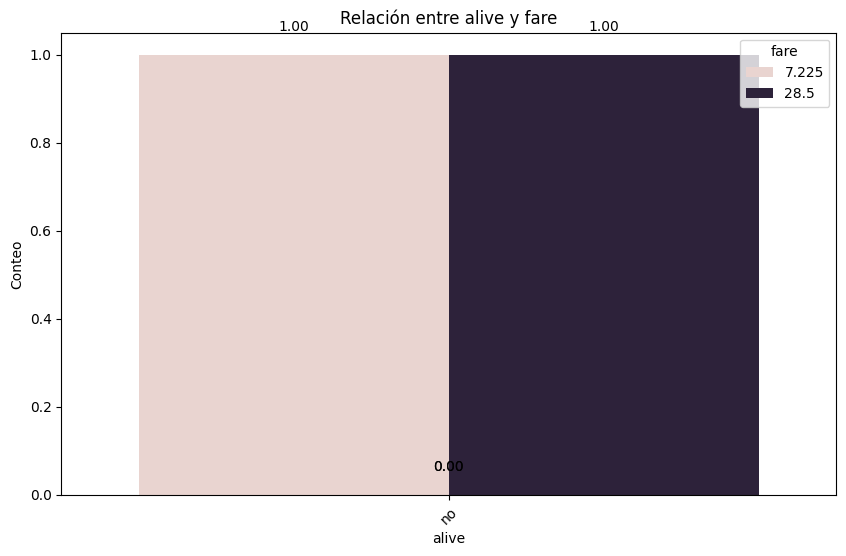

Respuesta 20.5:


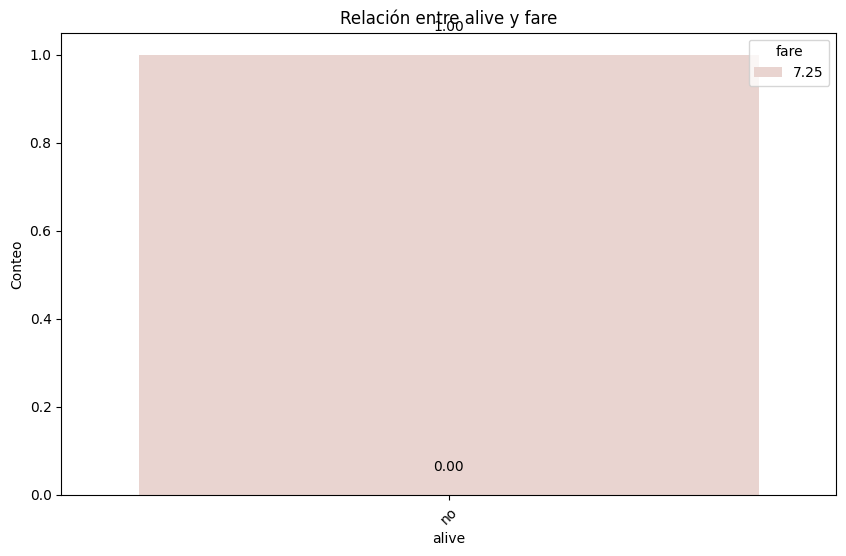

Respuesta 62.0:


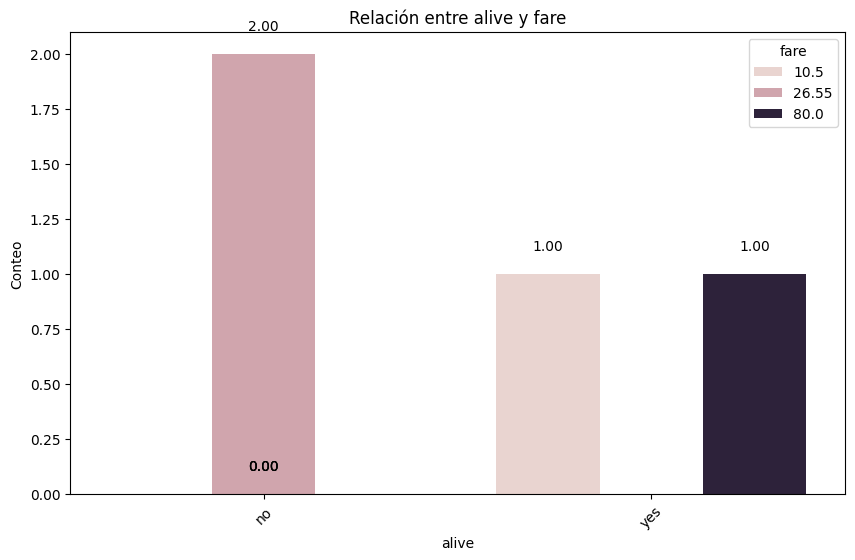

Respuesta 41.0:


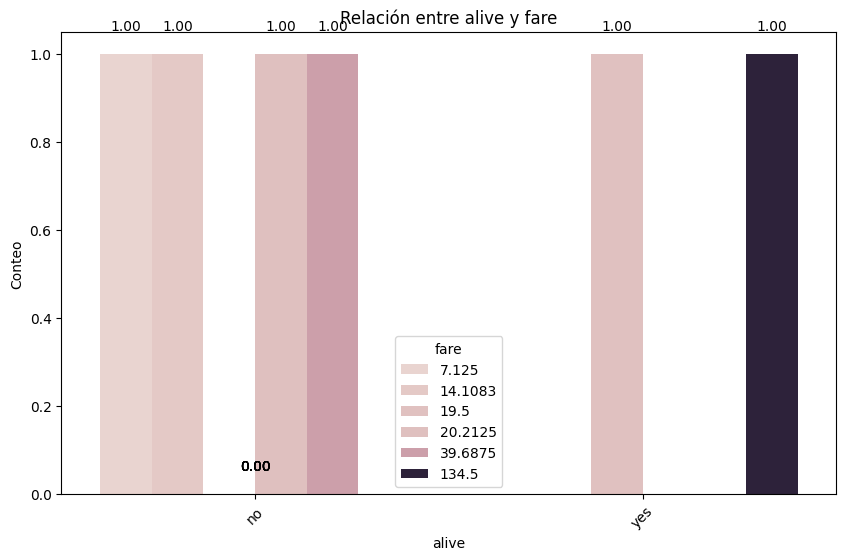

Respuesta 52.0:


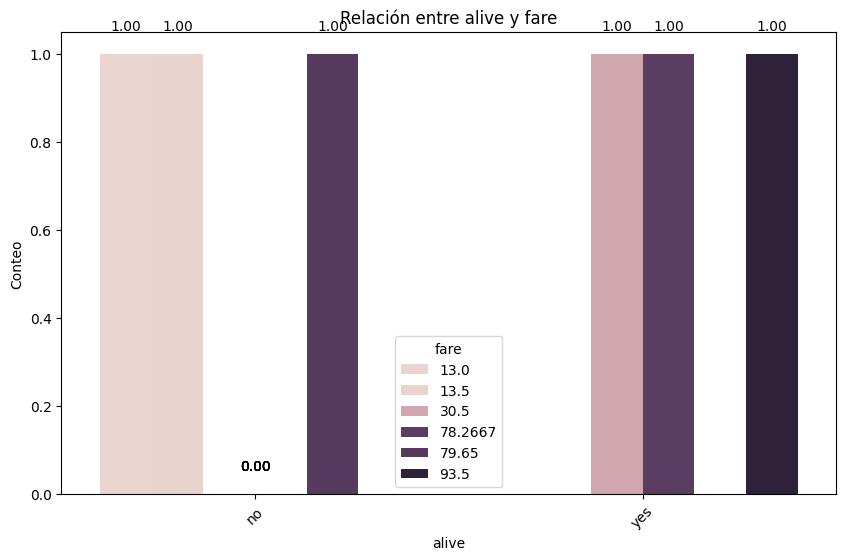

Respuesta 63.0:


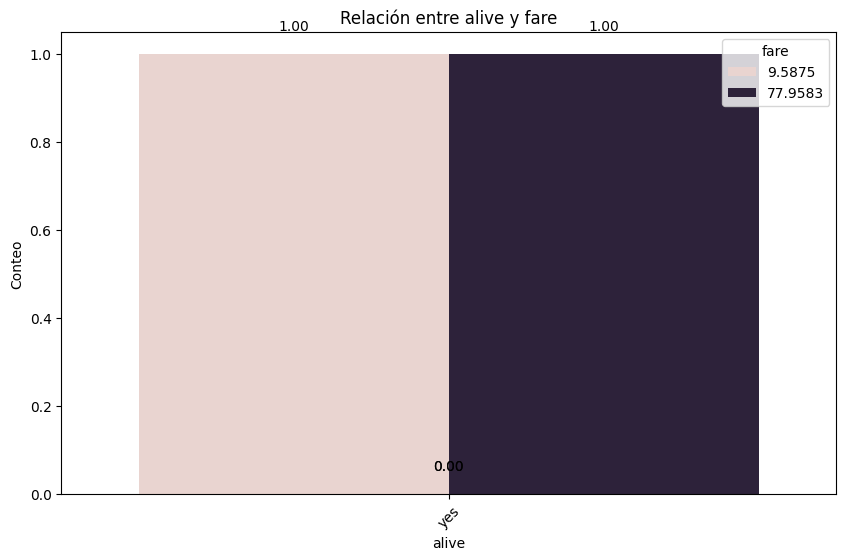

Respuesta 23.5:


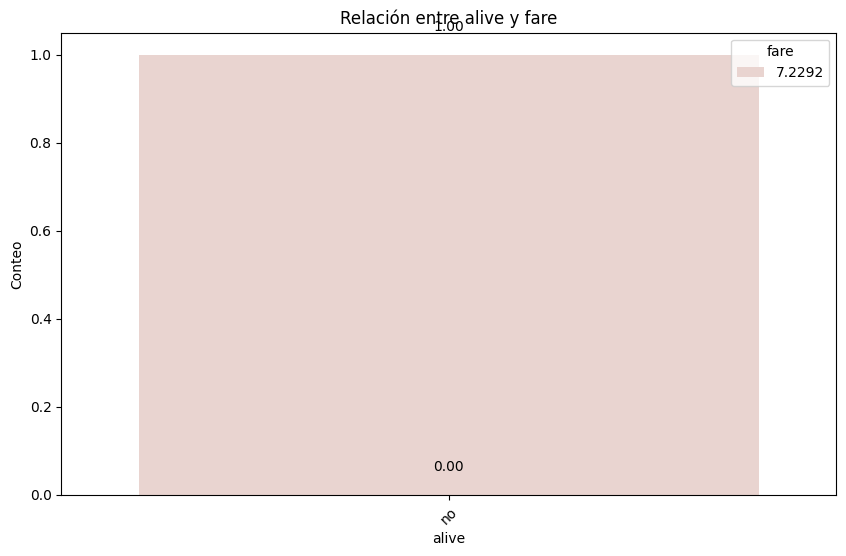

Respuesta 0.92:


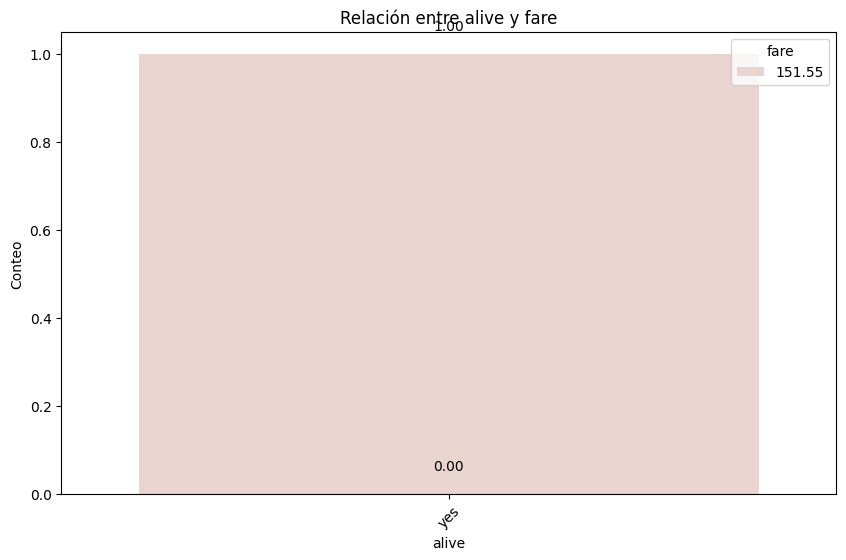

Respuesta 43.0:


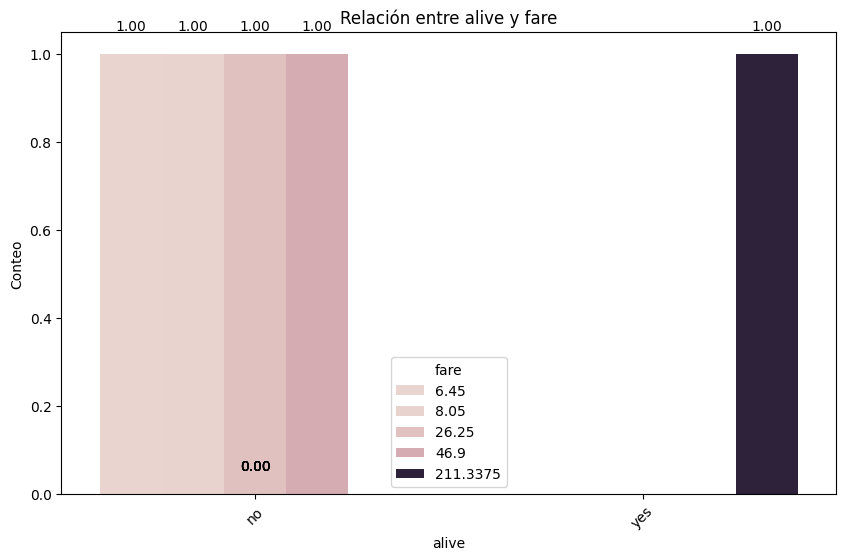

Respuesta 60.0:


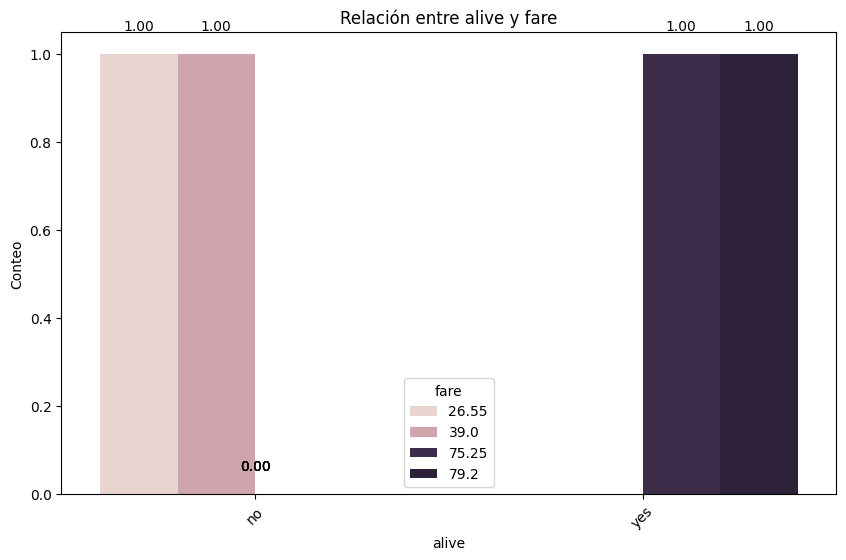

Respuesta 10.0:


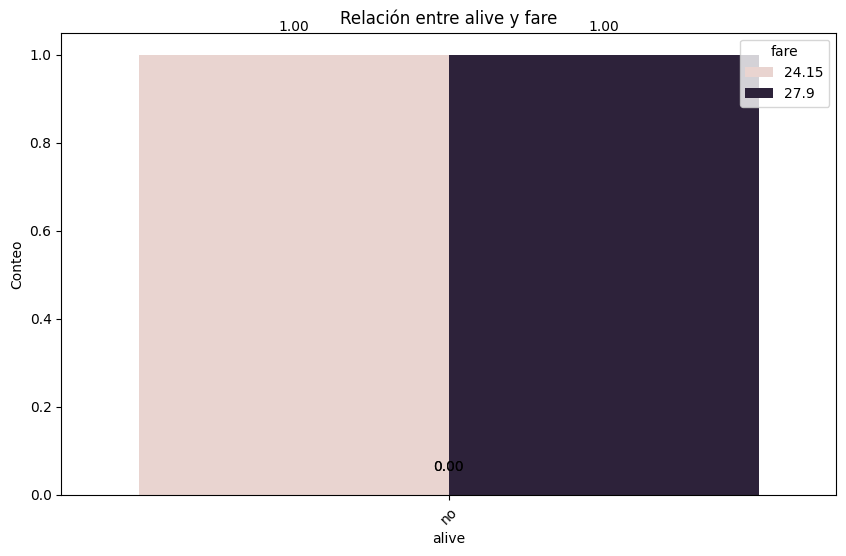

Respuesta 64.0:


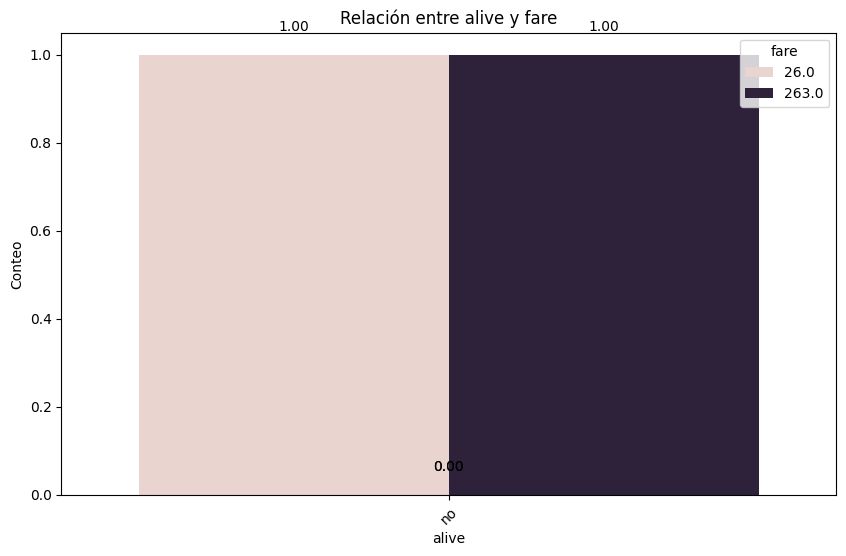

Respuesta 13.0:


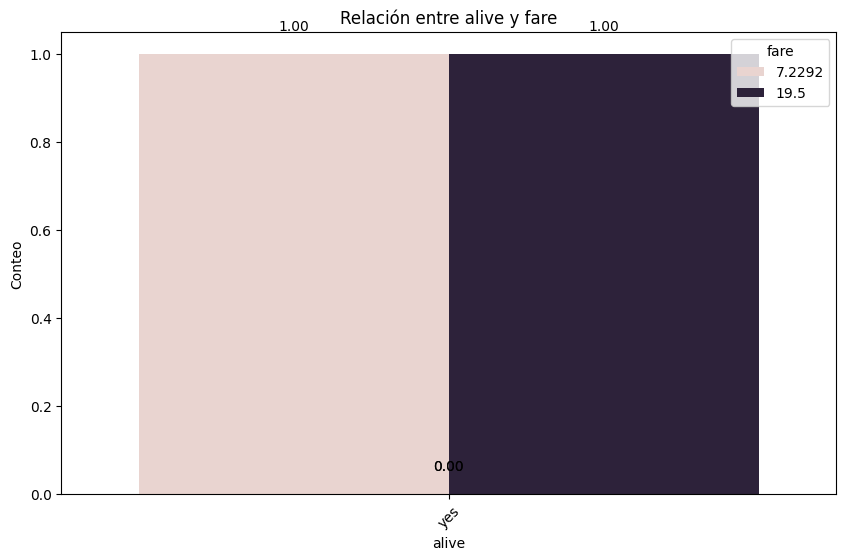

Respuesta 48.0:


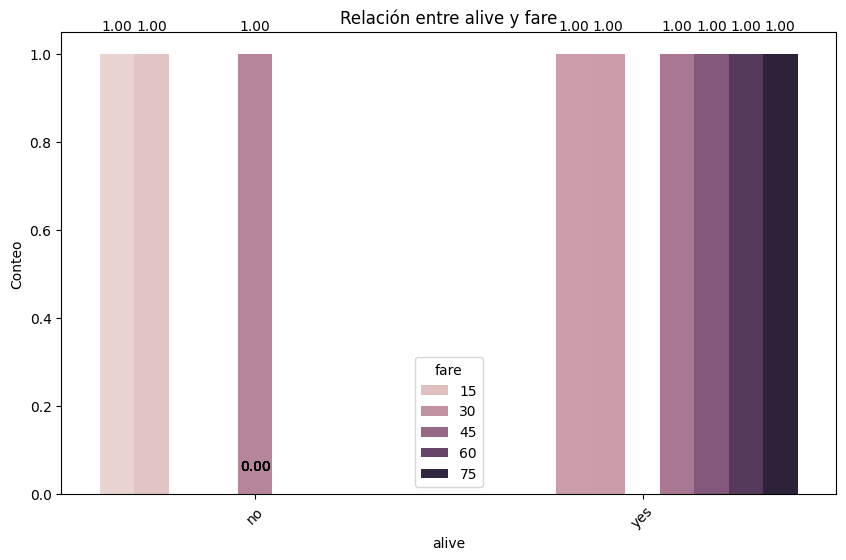

Respuesta 0.75:


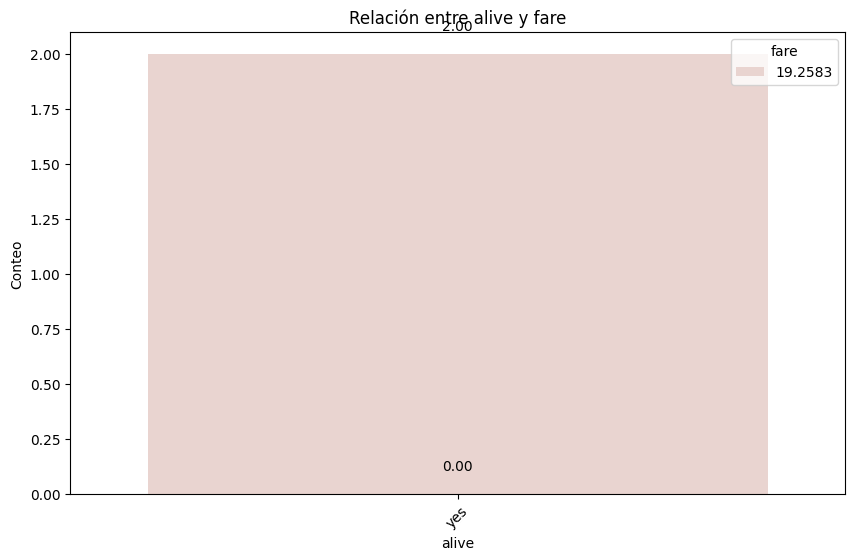

Respuesta 53.0:


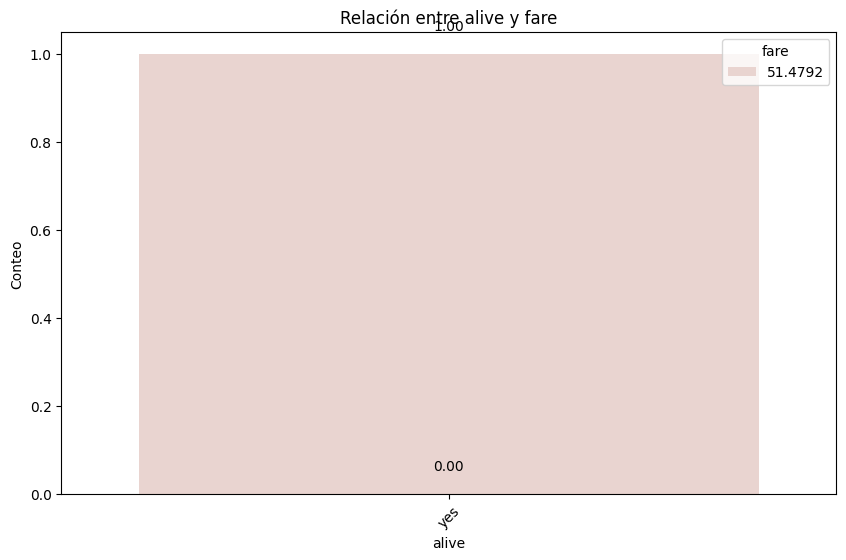

Respuesta 57.0:


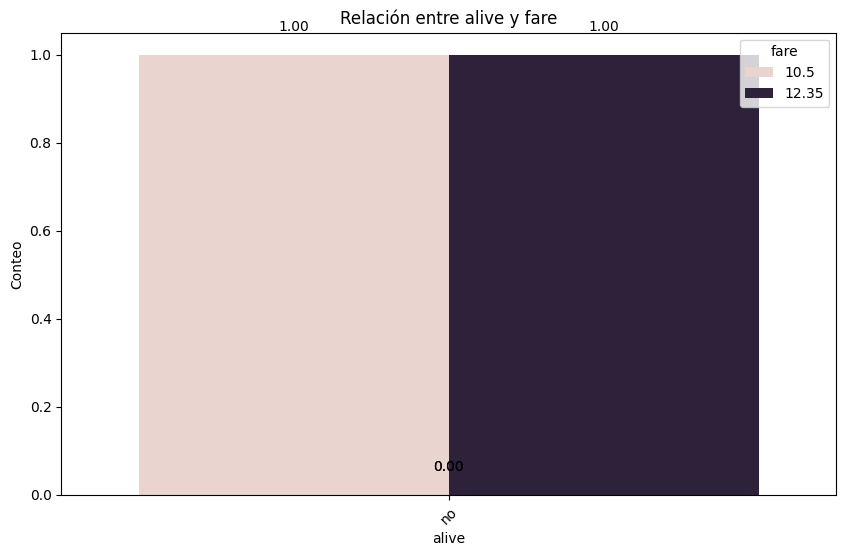

Respuesta 80.0:


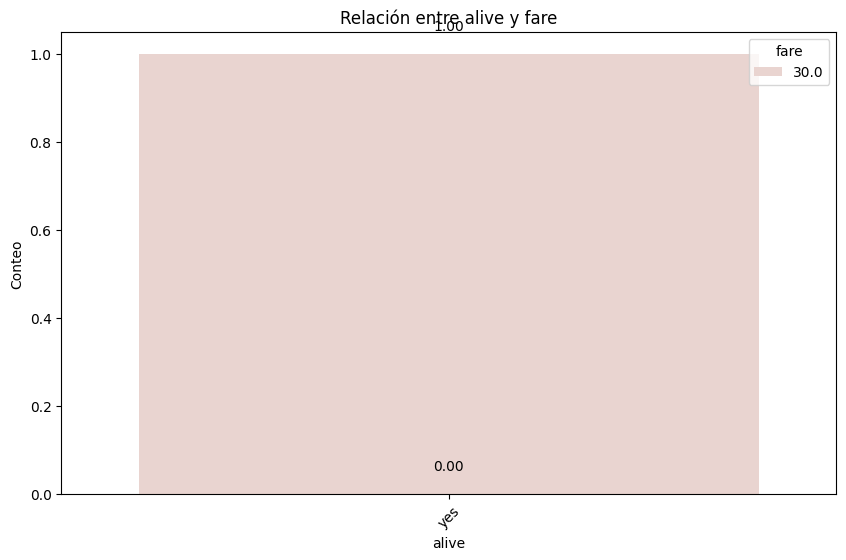

Respuesta 70.0:


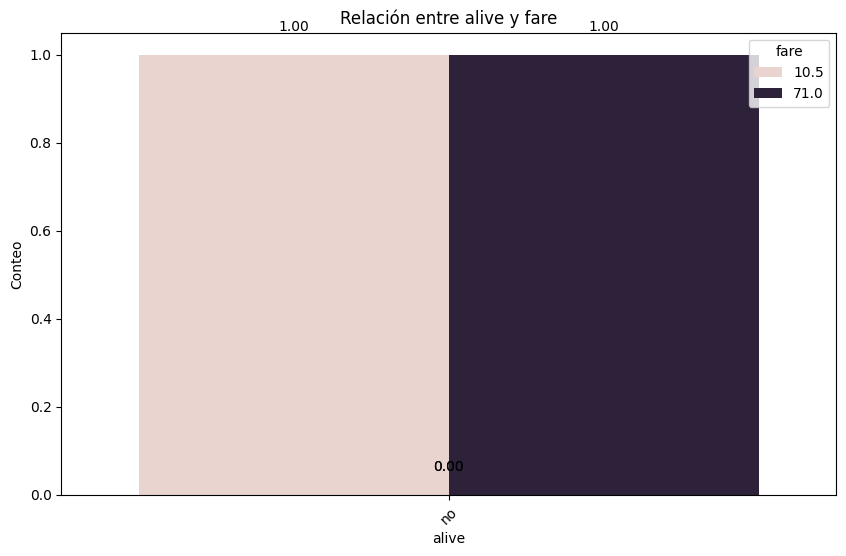

Respuesta 24.5:


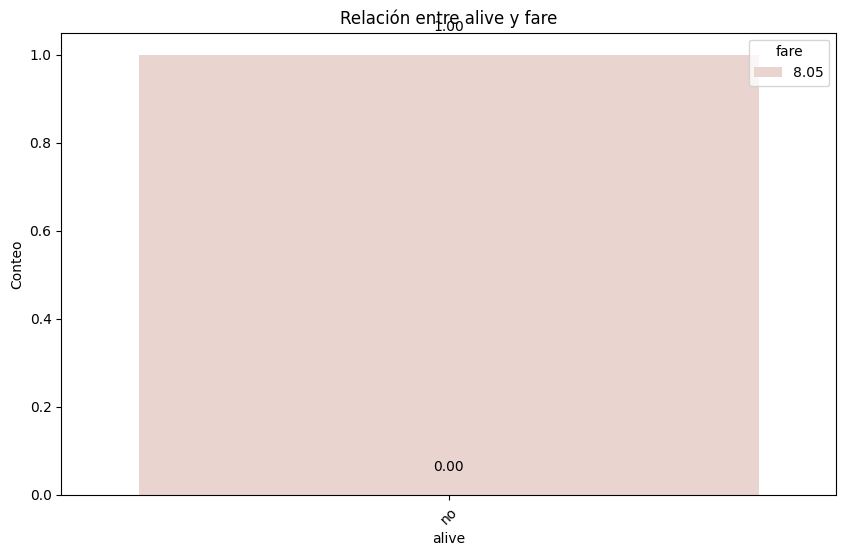

Respuesta 6.0:


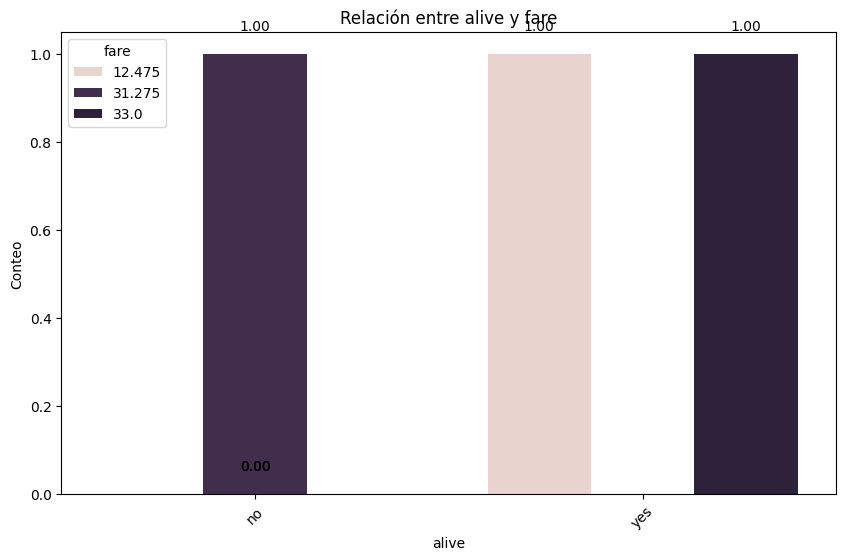

Respuesta 0.67:


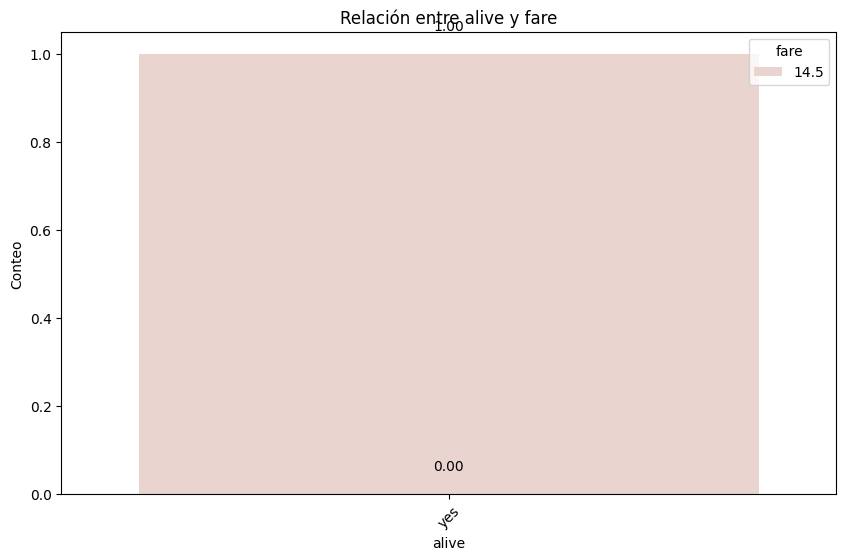

Respuesta 30.5:


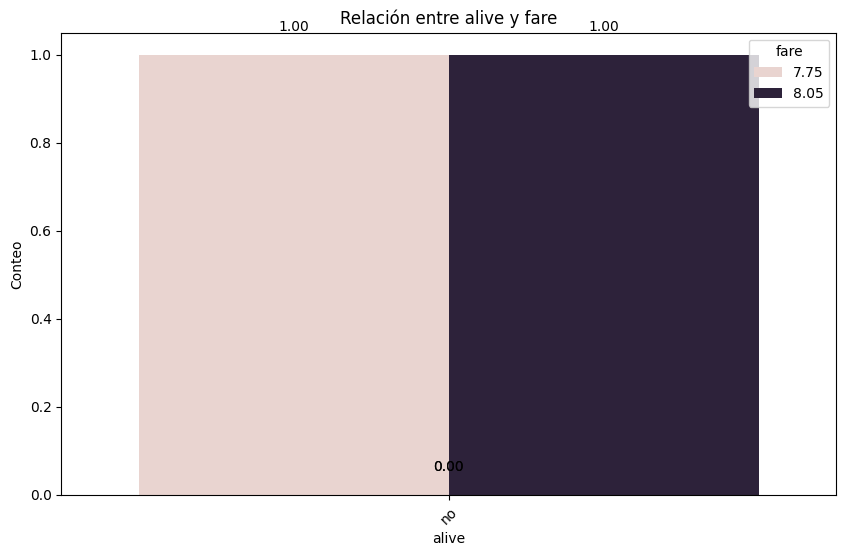

Respuesta 0.42:


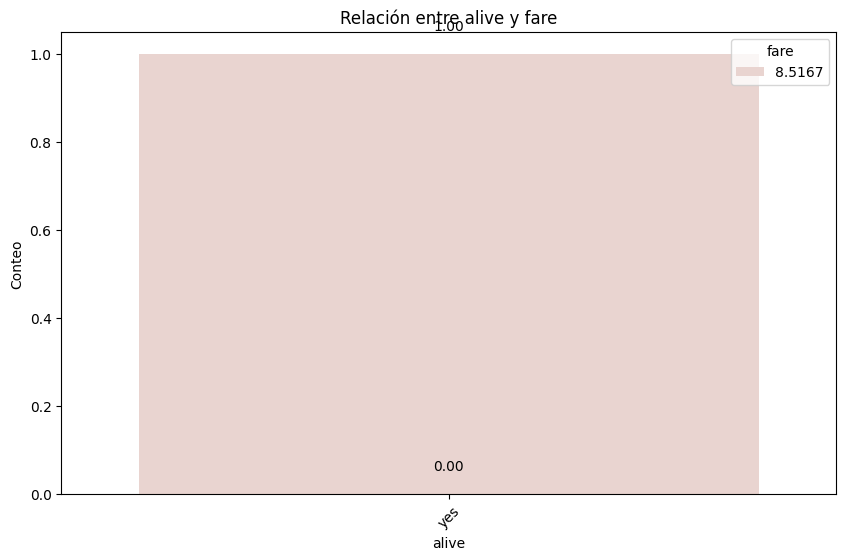

Respuesta 34.5:


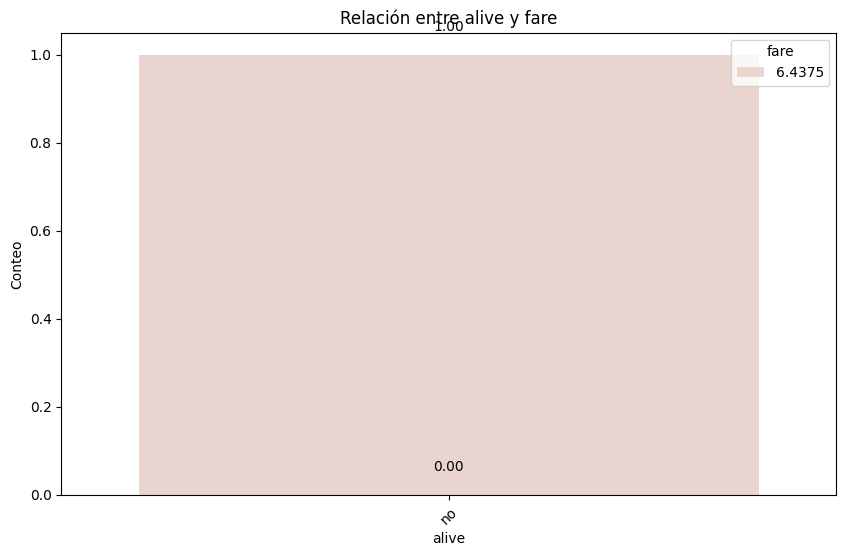

Respuesta 74.0:


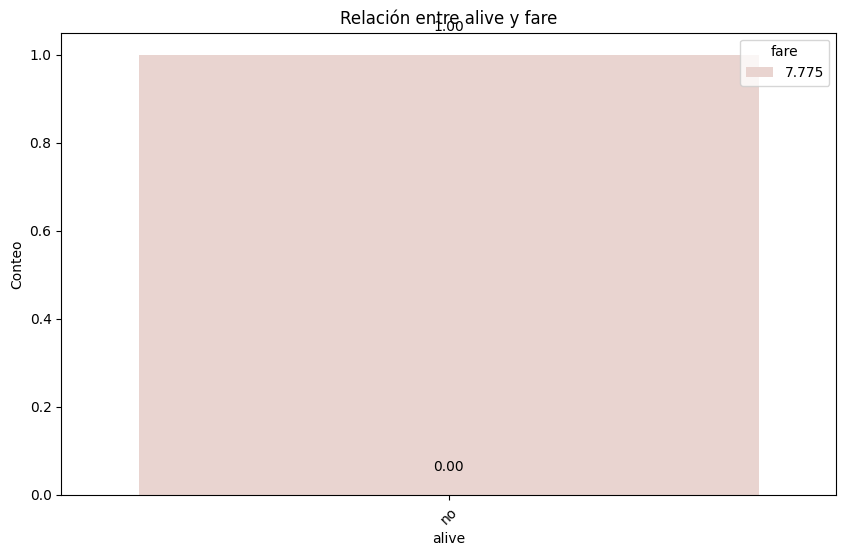

In [56]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bootcampviztools.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= False, show_values= True, size_group=20)


Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [23]:
df_viajes_junio = pd.read_csv("./data/dataset_viajes_jul23.csv")

In [24]:
df_viajes_junio.groupby(["aircompany"])["aircompany"].value_counts()

aircompany
Airnar        118
FlyQ          108
MoldaviAir    131
PamPangea     114
TabarAir      129
Name: count, dtype: int64

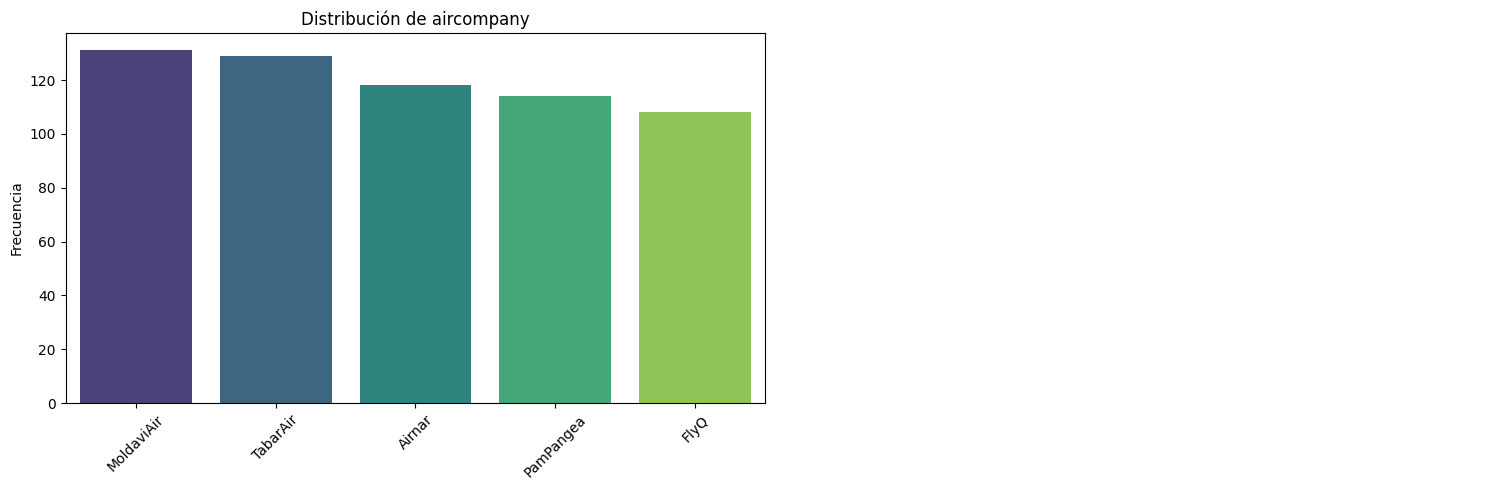

In [5]:
bootcampviztools.pinta_distribucion_categoricas(df_viajes_junio, ["aircompany"])

(2,)


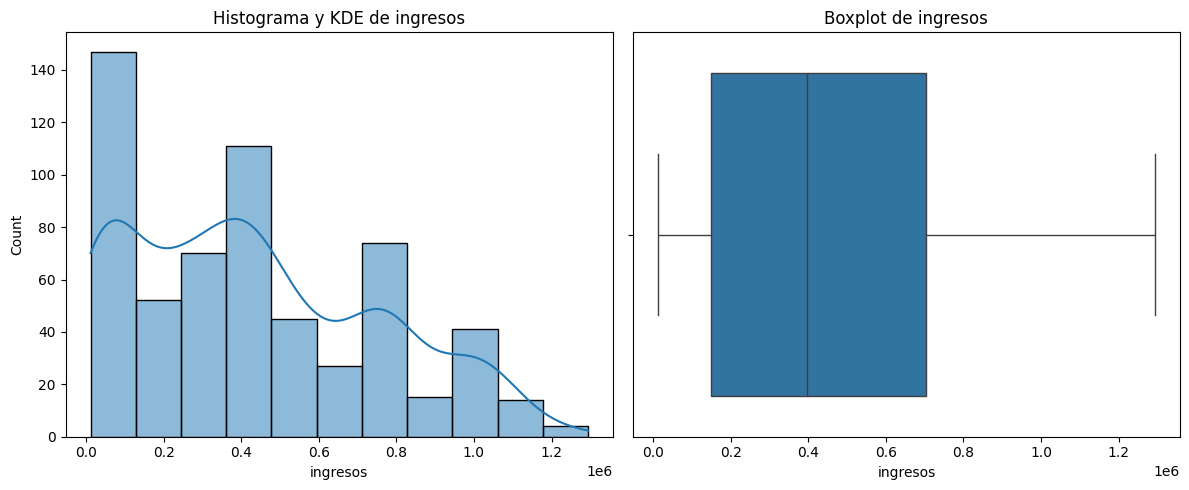

In [6]:
bootcampviztools.plot_combined_graphs(df_viajes_junio, ["ingresos"])

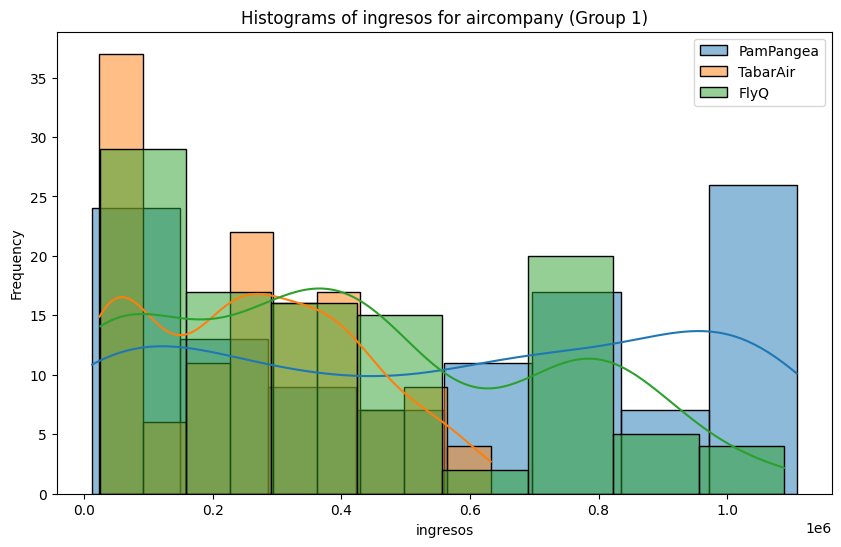

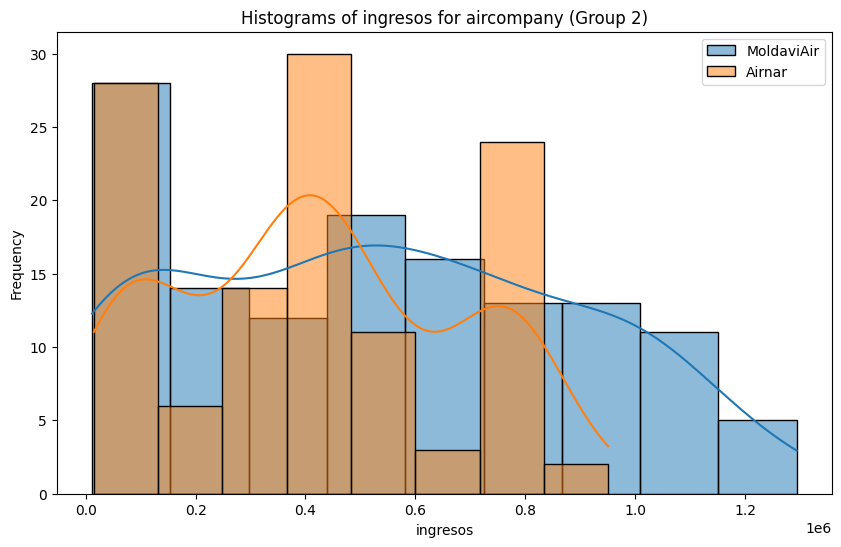

In [7]:
bootcampviztools.plot_grouped_histograms(df_viajes_junio, "aircompany","ingresos",group_size= 3)

Observamos que para la comparacion entre varias aerolineas, que tiene mayores ingresos que Tabair para vuelos con frecuencias mucho menores, en nuestro caso tenemos unas frecuencias altasa pero con unos ingresos bajos con respecto al resto que tiene el modelo contraio, menos frecuencia y mas ingresos

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


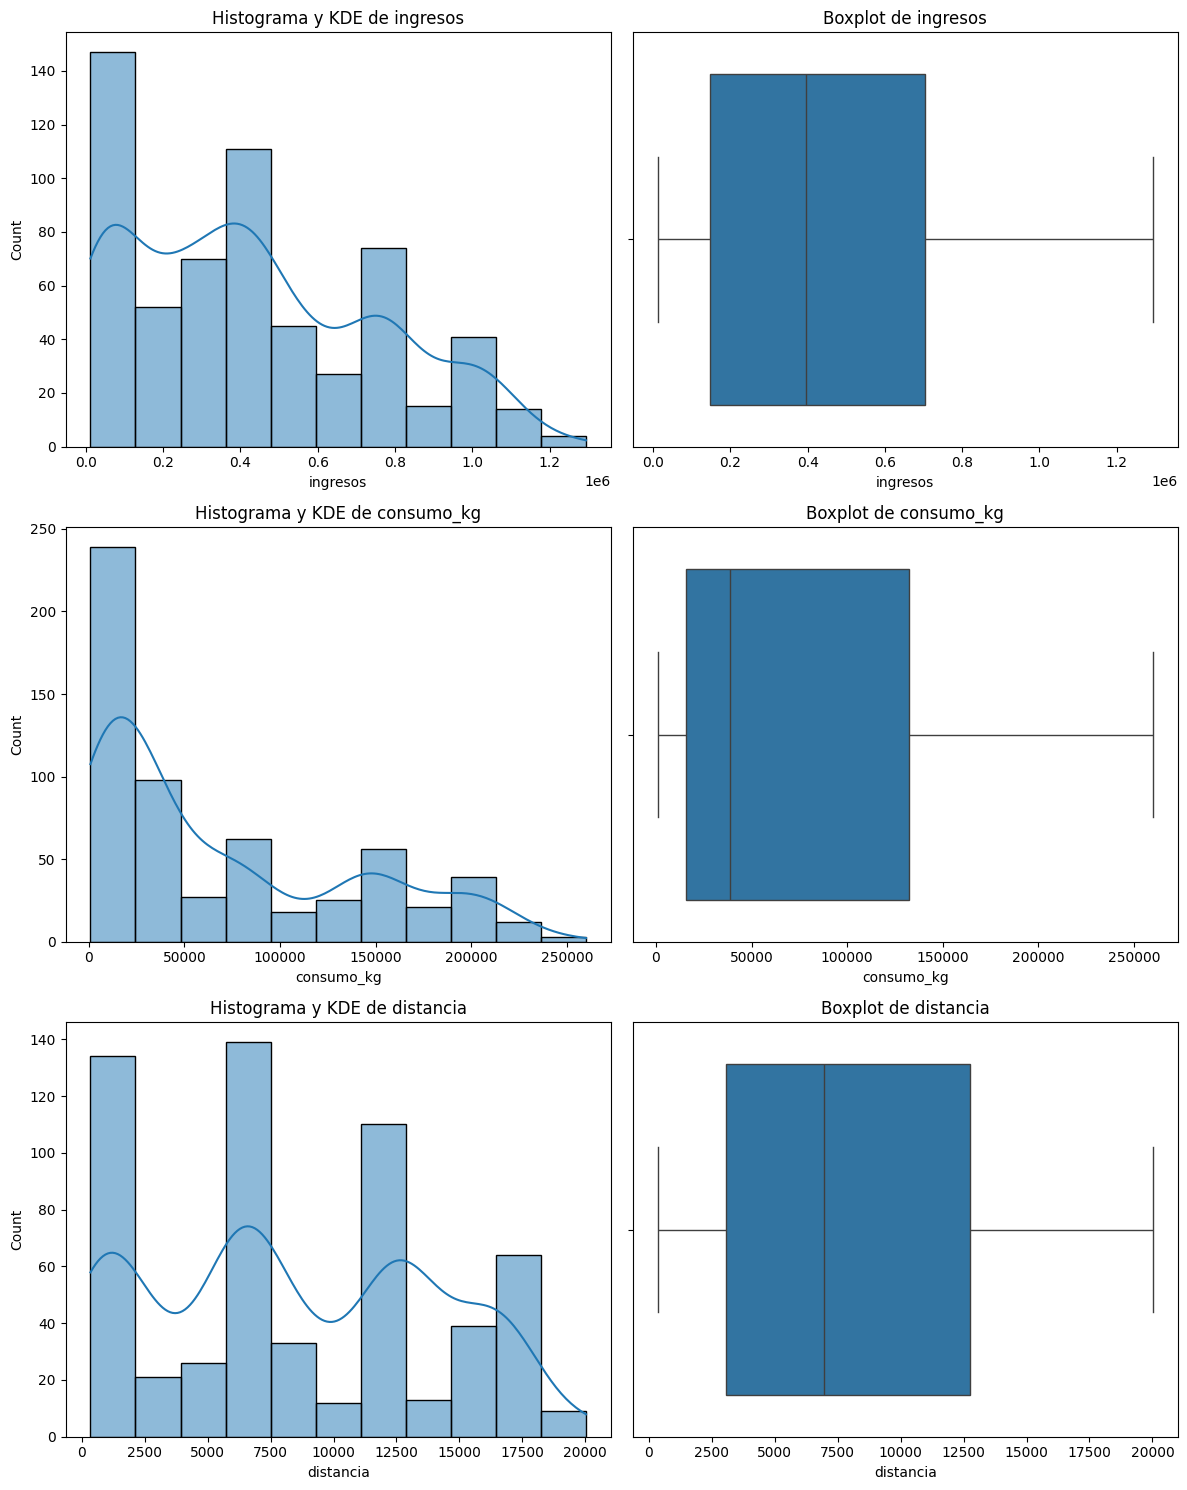

In [8]:
#Lo primero sería mostrar los valores y diagramas de cada uno así como las correlaciones dos a dos:
bootcampviztools.plot_combined_graphs(df_viajes_junio,["ingresos","consumo_kg","distancia"])

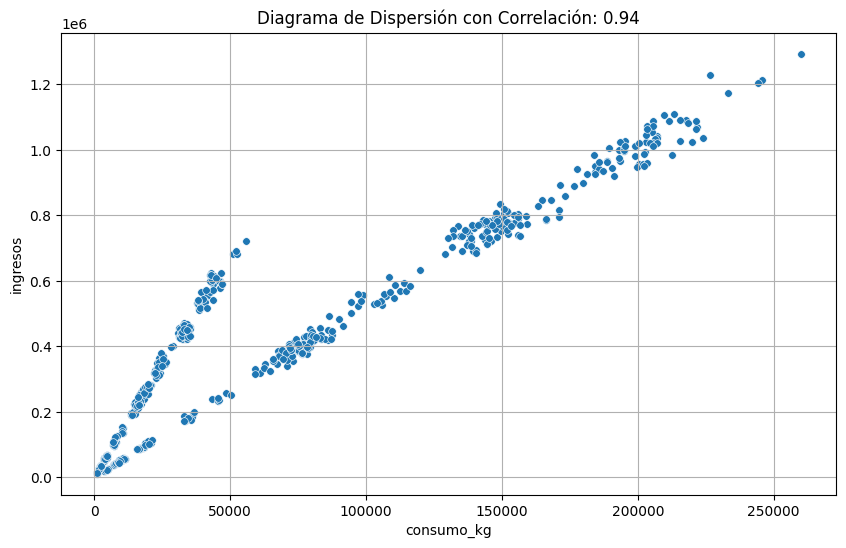

In [9]:
bootcampviztools.grafico_dispersion_con_correlacion(df_viajes_junio,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

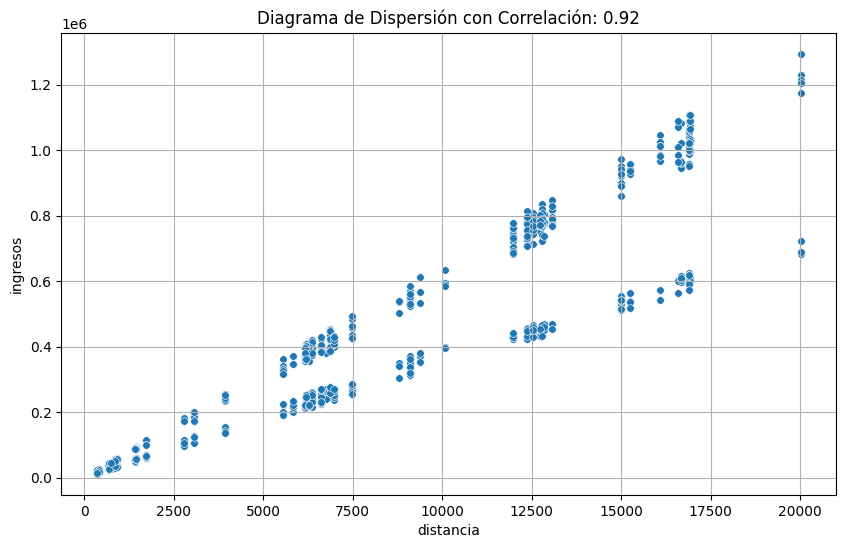

In [10]:
bootcampviztools.grafico_dispersion_con_correlacion(df_viajes_junio,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

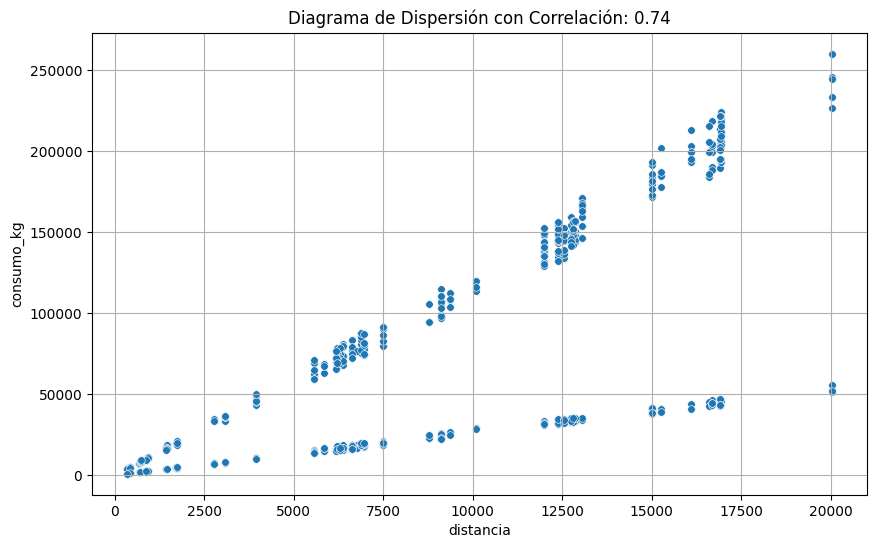

In [11]:
bootcampviztools.grafico_dispersion_con_correlacion(df_viajes_junio,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

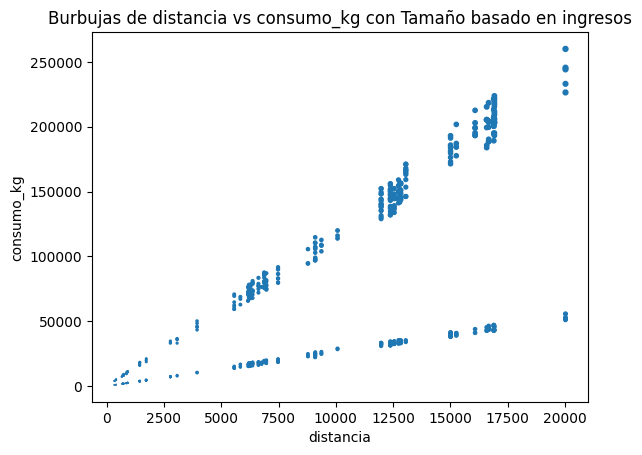

In [12]:
#el siguiente paso es mostrar las tres variables juntas con un  digrama donde mostraremos distacia contra consumo y con bolitas de tamaño variable los ingresos
bootcampviztools.bubble_plot(df_viajes_junio,"distancia","consumo_kg","ingresos", scale = 100000)

#Hay una correlacion entre correlación entre distancia y consumo, auque claramene hay una línea de vuelos mucho más eficientes y si nos fijamos en los tamaños de las burbujas de una línea y otra son aparentemente similares, por lo que obsevbamos que hay una serie de vuelos que a igual distancia son claramente mas eficientes.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [13]:
df_viajes_junio.describe().T.iloc[0]

count      600.000000
mean      8392.416667
std       5584.277845
min        344.000000
25%       3073.000000
50%       6969.000000
75%      12738.000000
max      20029.000000
Name: distancia, dtype: float64

In [25]:
def cat_dist(df):
    if df <= df_viajes_junio.describe().T.iloc[0][4]:
        return "CD"
    elif df > df_viajes_junio.describe().T.iloc[0][4] and df <= df_viajes_junio.describe().T.iloc[0][6]:
       return "MD"
    else:
        return "LD"

In [26]:
df_viajes_junio["cat_vuelo"] = df_viajes_junio["distancia"].transform(cat_dist)

/var/folders/cz/cnnldf8n7_9_gklt41tgbm380000gn/T/ipykernel_1846/3880414402.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df <= df_viajes_junio.describe().T.iloc[0][4]:
/var/folders/cz/cnnldf8n7_9_gklt41tgbm380000gn/T/ipykernel_1846/3880414402.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df > df_viajes_junio.describe().T.iloc[0][4] and df <= df_viajes_junio.describe().T.iloc[0][6]:
/var/folders/cz/cnnldf8n7_9_gklt41tgbm380000gn/T/ipykernel_1846/3880414402.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

In [16]:
df_viajes_junio

aircompany       origen      destino  distancia        avion  con_escala  \
0     PamPangea   Nueva York      Londres       5566  Airbus A320        True   
1      TabarAir   Cincinnati  Los Angeles       3073  Airbus A380       False   
2          FlyQ    Barcelona         Roma        859   Boeing 747       False   
3     PamPangea      Ginebra         Bali      12383   Boeing 747       False   
4    MoldaviAir        Cádiz         Bali      12798  Airbus A380       False   
..          ...          ...          ...        ...          ...         ...   
595    TabarAir  Los Angeles      Londres       8785  Airbus A320        True   
596  MoldaviAir   Cincinnati      Londres       6284   Boeing 737       False   
597        FlyQ         Roma   Cincinnati       7480  Airbus A320        True   
598    TabarAir         Roma      Londres       1433   Boeing 747       False   
599      Airnar        París  Los Angeles       9099   Boeing 737       False   

       consumo_kg  duracion   ingresos        id_vuelo    mes cat_vuelo  
0     15255.96072       523  220563.17  Pam_NuLo_11320  Jul23        MD  
1     36234.35760       224  192311.81  Tab_CiLo_11380  Jul23        CD  
2      9248.50940        77   52866.89  Fly_BaRo_10747  Jul23        CD  
3    138602.91900       845  723138.29  Pam_GiBa_10747  Jul23        MD  
4    150903.77760       873  807447.93  Mol_CaBa_11380  Jul23        LD  
..            ...       ...        ...             ...    ...       ...  
595   24766.95312       756  340889.30  Tab_LoLo_11320  Jul23        MD  
596   16491.72960       497  222424.54  Mol_CiLo_10737  Jul23        MD  
597   19721.04992       662  285377.03  Fly_RoCi_11320  Jul23        MD  
598   15734.05340       115   86373.94  Tab_RoLo_10747  Jul23        CD  
599   22331.67570       711  317996.77  Air_PaLo_10737  Jul23        MD  

[600 rows x 12 columns]

In [17]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_viajes_junio[col_directora].unique():
    diccionario_multivariante[valor] = df_viajes_junio.loc[df_viajes_junio[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta MD:


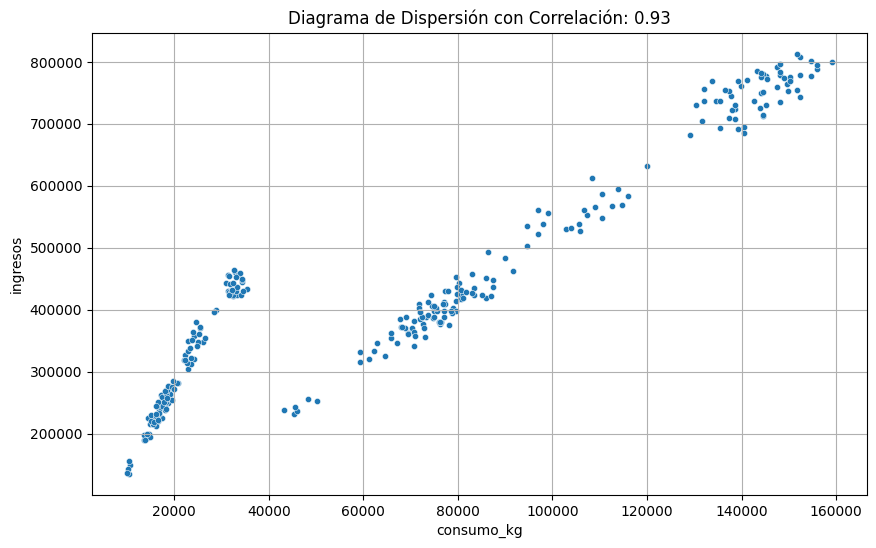

Respuesta CD:


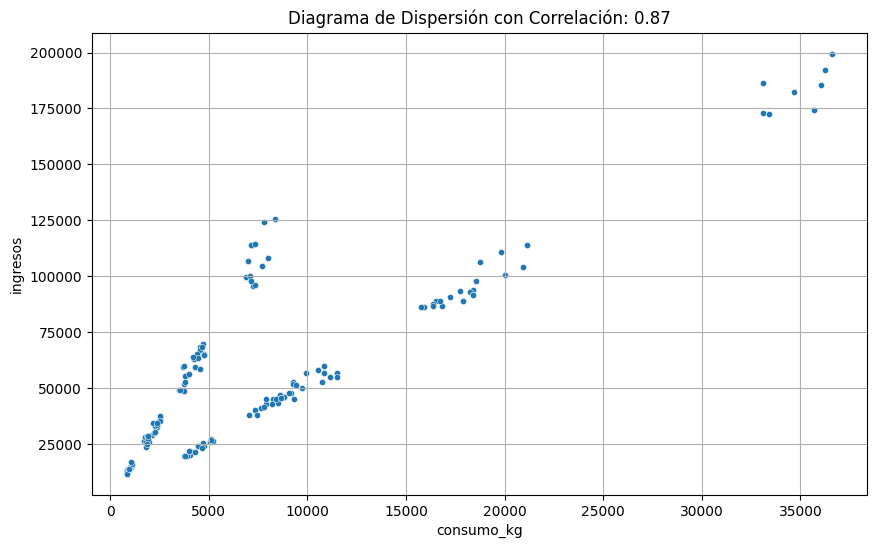

Respuesta LD:


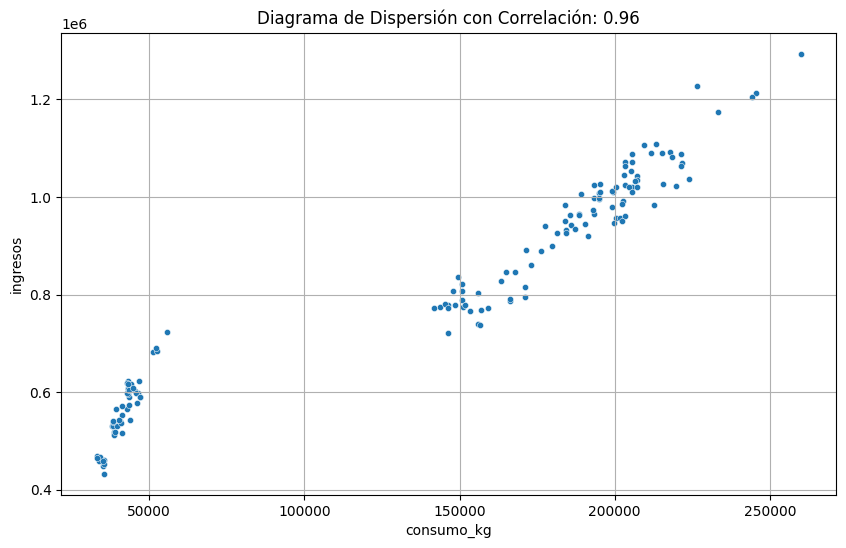

In [18]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bootcampviztools.grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

En todas las graficas CD, MD, LD, siempre hay dos tramos de datos lineales entre el consumo y los ingreos.
Pero desde leugo las mejores rutas son las de tramos cortos (CD) y medios (MD) ya que hay una de las dos regresiones lineales que dan muchos ingresos para un consumo relativamente bajo

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [27]:
#me creo mis variables
df_viajes_junio["ingreso__consumo_kg"] =  df_viajes_junio["distancia"]/df_viajes_junio["consumo_kg"]
df_viajes_junio["consumo_kg__distancia"] =  df_viajes_junio["consumo_kg"]/df_viajes_junio["distancia"]


In [29]:
df_viajes_junio

aircompany       origen      destino  distancia        avion  con_escala  \
0     PamPangea   Nueva York      Londres       5566  Airbus A320        True   
1      TabarAir   Cincinnati  Los Angeles       3073  Airbus A380       False   
2          FlyQ    Barcelona         Roma        859   Boeing 747       False   
3     PamPangea      Ginebra         Bali      12383   Boeing 747       False   
4    MoldaviAir        Cádiz         Bali      12798  Airbus A380       False   
..          ...          ...          ...        ...          ...         ...   
595    TabarAir  Los Angeles      Londres       8785  Airbus A320        True   
596  MoldaviAir   Cincinnati      Londres       6284   Boeing 737       False   
597        FlyQ         Roma   Cincinnati       7480  Airbus A320        True   
598    TabarAir         Roma      Londres       1433   Boeing 747       False   
599      Airnar        París  Los Angeles       9099   Boeing 737       False   

       consumo_kg  duracion   ingresos        id_vuelo    mes cat_vuelo  \
0     15255.96072       523  220563.17  Pam_NuLo_11320  Jul23        MD   
1     36234.35760       224  192311.81  Tab_CiLo_11380  Jul23        CD   
2      9248.50940        77   52866.89  Fly_BaRo_10747  Jul23        CD   
3    138602.91900       845  723138.29  Pam_GiBa_10747  Jul23        MD   
4    150903.77760       873  807447.93  Mol_CaBa_11380  Jul23        LD   
..            ...       ...        ...             ...    ...       ...   
595   24766.95312       756  340889.30  Tab_LoLo_11320  Jul23        MD   
596   16491.72960       497  222424.54  Mol_CiLo_10737  Jul23        MD   
597   19721.04992       662  285377.03  Fly_RoCi_11320  Jul23        MD   
598   15734.05340       115   86373.94  Tab_RoLo_10747  Jul23        CD   
599   22331.67570       711  317996.77  Air_PaLo_10737  Jul23        MD   

     ingreso/consumo_kg  consumo_kg/distancia  
0              0.364841              2.740920  
1              0.084809             11.791200  
2              0.092880             10.766600  
3              0.089342             11.193000  
4              0.084809             11.791200  
..                  ...                   ...  
595            0.354707              2.819232  
596            0.381039              2.624400  
597            0.379290              2.636504  
598            0.091076             10.979800  
599            0.407448              2.454300  

[600 rows x 14 columns]

(2, 2)


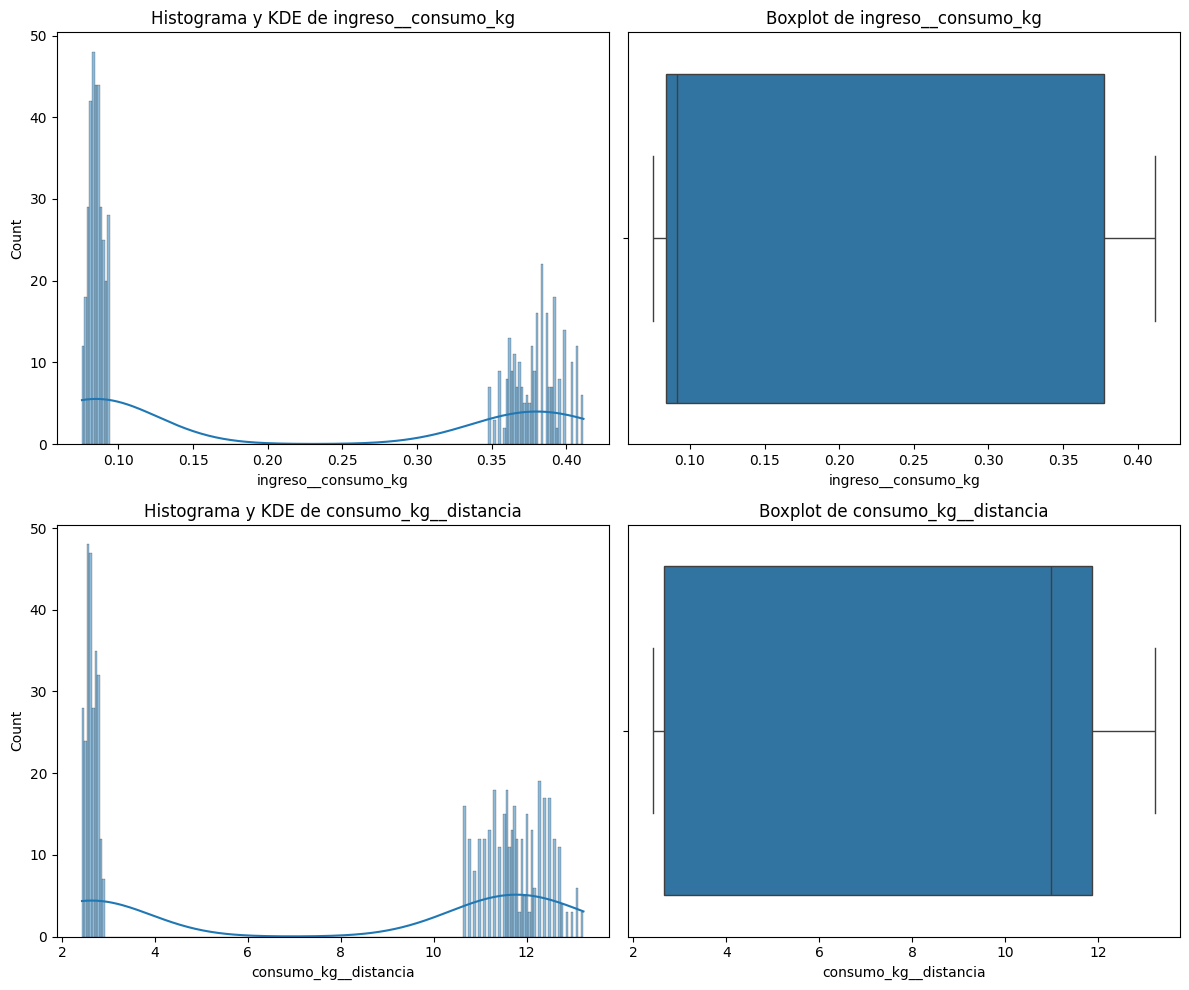

In [28]:
#ostrar los valores y diagramas de cada uno así como las correlaciones dos a dos:
bootcampviztools.plot_combined_graphs(df_viajes_junio,["ingreso__consumo_kg","consumo_kg__distancia"], bins = 200)

In [ ]:
#seran supereficientes aquellos cuyo ratio ingreso/consumo sea mayor y a su vez el consumo/distancia menor por lo que una vez analizadas las graficas los supereficients seran aquellos cuo ratio ["ingreso/consumo_kg"]>0.30 y ["consumo_kg/distancia"] <4  

In [29]:
df_viajes_junio.loc[(df_viajes_junio["ingreso__consumo_kg"]>0.30)&(df_viajes_junio["consumo_kg__distancia"] <4)]

aircompany       origen      destino  distancia        avion  con_escala  \
0     PamPangea   Nueva York      Londres       5566  Airbus A320        True   
5        Airnar  Los Angeles      Ginebra       9103  Airbus A320        True   
8    MoldaviAir      Londres        Cádiz       1716   Boeing 737       False   
10    PamPangea    Melbourne        París      16925   Boeing 737        True   
12   MoldaviAir   Cincinnati        Cádiz       6624  Airbus A320        True   
..          ...          ...          ...        ...          ...         ...   
593      Airnar      Ginebra        Cádiz       1725  Airbus A320       False   
595    TabarAir  Los Angeles      Londres       8785  Airbus A320        True   
596  MoldaviAir   Cincinnati      Londres       6284   Boeing 737       False   
597        FlyQ         Roma   Cincinnati       7480  Airbus A320        True   
599      Airnar        París  Los Angeles       9099   Boeing 737       False   

      consumo_kg  duracion   ingresos        id_vuelo    mes cat_vuelo  \
0    15255.96072       523  220563.17  Pam_NuLo_11320  Jul23        MD   
5    26138.71832       779  347686.57  Air_LoGi_11320  Jul23        MD   
8     4253.27760       150   62944.41  Mol_LoCa_10737  Jul23        CD   
10   43200.58860      1485  608843.11  Pam_MePa_10737  Jul23        LD   
12   17291.28960       600  249711.63  Mol_CiCa_11320  Jul23        MD   
..           ...       ...        ...             ...    ...       ...   
593   4762.72500       145   64711.93  Air_GiCa_11320  Jul23        CD   
595  24766.95312       756  340889.30  Tab_LoLo_11320  Jul23        MD   
596  16491.72960       497  222424.54  Mol_CiLo_10737  Jul23        MD   
597  19721.04992       662  285377.03  Fly_RoCi_11320  Jul23        MD   
599  22331.67570       711  317996.77  Air_PaLo_10737  Jul23        MD   

     ingreso__consumo_kg  consumo_kg__distancia  
0               0.364841               2.740920  
5               0.348257               2.871440  
8               0.403454               2.478600  
10              0.391777               2.552472  
12              0.383083               2.610400  
..                   ...                    ...  
593             0.362188               2.761000  
595             0.354707               2.819232  
596             0.381039               2.624400  
597             0.379290               2.636504  
599             0.407448               2.454300  

[261 rows x 14 columns]

In [42]:
def eficiencia(row):
    if (row["ingreso__consumo_kg"] > 0.30 and row["consumo_kg__distancia"] < 4):
        return True
    else:
        return False

In [ ]:
df_viajes_junio["eficiencia"] =df_viajes_junio[["ingreso__consumo_kg","consumo_kg__distancia"]].apply(eficiencia, axis=1)

In [43]:
df_viajes_junio

aircompany       origen      destino  distancia        avion  con_escala  \
0     PamPangea   Nueva York      Londres       5566  Airbus A320        True   
1      TabarAir   Cincinnati  Los Angeles       3073  Airbus A380       False   
2          FlyQ    Barcelona         Roma        859   Boeing 747       False   
3     PamPangea      Ginebra         Bali      12383   Boeing 747       False   
4    MoldaviAir        Cádiz         Bali      12798  Airbus A380       False   
..          ...          ...          ...        ...          ...         ...   
595    TabarAir  Los Angeles      Londres       8785  Airbus A320        True   
596  MoldaviAir   Cincinnati      Londres       6284   Boeing 737       False   
597        FlyQ         Roma   Cincinnati       7480  Airbus A320        True   
598    TabarAir         Roma      Londres       1433   Boeing 747       False   
599      Airnar        París  Los Angeles       9099   Boeing 737       False   

       consumo_kg  duracion   ingresos        id_vuelo    mes cat_vuelo  \
0     15255.96072       523  220563.17  Pam_NuLo_11320  Jul23        MD   
1     36234.35760       224  192311.81  Tab_CiLo_11380  Jul23        CD   
2      9248.50940        77   52866.89  Fly_BaRo_10747  Jul23        CD   
3    138602.91900       845  723138.29  Pam_GiBa_10747  Jul23        MD   
4    150903.77760       873  807447.93  Mol_CaBa_11380  Jul23        LD   
..            ...       ...        ...             ...    ...       ...   
595   24766.95312       756  340889.30  Tab_LoLo_11320  Jul23        MD   
596   16491.72960       497  222424.54  Mol_CiLo_10737  Jul23        MD   
597   19721.04992       662  285377.03  Fly_RoCi_11320  Jul23        MD   
598   15734.05340       115   86373.94  Tab_RoLo_10747  Jul23        CD   
599   22331.67570       711  317996.77  Air_PaLo_10737  Jul23        MD   

     ingreso__consumo_kg  consumo_kg__distancia  eficiencia  
0               0.364841               2.740920        True  
1               0.084809              11.791200       False  
2               0.092880              10.766600       False  
3               0.089342              11.193000       False  
4               0.084809              11.791200       False  
..                   ...                    ...         ...  
595             0.354707               2.819232        True  
596             0.381039               2.624400        True  
597             0.379290               2.636504        True  
598             0.091076              10.979800       False  
599             0.407448               2.454300        True  

[600 rows x 15 columns]

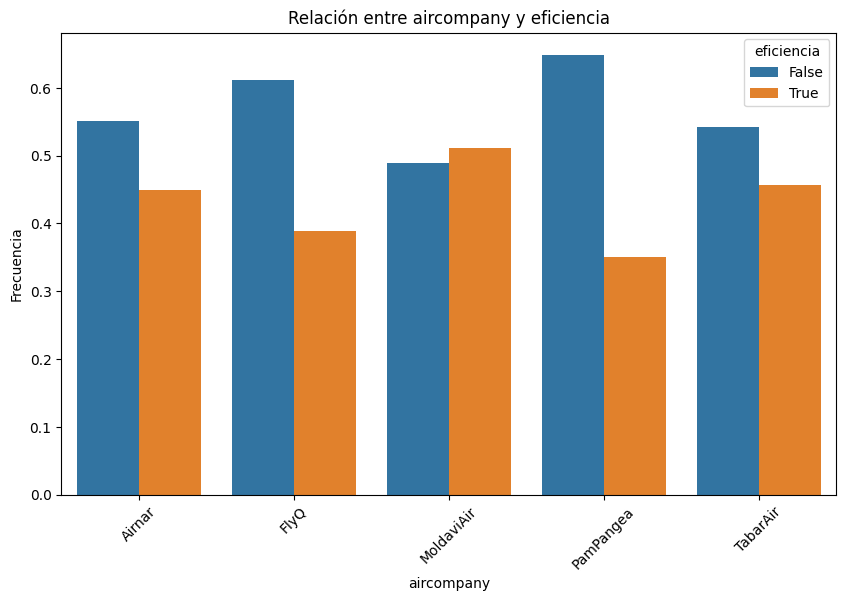

In [45]:
bootcampviztools.plot_categorical_relationship_fin(df_viajes_junio, "aircompany","eficiencia", relative_freq=True)

In [ ]:
# No me ha dado tiempo ahcer mas

PARTE I  
1. **Establecer objetivos**  
1. **Completar la definición de los datos/Rellenar fichas datasets**
2. **Tipificar los datos**
3. **Priorizar variables** 

PARTE II  
4. **Aplicar tendencia central a todas las variables**  
5. **Analizar las frecuencias de las variables categóricas**: Gráficos de barras   
6. **Analizar las medidas de posición y los rangos de las variables numéricas**: Graficos de Caja  
7. **Analizar las medidas de dispersión de las variables numéricas**  
8. **Analizar las distribuciones de las variables numéricas**: Histogramas y funciones estimadas de densidad (combinados)  
9. **Analizar las anomalías o outliers**: confrontación de histogramas y gráficos de cajas. Umbrales (2-3 desviaciones estándar, 4.5 en tamaño "bigotes")  
10. **Trata los outliers**: separa en dos, elimina, crea una categoría especial...   

PARTE III  
11. **Revisa prioridades, preguntas y notas hasta el momento**  
12. **Preparara el analisis bivariante** en función de la revisión anterior.  
13. **Empieza por categóricas importantes/target**: combinalas con categóricas y numéricas  
14. **Sigue con numéricas importantes/target**  
15. **Analiza las parejas de variables que necesites para contestar tus preguntas**  
    15.1 **Es directo así que: Matriz de correlación, heatmap y pairplot**  
16. **Recapitula**: Clasifica ya tus hallazgos en posibles mensajes, elementos a profundizar, cosas interesantes pero no importantes (descártalas). Añade las preguntas contestadas y la lista de preguntas sin contestar.  

PARTE IV  
17. **Intenta resolver todas las preguntas pendientes**  
18. Si necesitas análisis más complicados (3 o más variables): Planifica muy bien que grupos  
19. Aplica lo visto en estas sesiones, tendrás que probar variaciones hasta llegar a encontrar el punto adecuado.  
20. **Acaba el análisis**: Cierras las preguntas pendientes, lo que te quede por trabajar -> Lineas de trabajo futuro.  
